In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer


In [5]:
# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

In [6]:
ads_info = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정2_광고참여정보.csv')
print(f"데이터 수 : {ads_info.shape}")
ads_info.head()

데이터 수 : (16854865, 14)


click_key  ads_idx   dvc_idx  mda_idx  \
0  000000d54b9faad47ee99d6cd3cf53894dd4baa5   313780  61906528      539   
1  000002b4d92f7648b455877c2676452efcd22a09   412426  34422806       58   
2  0000057e97361ff3d0263aaecee34cfaa3ba30fb   443660  38366075      808   
3  00000607f60139015da3ee1dd5499db3faa100dc   360192  61894110      539   
4  0000066bc25d4a6d147c27326cf972a4de88024e   372307  61956954      539   

   pub_sub_rel_id  contract_price  media_price   click_day  click_time  \
0       144350110            6000         4500  2025-08-17          21   
1        46032732             180          170  2025-07-26           2   
2               1             170          120  2025-08-12          18   
3       144350110            6000         4500  2025-08-17           3   
4       144350110           15600        11700  2025-08-18           8   

            click_date     exp_day network          user_ip  converted  
0  2025-08-17 21:07:37  2025-09-16       0    16.184.28.219          0  
1  2025-07-26 02:18:24  2025-08-25     NaN     35.78.117.76          1  
2  2025-08-12 18:17:59  2025-09-11    WIFI      39.7.55.192          1  
3  2025-08-17 03:35:02  2025-09-16       0  211.252.100.157          0  
4  2025-08-18 08:01:26  2025-09-17       0     3.38.148.211          0

In [7]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/참여적립조인.csv')
domain.head()

Unnamed: 0                                 click_key  ads_idx   dvc_idx  \
0           0  000000d54b9faad47ee99d6cd3cf53894dd4baa5   313780  61906528   
1           1  000002b4d92f7648b455877c2676452efcd22a09   412426  34422806   
2           2  0000057e97361ff3d0263aaecee34cfaa3ba30fb   443660  38366075   
3           3  00000607f60139015da3ee1dd5499db3faa100dc   360192  61894110   
4           4  0000066bc25d4a6d147c27326cf972a4de88024e   372307  61956954   

   mda_idx  pub_sub_rel_id  contract_price  media_price   click_day  \
0      539       144350110            6000         4500  2025-08-17   
1       58        46032732             180          170  2025-07-26   
2      808               1             170          120  2025-08-12   
3      539       144350110            6000         4500  2025-08-17   
4      539       144350110           15600        11700  2025-08-18   

   click_time  ... network          user_ip      rwd_idx    ads_code  \
0          21  ...       0    16.184.28.219          NaN         NaN   
1           2  ...     NaN     35.78.117.76  238313226.0  yuRe4YoPuZ   
2          18  ...    WIFI      39.7.55.192  239017177.0  WuIp8HKmt9   
3           3  ...       0  211.252.100.157          NaN         NaN   
4           8  ...       0     3.38.148.211          NaN         NaN   

                                  advid adv_cost earn_cost  \
0                                   NaN      NaN       NaN   
1  40ceb01c-9b60-4452-bacd-0e061fb18ab4    180.0     170.0   
2  73793f44-a471-4351-ae1c-d09accaf223a    170.0     120.0   
3                                   NaN      NaN       NaN   
4                                   NaN      NaN       NaN   

               regdate  ctit conversion  
0                  NaN   NaN          0  
1  2025-07-26 02:19:21  57.0          1  
2  2025-08-12 18:19:21  82.0          1  
3                  NaN   NaN          0  
4                  NaN   NaN          0  

[5 rows x 22 columns]

In [8]:
ads_time = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_time.shape}")
ads_time.head()

데이터 수 : (6953146, 12)


rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2024-07-27              0     4418      761             1              0   
1    2024-07-27              0     7377      213             1              0   
2    2024-07-27              0     7377      337             1              0   
3    2024-07-27              0     7377      496             1              1   
4    2024-07-27              0     7528      792             1              0   

   rpt_time_scost  rpt_time_acost  rpt_time_cost  rpt_time_earn  weekday  \
0               0               0              0              0        5   
1               0               0              0              0        5   
2               0               0              0              0        5   
3             230             230            180            180        5   
4               0               0              0              0        5   

  week_type  
0        주말  
1        주말  
2        주말  
3        주말  
4        주말

In [9]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/광고도메인리스트.csv')
domain.head()

Unnamed: 0  ads_idx    ads_code  aff_idx  adv_idx  ads_type  ads_category  \
0           0     6508  3u4lOKJAek       13      335         3            10   
1           1     6985  SijDrtH4GV       13      335         3             7   
2           2     8327  k1RZftVHoW       13      335         3            10   
3           3     9264  EGZcaVOtlc       23      220         3            10   
4           4     9716  NwZZq45Kgb        6       10         3             8   

          ads_name                                       ads_icon_img  \
0          스마트피싱보호      https://seimg.pincrux.com/icon/1551770735.png   
1      DB손해보험 다이렉트      https://seimg.pincrux.com/icon/1575337232.jpg   
2              파일썬  https://static.i-screen.kr/img/ad/icon/aff_13_...   
3  하나 가득담은 운전자보험가입                    https://i.imgur.com/kaWiYyT.png   
4      베이비러브 참여 신청  https://nextapps-nas.aws.appang.kr/icon/SDl2uC...   

                                         ads_summary  ...  \
0  [상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...  ...   
1  [참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...  ...   
2  [참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...  ...   
3  하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...  ...   
4  [참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...  ...   

             ads_edate  ads_age_min ads_age_max ads_os_type  \
0  9999-12-31 00:00:00            0         100           7   
1  9999-06-06 00:00:00            0         100           7   
2  9999-12-31 23:59:00            0         100           7   
3  9999-12-31 23:59:59            0         100           7   
4  2029-11-29 00:00:00           25          55           2   

   ads_contract_price  ads_reward_price  ads_order  ads_rejoin_type  \
0                1400              1100    2381500             NONE   
1                2700              2300    1201938             NONE   
2                3200              2420    1673458             NONE   
3               11000              8250    2372800             NONE   
4                 600               480    2699900             NONE   

                   regdate   domain  
0  2020-04-23 17:53:01 UTC       금융  
1  2020-06-30 15:22:59 UTC       금융  
2  2020-11-10 11:21:43 UTC  미디어/컨텐츠  
3  2020-11-30 15:16:45 UTC       금융  
4  2021-01-11 16:11:27 UTC       생활  

[5 rows x 23 columns]

In [10]:
domain.isna().sum()

Unnamed: 0            0
ads_idx               0
ads_code              0
aff_idx               0
adv_idx               0
ads_type              0
ads_category          0
ads_name              0
ads_icon_img          0
ads_summary           0
ads_save_way          0
ads_day_cap           0
ads_sdate             0
ads_edate             0
ads_age_min           0
ads_age_max           0
ads_os_type           0
ads_contract_price    0
ads_reward_price      0
ads_order             0
ads_rejoin_type       0
regdate               0
domain                0
dtype: int64

In [11]:
part_earn = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/참여적립조인.csv')
print(f"데이터 수 : {part_earn.shape}")
part_earn.head()

데이터 수 : (16854865, 22)


Unnamed: 0                                 click_key  ads_idx   dvc_idx  \
0           0  000000d54b9faad47ee99d6cd3cf53894dd4baa5   313780  61906528   
1           1  000002b4d92f7648b455877c2676452efcd22a09   412426  34422806   
2           2  0000057e97361ff3d0263aaecee34cfaa3ba30fb   443660  38366075   
3           3  00000607f60139015da3ee1dd5499db3faa100dc   360192  61894110   
4           4  0000066bc25d4a6d147c27326cf972a4de88024e   372307  61956954   

   mda_idx  pub_sub_rel_id  contract_price  media_price   click_day  \
0      539       144350110            6000         4500  2025-08-17   
1       58        46032732             180          170  2025-07-26   
2      808               1             170          120  2025-08-12   
3      539       144350110            6000         4500  2025-08-17   
4      539       144350110           15600        11700  2025-08-18   

   click_time  ... network          user_ip      rwd_idx    ads_code  \
0          21  ...       0    16.184.28.219          NaN         NaN   
1           2  ...     NaN     35.78.117.76  238313226.0  yuRe4YoPuZ   
2          18  ...    WIFI      39.7.55.192  239017177.0  WuIp8HKmt9   
3           3  ...       0  211.252.100.157          NaN         NaN   
4           8  ...       0     3.38.148.211          NaN         NaN   

                                  advid adv_cost earn_cost  \
0                                   NaN      NaN       NaN   
1  40ceb01c-9b60-4452-bacd-0e061fb18ab4    180.0     170.0   
2  73793f44-a471-4351-ae1c-d09accaf223a    170.0     120.0   
3                                   NaN      NaN       NaN   
4                                   NaN      NaN       NaN   

               regdate  ctit conversion  
0                  NaN   NaN          0  
1  2025-07-26 02:19:21  57.0          1  
2  2025-08-12 18:19:21  82.0          1  
3                  NaN   NaN          0  
4                  NaN   NaN          0  

[5 rows x 22 columns]

In [12]:
ads_timee = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_시간별적립보고서(최종).csv')
print(f"데이터 수 : {ads_timee.shape}")
ads_timee.head()

데이터 수 : (279916, 10)


rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2025-07-27              0    11059      398             5              0   
1    2025-07-27              0    13209      583             3              0   
2    2025-07-27              0    13928      303             3              3   
3    2025-07-27              0    13928      324             3              3   
4    2025-07-27              0    13928      340             6              6   

   rpt_time_acost  rpt_time_earn  weekday week_type  
0               0              0        6        주말  
1               0              0        6        주말  
2             510            360        6        주말  
3             510            360        6        주말  
4            1020            720        6        주말

In [100]:
ads_list = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정2_광고목록.csv')
print(f"데이터 수 : {ads_list.shape}")
ads_list.head()

데이터 수 : (445039, 21)


ads_idx    ads_code  aff_idx  adv_idx  ads_type  ads_category  \
0      160  tr71opm6C1        6       10         1             1   
1      284  xlNpfkgtLX        6       10         1             1   
2      292  7Hj8V5QKiy        6       10         1             1   
3      304  1RfxHJcuEe        6       10         2             1   
4      306  l3GyilYEVk        6       10         1             1   

               ads_name                                       ads_icon_img  \
0              리니지레드나이츠  https://lh3.googleusercontent.com/oDGXxngO9oOP...   
1  강철의함대:Ocean Overlord  http://nextapps-nas.aws.appang.kr/icon/2016122...   
2              스노우 SNOW  http://nextapps-nas.aws.appang.kr/icon/2016092...   
3       서머너즈 워: 천공의 아레나  http://nextapps-nas.aws.appang.kr/icon/EecpHzP...   
4                  하이마트  http://nextapps-nas.aws.appang.kr/icon/2016032...   

                                         ads_summary ads_save_way ads_day_cap  \
0  [앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...           받기           N   
1  [앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...           받기           N   
2  [앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...           받기           N   
3  [앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...        최초 오픈           N   
4                                새롭게 단장한 하이마트 쇼핑몰 앱!           받기           Y   

             ads_sdate            ads_edate  ads_age_min  ads_age_max  \
0  2016-12-01 00:00:00  9999-12-31 23:59:59            0          100   
1  2016-12-29 00:00:00  9999-12-31 23:59:59            0          100   
2  2016-12-29 00:00:00  9999-12-31 23:59:59            0          100   
3  2017-01-01 00:00:00  9999-12-31 23:59:59            0          100   
4  2017-01-01 00:00:00  2019-11-01 00:00:00            0          100   

   ads_os_type  ads_contract_price  ads_reward_price  ads_order  \
0            2                 170               150     982800   
1            2                 180               160     987200   
2            2                 160               160     987300   
3            2                 230               210     931000   
4            2                 170               140    1155100   

  ads_rejoin_type              regdate  
0            NONE  2017-04-06 13:19:53  
1            NONE  2017-01-10 10:37:22  
2            NONE  2017-01-02 12:51:34  
3            NONE  2017-03-30 17:05:23  
4            NONE  2017-06-12 15:24:46

In [13]:
ads_info = ads_info.merge(
    domain[['ads_idx', 'domain']],
    on='ads_idx',
    how='left'
)


In [14]:
ads_info.isna().sum()

click_key               0
ads_idx                 0
dvc_idx                 0
mda_idx                 0
pub_sub_rel_id          0
contract_price          0
media_price             0
click_day               0
click_time              0
click_date              0
exp_day                 0
network           2501362
user_ip                 9
converted               0
domain                  0
dtype: int64

In [15]:
ads_time.head()

rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2024-07-27              0     4418      761             1              0   
1    2024-07-27              0     7377      213             1              0   
2    2024-07-27              0     7377      337             1              0   
3    2024-07-27              0     7377      496             1              1   
4    2024-07-27              0     7528      792             1              0   

   rpt_time_scost  rpt_time_acost  rpt_time_cost  rpt_time_earn  weekday  \
0               0               0              0              0        5   
1               0               0              0              0        5   
2               0               0              0              0        5   
3             230             230            180            180        5   
4               0               0              0              0        5   

  week_type  
0        주말  
1        주말  
2        주말  
3        주말  
4        주말

In [16]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', 'ads_sdate', 
                         'ads_age_min', 'ads_age_max', 'regdate', 'ads_contract_price', 'ads_reward_price'], axis = 1)

In [17]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'dvc_idx', 'user_ip'], axis=1)

In [18]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')

In [19]:
machesa.drop(['ads_code_x'], axis = 1, inplace=True)

In [20]:
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)

In [21]:
machesa.head()

ads_idx  mda_idx  pub_sub_rel_id  contract_price  media_price  click_time  \
0   313780      539       144350110            6000         4500          21   
1   412426       58        46032732             180          170           2   
2   443660      808               1             170          120          18   
3   360192      539       144350110            6000         4500           3   
4   372307      539       144350110           15600        11700           8   

            click_date     exp_day network      rwd_idx  ... ads_type  \
0  2025-08-17 21:07:37  2025-09-16       0          NaN  ...        3   
1  2025-07-26 02:18:24  2025-08-25     NaN  238313226.0  ...        1   
2  2025-08-12 18:17:59  2025-09-11    WIFI  239017177.0  ...        1   
3  2025-08-17 03:35:02  2025-09-16       0          NaN  ...        3   
4  2025-08-18 08:01:26  2025-09-17       0          NaN  ...        3   

   ads_category                       ads_name ads_save_way  ads_day_cap  \
0             5                    The Farmers     레벨 50 완료        False   
1             2          용칼이 키우기 : 용가리알 무한 지급!           받기        False   
2             0              [간편참여] 편의점 정리왕 3D           받기        False   
3             5  Merge Islanders: Magic Puzzle     15일차 완료         False   
4             5  Happy Color® - 컬러링북, 숫자 색칠 게임   그림 250개 색칠        False   

             ads_edate ads_os_type  ads_order  ads_rejoin_type  domain  
0  2031-01-03 00:00:00           2    2447700             NONE      게임  
1  2025-07-28 00:00:00           2    2749100             NONE      게임  
2  9999-12-31 23:59:59           2    2758100             NONE      생활  
3  2031-01-03 00:00:00           2    2449700             NONE      게임  
4  2031-01-03 00:00:00           2    2456300             NONE      게임  

[5 rows x 29 columns]

In [22]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_게임         0
domain_교육         0
domain_금융         0
domain_기타         0
domain_미디어/컨텐츠    0
domain_뷰티         0
domain_비영리/공공     0
domain_생활         0
domain_식당/카페      0
domain_식음료        0
domain_운동/스포츠     0
domain_운세         0
domain_의료/건강      0
domain_채용         0
domain_커머스        0
dtype: int64

In [23]:
domain_features.head()

domain_게임  domain_교육  domain_금융  domain_기타  domain_미디어/컨텐츠  \
mda_idx                                                               
12          187866          0       3971          0              53   
14           38866          0       3560         57           15755   
18            3315          0        914          0            1070   
22           37240         16      11756          0           15966   
26             423          0         41          0              20   

         domain_뷰티  domain_비영리/공공  domain_생활  domain_식당/카페  domain_식음료  \
mda_idx                                                                  
12               0           7300       1479             0         643   
14            5941              0       6248             0        6437   
18               0              0        617             0           0   
22             530           4813       2867            29        1138   
26               0              0        115             0           0   

         domain_운동/스포츠  domain_운세  domain_의료/건강  domain_채용  domain_커머스  
mda_idx                                                                 
12                   0          0           131          0       30995  
14                   0          0          4810        888        2201  
18                   0          0             0          0          45  
22                 367         40          2462       3156        2975  
26                   0          0             0          0          79

In [24]:
# 비율로 정규화
norm_domain_features = domain_features.div(domain_features.sum(axis=1), axis=0)
norm_domain_features

domain_게임  domain_교육  domain_금융  domain_기타  domain_미디어/컨텐츠  \
mda_idx                                                               
12        0.808241   0.000000   0.017084   0.000000        0.000228   
14        0.458526   0.000000   0.041999   0.000672        0.185871   
18        0.556115   0.000000   0.153330   0.000000        0.179500   
22        0.446764   0.000192   0.141035   0.000000        0.191542   
26        0.623894   0.000000   0.060472   0.000000        0.029499   
...            ...        ...        ...        ...             ...   
1050      0.000000   0.000000   0.000000   0.000000        0.000000   
1051      1.000000   0.000000   0.000000   0.000000        0.000000   
1055      0.000000   0.000000   0.000000   0.000000        1.000000   
1059      1.000000   0.000000   0.000000   0.000000        0.000000   
1061      0.000000   0.000000   0.000000   0.000000        0.000000   

         domain_뷰티  domain_비영리/공공  domain_생활  domain_식당/카페  domain_식음료  \
mda_idx                                                                  
12        0.000000       0.031406   0.006363      0.000000    0.002766   
14        0.070090       0.000000   0.073711      0.000000    0.075941   
18        0.000000       0.000000   0.103506      0.000000    0.000000   
22        0.006358       0.057741   0.034395      0.000348    0.013652   
26        0.000000       0.000000   0.169617      0.000000    0.000000   
...            ...            ...        ...           ...         ...   
1050      0.000000       0.000000   0.000000      0.000000    0.000000   
1051      0.000000       0.000000   0.000000      0.000000    0.000000   
1055      0.000000       0.000000   0.000000      0.000000    0.000000   
1059      0.000000       0.000000   0.000000      0.000000    0.000000   
1061      0.111111       0.000000   0.000000      0.000000    0.000000   

         domain_운동/스포츠  domain_운세  domain_의료/건강  domain_채용  domain_커머스  
mda_idx                                                                 
12            0.000000   0.000000      0.000564   0.000000    0.133347  
14            0.000000   0.000000      0.056746   0.010476    0.025967  
18            0.000000   0.000000      0.000000   0.000000    0.007549  
22            0.004403   0.000480      0.029536   0.037862    0.035691  
26            0.000000   0.000000      0.000000   0.000000    0.116519  
...                ...        ...           ...        ...         ...  
1050          0.000000   1.000000      0.000000   0.000000    0.000000  
1051          0.000000   0.000000      0.000000   0.000000    0.000000  
1055          0.000000   0.000000      0.000000   0.000000    0.000000  
1059          0.000000   0.000000      0.000000   0.000000    0.000000  
1061          0.000000   0.222222      0.000000   0.000000    0.666667  

[189 rows x 15 columns]

# 다시다시 !!

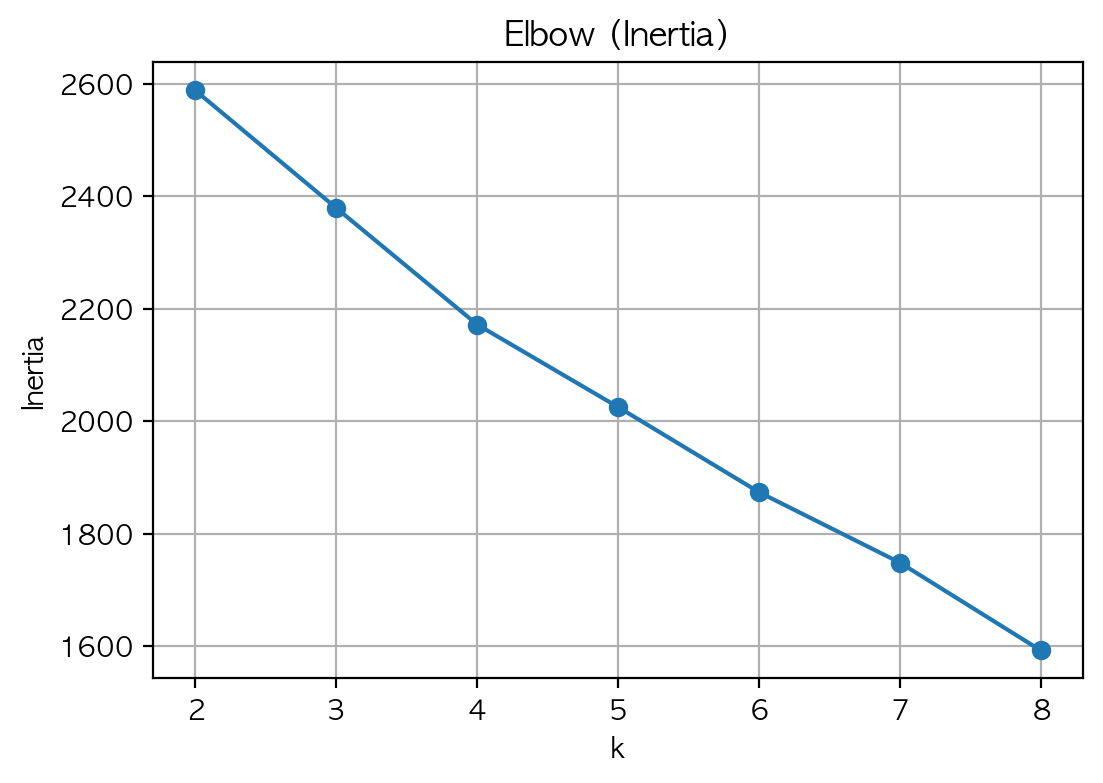

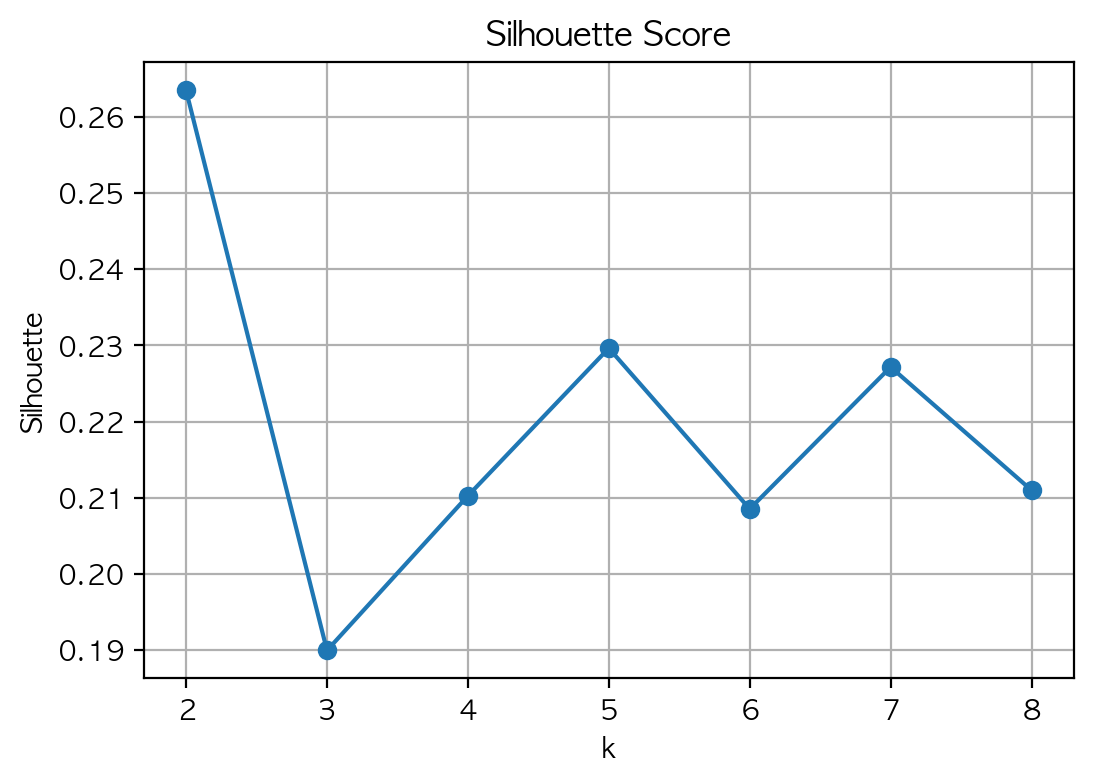

[INFO] 선택된 k = 2


domain_게임  domain_교육  domain_금융  domain_기타  domain_미디어/컨텐츠  \
cluster                                                               
0         0.355082   0.008154   0.052659   0.020280        0.050731   
1         0.196989   0.000074   0.382529   0.000465        0.139530   

         domain_뷰티  domain_비영리/공공  domain_생활  domain_식당/카페  domain_식음료  \
cluster                                                                  
0         0.026844       0.030234   0.060569      0.045059    0.037800   
1         0.023124       0.005997   0.063444      0.020234    0.002717   

         domain_운동/스포츠  domain_운세  domain_의료/건강  domain_채용  domain_커머스  
cluster                                                                 
0             0.011555   0.052461      0.043568   0.027541    0.177462  
1             0.000243   0.005523      0.003676   0.106192    0.049261

top_domains
cluster                                                   
0        게임(35.51%), 커머스(17.75%), 생활(6.06%), 금융(5.27%),...
1        금융(38.25%), 게임(19.70%), 미디어/컨텐츠(13.95%), 채용(10...

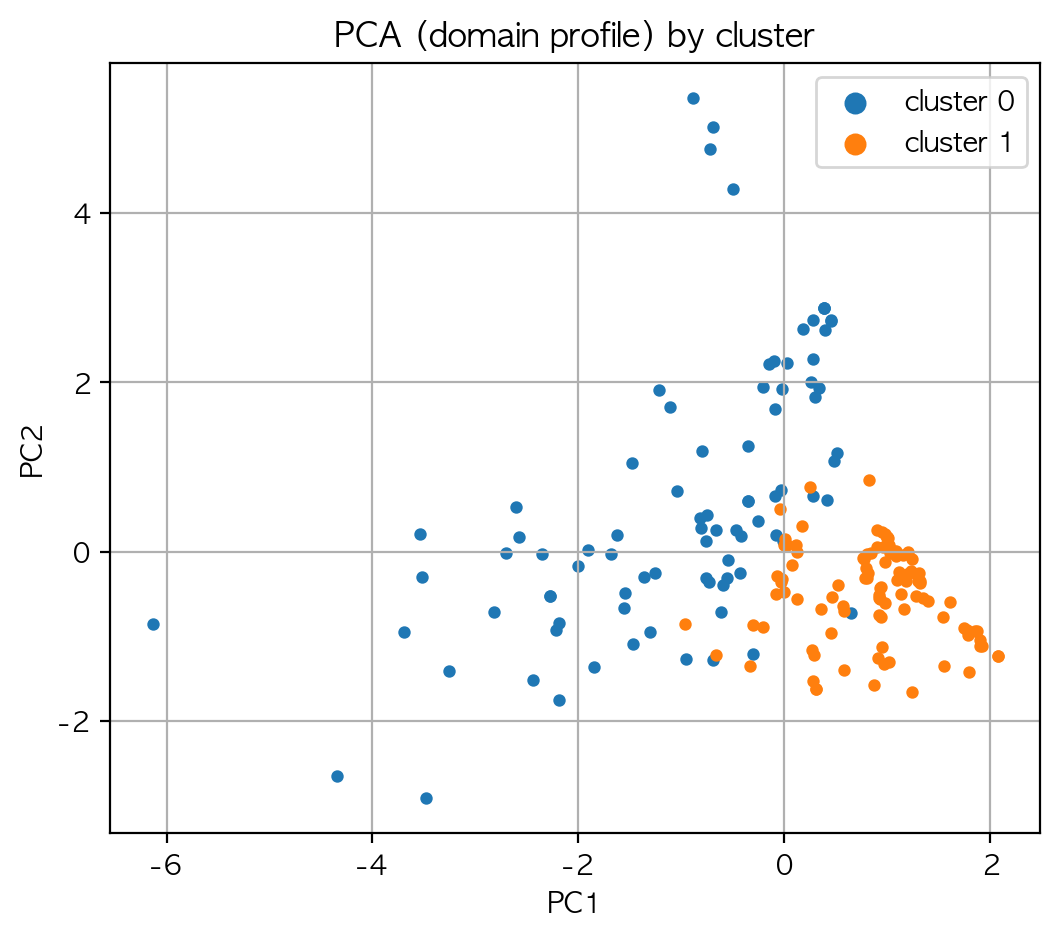

[DONE] mda_idx 클러스터링 완료


In [45]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]
df = domain_features.copy()

# 결측치/무한대 정리
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
row_sum = df.sum(axis=1)
row_sum[row_sum == 0] = 1  # 0 division 방지
df_ratio = df.div(row_sum, axis=0)

# (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
var = df_ratio.var(axis=0)
keep_cols = var[var > 0].index
X = df_ratio[keep_cols].values

# 1) 스케일링
scaler = StandardScaler()  # 혹은 MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# 클러스터별 도메인 분포(평균)
cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx 클러스터링 완료")


========== k=3 결과 ==========


top_domains
cluster                                                   
0        게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ...
1        커머스(25.90%), 게임(11.93%), 운세(8.44%), 생활(7.45%),...
2        금융(38.06%), 게임(20.48%), 미디어/컨텐츠(13.58%), 채용(10...

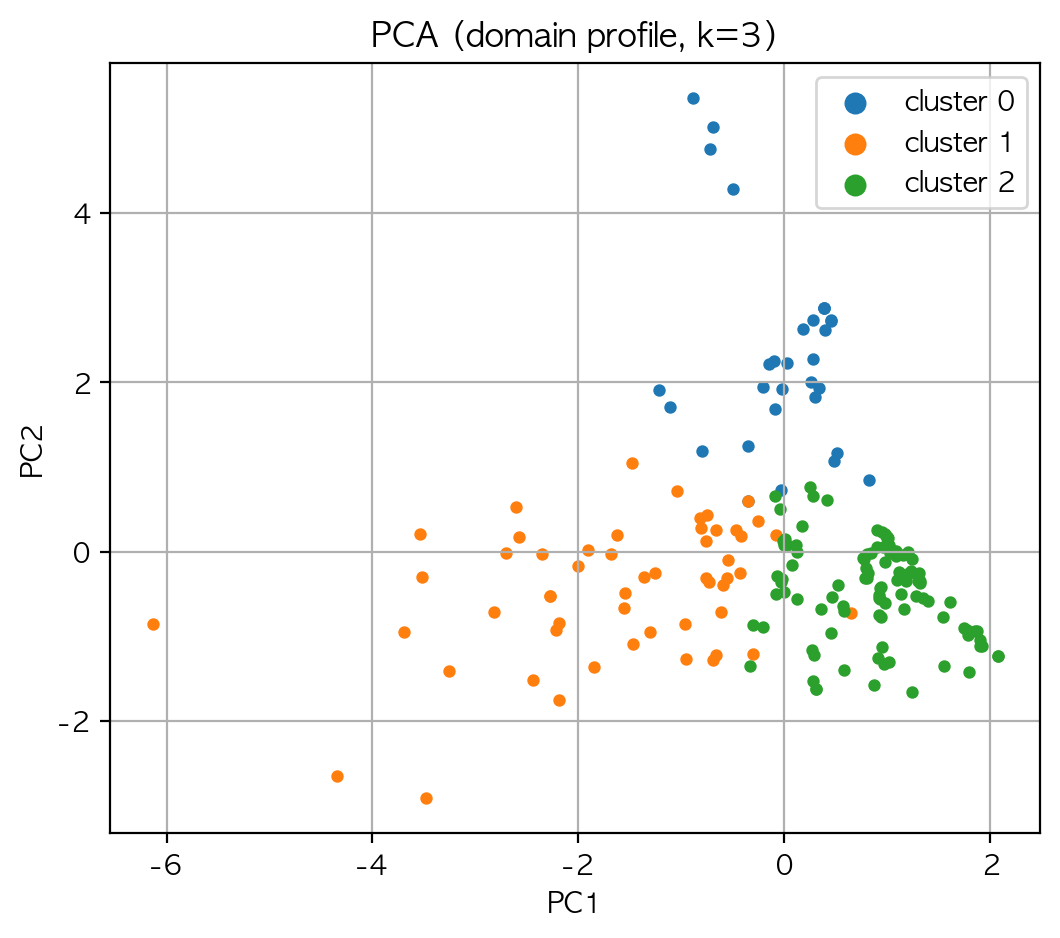

========== k=4 결과 ==========


top_domains
cluster                                                   
0        게임(67.09%), 비영리/공공(5.03%), 식음료(5.02%), 커머스(4.3...
1        커머스(28.71%), 게임(11.88%), 생활(8.19%), 식당/카페(7.57...
2        운동/스포츠(50.00%), 운세(50.00%), 게임(0.00%), 교육(0.00...
3        금융(37.92%), 게임(20.24%), 미디어/컨텐츠(13.53%), 채용(10...

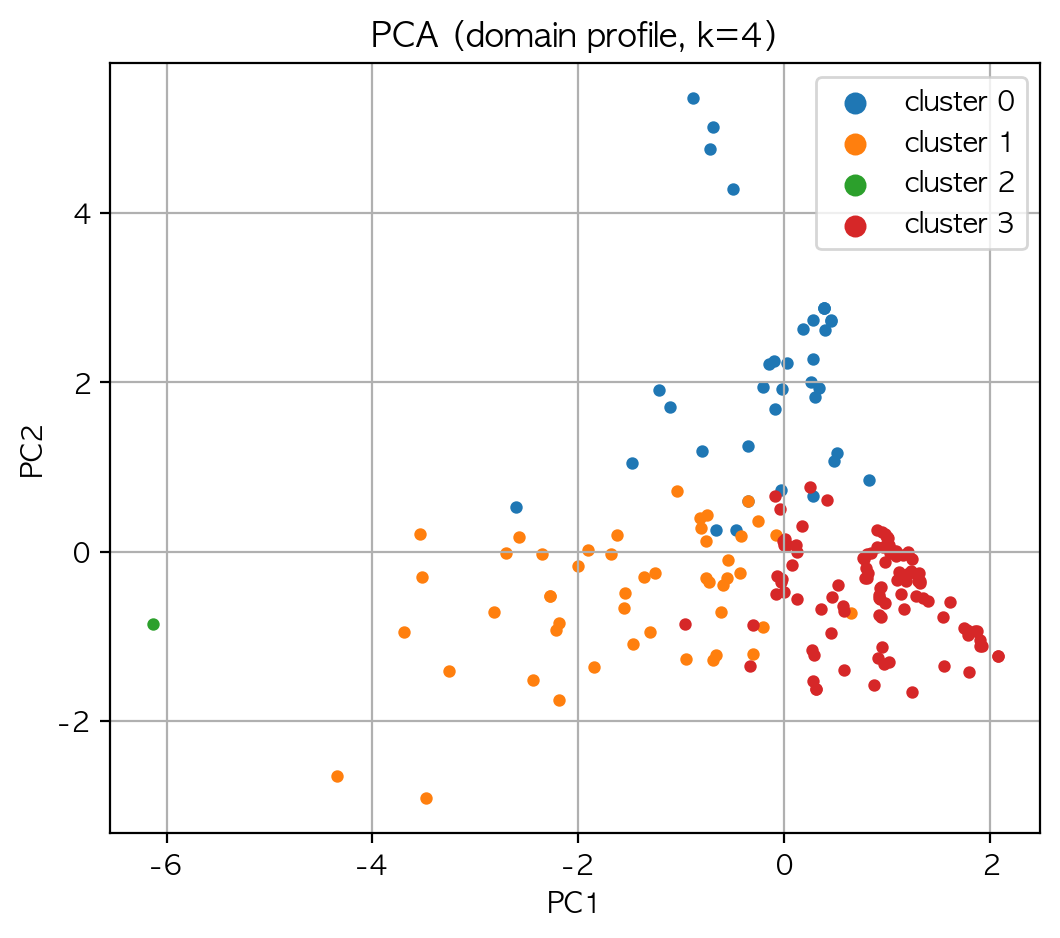

========== k=5 결과 ==========


top_domains
cluster                                                   
0        게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ...
1        커머스(26.18%), 게임(12.16%), 운세(7.66%), 생활(7.59%),...
2        운동/스포츠(50.00%), 운세(50.00%), 게임(0.00%), 교육(0.00...
3        교육(33.33%), 미디어/컨텐츠(33.33%), 커머스(33.33%), 게임(0...
4        금융(37.86%), 게임(20.68%), 미디어/컨텐츠(13.72%), 채용(10...

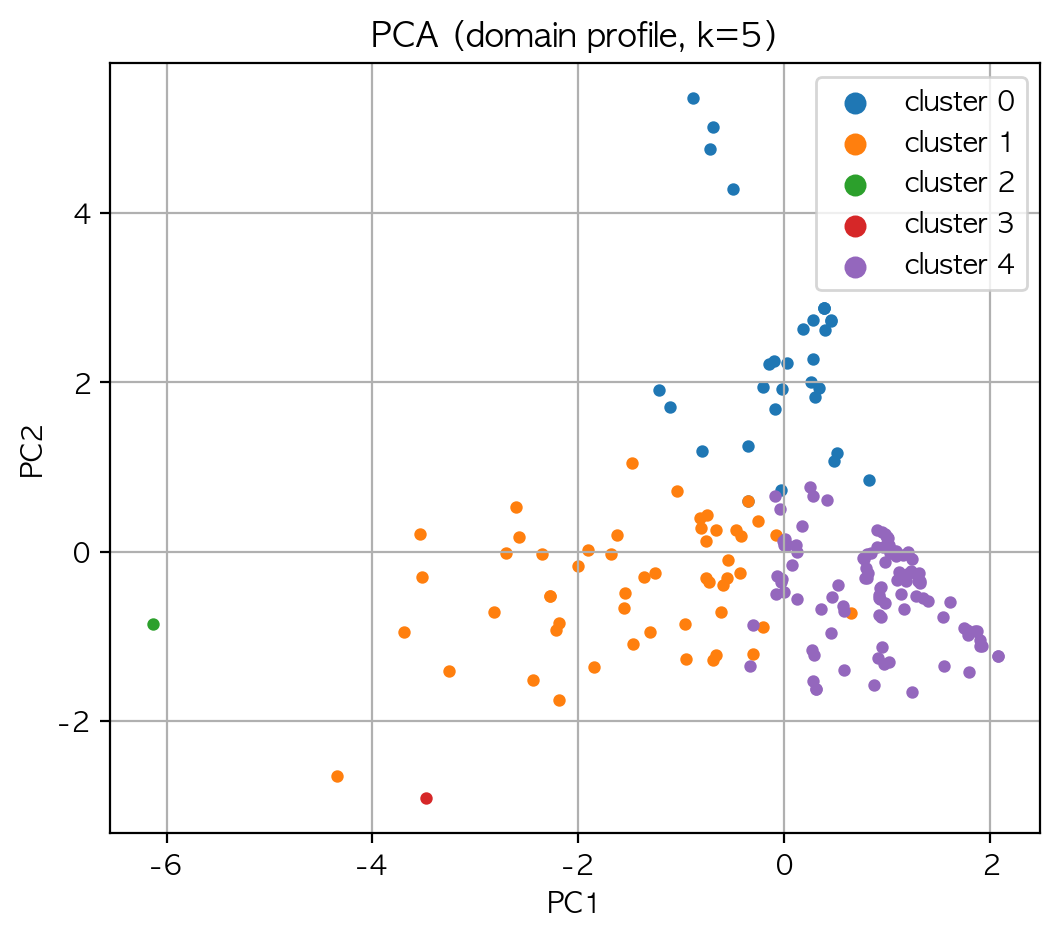

In [46]:
# ==============================
# k=3,4,5 클러스터링 결과 비교
# ==============================

for k in [3, 4, 5]:
    print("="*10, f"k={k} 결과", "="*10)
    
    # KMeans 학습
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # 결과 저장
    result = pd.DataFrame(index=df_ratio.index)
    result["cluster"] = labels
    
    # 클러스터 프로필
    cluster_profile = (
        pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
        .assign(cluster=labels)
        .groupby("cluster")
        .mean()
        .sort_index()
    )
    
    # 각 클러스터 대표 도메인 Top-N
    def top_domains(profile_row, topn=5):
        s = profile_row.sort_values(ascending=False).head(topn)
        return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

    topn = 5
    top_table = pd.DataFrame({
        "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
    }, index=cluster_profile.index)

    display(top_table)   # 클러스터별 상위 도메인 요약
    
    # PCA 시각화
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6,5))
    for c in range(k):
        idx = (labels == c)
        plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
    plt.title(f"PCA (domain profile, k={k})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(markerscale=2)
    plt.grid(True)
    plt.show()


In [47]:
# 클러스터별 매체사 리스트 뽑기
cluster_members = {
    c: result[result["cluster"] == c].index.tolist()
    for c in sorted(result["cluster"].unique())
}

# 확인
for c, mda_list in cluster_members.items():
    print(f"=== Cluster {c} 매체사 ===")
    print(mda_list[:20])  # 너무 많으면 앞 20개만 출력
    print(f"... 총 {len(mda_list)}개 매체사\n")


=== Cluster 0 매체사 ===
[12, 14, 18, 26, 56, 58, 87, 108, 270, 290, 342, 343, 344, 396, 397, 539, 540, 643, 651, 652]
... 총 31개 매체사

=== Cluster 1 매체사 ===
[32, 54, 73, 291, 337, 356, 371, 375, 384, 385, 389, 398, 409, 437, 442, 458, 480, 481, 492, 562]
... 총 53개 매체사

=== Cluster 2 매체사 ===
[374]
... 총 1개 매체사

=== Cluster 3 매체사 ===
[710]
... 총 1개 매체사

=== Cluster 4 매체사 ===
[22, 30, 246, 281, 294, 303, 324, 340, 341, 401, 482, 496, 564, 578, 579, 582, 583, 621, 630, 637]
... 총 103개 매체사



[INFO] 선택된 k = 3


domain_게임  domain_교육  domain_금융  domain_기타  domain_미디어/컨텐츠  \
cluster                                                               
0         0.744729   0.000055   0.033192   0.036886        0.030680   
1         0.119334   0.012952   0.061459   0.010291        0.067693   
2         0.204772   0.000075   0.380591   0.000893        0.135846   

         domain_뷰티  domain_비영리/공공  domain_생활  domain_식당/카페  domain_식음료  \
cluster                                                                  
0         0.007546       0.009153   0.032496      0.003297    0.019815   
1         0.039080       0.039972   0.074475      0.068670    0.048055   
2         0.022558       0.007458   0.064564      0.020662    0.003090   

         domain_운동/스포츠  domain_운세  domain_의료/건강  domain_채용  domain_커머스  
cluster                                                                 
0             0.000369   0.006850      0.024074   0.003328    0.047530  
1             0.017820   0.084429      0.053995   0.042756    0.259019  
2             0.000433   0.002972      0.004455   0.104753    0.046876

top_domains
cluster                                                   
0        게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ...
1        커머스(25.90%), 게임(11.93%), 운세(8.44%), 생활(7.45%),...
2        금융(38.06%), 게임(20.48%), 미디어/컨텐츠(13.58%), 채용(10...

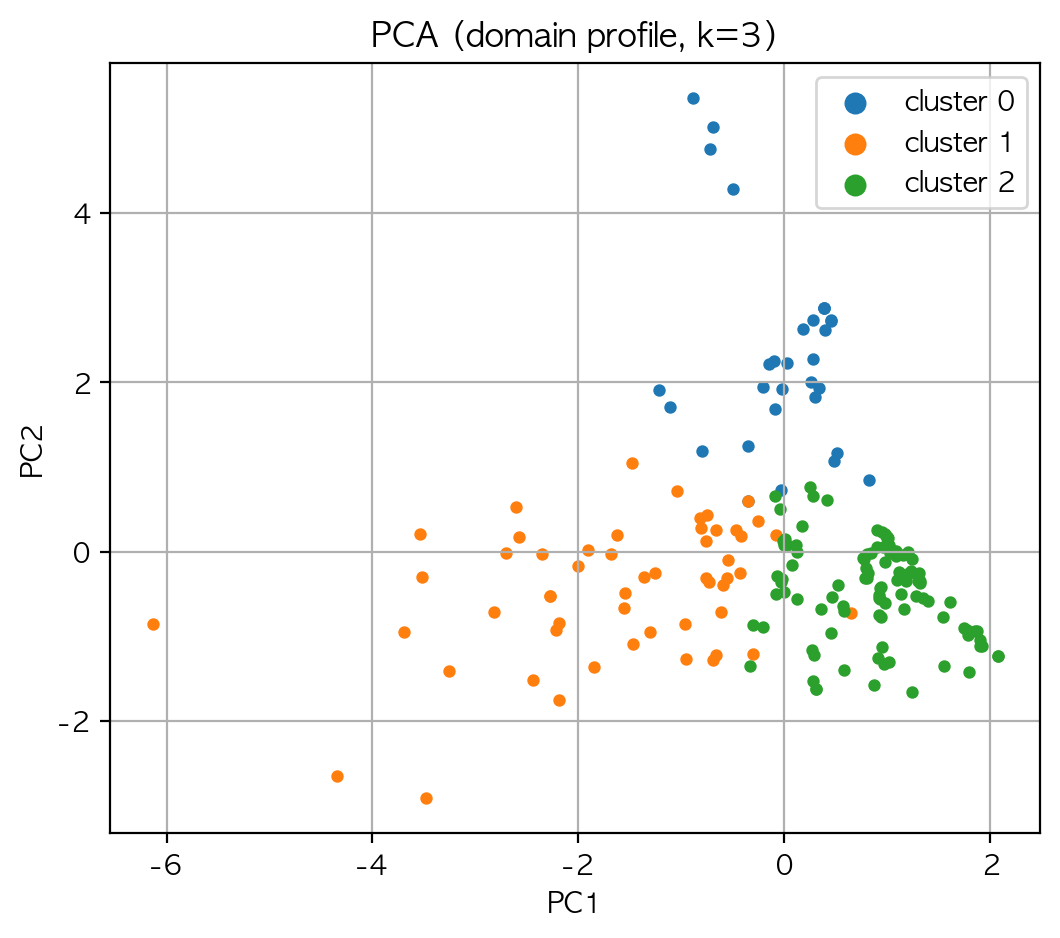

In [48]:
# 3) 최종 KMeans 학습 (k=3으로 직접 설정)
best_k = 3
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile)      # 클러스터별 평균 분포 (수치)
display(top_table)            # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile, k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()


In [49]:
# 클러스터별 매체사 리스트 뽑기
cluster_members = {
    c: result[result["cluster"] == c].index.tolist()
    for c in sorted(result["cluster"].unique())
}

# 확인
for c, mda_list in cluster_members.items():
    print(f"=== Cluster {c} 매체사 ===")
    print(mda_list[:20])  # 너무 많으면 앞 20개만 출력
    print(f"... 총 {len(mda_list)}개 매체사\n")


=== Cluster 0 매체사 ===
[12, 14, 18, 26, 56, 58, 87, 108, 270, 290, 342, 343, 344, 396, 397, 539, 540, 643, 651, 652]
... 총 31개 매체사

=== Cluster 1 매체사 ===
[32, 54, 73, 291, 337, 356, 371, 374, 375, 385, 389, 398, 409, 437, 442, 458, 480, 481, 492, 562]
... 총 54개 매체사

=== Cluster 2 매체사 ===
[22, 30, 246, 281, 294, 303, 324, 340, 341, 384, 401, 482, 496, 564, 578, 579, 582, 583, 621, 630]
... 총 104개 매체사



In [50]:
# 출력 행/열 제한 해제
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# # 출력 행/열 제한 복원
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

In [51]:
ads_timee.head()

rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2025-07-27              0    11059      398             5              0   
1    2025-07-27              0    13209      583             3              0   
2    2025-07-27              0    13928      303             3              3   
3    2025-07-27              0    13928      324             3              3   
4    2025-07-27              0    13928      340             6              6   

   rpt_time_acost  rpt_time_earn  weekday week_type  
0               0              0        6        주말  
1               0              0        6        주말  
2             510            360        6        주말  
3             510            360        6        주말  
4            1020            720        6        주말

In [52]:
ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    if 10 <= h < 14: return '낮(10-14)'
    if 14 <= h < 18: return '오후(14-18)'
    if 18 <= h < 22: return '저녁(18-22)'
    if 22 <= h or h < 2: return '심야(22-02)'
    return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

In [53]:
summary = (
    ads_time.groupby(['mda_idx','weekday','daypart'], as_index=False)
            .agg(clicks=('rpt_time_clk','sum'),
                 turns=('rpt_time_turn','sum'))
)

In [54]:
summary['cvr'] = np.where(summary['clicks'] > 0,
                          summary['turns'] / summary['clicks'], 0.0)
summary = summary.replace([np.inf, -np.inf], 0.0)


In [55]:
best_eff = (summary.sort_values(['mda_idx','cvr'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최고 효율'))

best_clk = (summary.sort_values(['mda_idx','clicks'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최다 클릭'))

final_result = pd.concat([best_eff, best_clk], ignore_index=True)


In [56]:
weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
final_result['weekday_name'] = final_result['weekday'].map(weekday_map)

eff = final_result[final_result['type']=='최고 효율'] \
        .rename(columns={'weekday_name':'weekday_name_eff',
                         'daypart':'daypart_eff',
                         'clicks':'clicks_eff',
                         'turns':'turns_eff',
                         'cvr':'cvr_eff'}) \
        [['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']]

vol = final_result[final_result['type']=='최다 클릭'] \
        .rename(columns={'weekday_name':'weekday_name_vol',
                         'daypart':'daypart_vol',
                         'clicks':'clicks_vol',
                         'turns':'turns_vol',
                         'cvr':'cvr_vol'}) \
        [['mda_idx','weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol']]


In [57]:
time_report = eff.merge(vol, on='mda_idx', how='outer')

In [58]:
time_report['slot_match'] = (
    (time_report['weekday_name_eff'] == time_report['weekday_name_vol']) &
    (time_report['daypart_eff'] == time_report['daypart_vol'])
)


In [59]:
time_report = time_report[[
    'mda_idx',
    'weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff',
    'weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol',
    'slot_match'
]].sort_values('mda_idx').reset_index(drop=True)

In [60]:
time_report

mda_idx weekday_name_eff daypart_eff  clicks_eff  turns_eff   cvr_eff  \
0         12                목   저녁(18-22)        3550       1716  0.483380   
1         14                금   심야(22-02)        5261       2125  0.403916   
2         18                월    낮(10-14)         174         15  0.086207   
3         22                금   아침(06-10)        2346       1561  0.665388   
4         26                목   새벽(02-06)          17          8  0.470588   
5         30                토   심야(22-02)         166         65  0.391566   
6         32                목   아침(06-10)          14          5  0.357143   
7         54                금    낮(10-14)         239        115  0.481172   
8         56                목   오후(14-18)        2319        902  0.388961   
9         58                금   새벽(02-06)       12629       7189  0.569245   
10        73                화   오후(14-18)           4          1  0.250000   
11        87                월   아침(06-10)           2          1  0.500000   
12       108                화   아침(06-10)           1          1  1.000000   
13       246                월   새벽(02-06)          32         33  1.031250   
14       270                월   아침(06-10)        2199       1453  0.660755   
15       281                월   아침(06-10)           8          6  0.750000   
16       290                월   새벽(02-06)           4          4  1.000000   
17       291                월   아침(06-10)           2          2  1.000000   
18       294                목   새벽(02-06)          53         19  0.358491   
19       303                월   새벽(02-06)         618        528  0.854369   
20       324                토   새벽(02-06)         470        399  0.848936   
21       337                금   오후(14-18)          81         36  0.444444   
22       340                금   새벽(02-06)         393        328  0.834606   
23       341                목   새벽(02-06)         669        553  0.826607   
24       342                목   오후(14-18)       14924      10771  0.721723   
25       343                목   심야(22-02)       15518       9887  0.637131   
26       344                목   오후(14-18)        2710       1963  0.724354   
27       356                월   오후(14-18)         114         29  0.254386   
28       371                화   심야(22-02)         625        337  0.539200   
29       374                목   저녁(18-22)           1          1  1.000000   
30       375                토   아침(06-10)           2          2  1.000000   
31       384                일   심야(22-02)        1156        346  0.299308   
32       385                토   심야(22-02)         168         65  0.386905   
33       389                금   새벽(02-06)          10         10  1.000000   
34       396                목   오후(14-18)        6855       5161  0.752881   
35       397                목   새벽(02-06)         151         96  0.635762   
36       398                화    낮(10-14)          89         62  0.696629   
37       401                일   오후(14-18)           5          2  0.400000   
38       409                목   새벽(02-06)           1          1  1.000000   
39       437                목    낮(10-14)           1          1  1.000000   
40       442                화   새벽(02-06)           1          1  1.000000   
41       458                토   저녁(18-22)           4          3  0.750000   
42       480                금   저녁(18-22)           1          1  1.000000   
43       481                목    낮(10-14)           1          1  1.000000   
44       482                목   새벽(02-06)           5          4  0.800000   
45       492                월   심야(22-02)           1          1  1.000000   
46       496                토   심야(22-02)        4200       1289  0.306905   
47       539                수   아침(06-10)        1822        568  0.311745   
48       540                수   심야(22-02)         555        309  0.556757   
49       562                일   심야(22-02)         616        481  0.780844   
50       563               

In [61]:
time_report['weekday_name_eff'].value_counts()

weekday_name_eff
금    44
월    40
토    33
목    28
화    19
수    16
일    11
Name: count, dtype: int64

In [62]:
time_report['daypart_eff'].value_counts()

daypart_eff
새벽(02-06)    65
저녁(18-22)    34
심야(22-02)    29
오후(14-18)    26
낮(10-14)     21
아침(06-10)    16
Name: count, dtype: int64

In [63]:
# 예시: 데이터프레임
# df = pd.DataFrame({
#     'mda_idx': [...],
#     'weekday_name_eff': [...],
#     'daypart_eff': [...]
# })

# 매체사, 요일, 시간대별 평균 비율 집계
pivot_df = time_report.groupby(['mda_idx', 'weekday_name_eff', 'daypart_eff']).size().reset_index(name='count')

# 전체 대비 비율 계산
pivot_df['ratio'] = pivot_df.groupby('mda_idx')['count'].apply(lambda x: x / x.sum())


TypeError: incompatible index of inserted column with frame index

In [174]:
time_report["daypart_eff"] = time_report["daypart_eff"].str.replace(r"\(.*\)", "", regex=True).str.strip()
time_report["daypart_vol"] = time_report["daypart_vol"].str.replace(r"\(.*\)", "", regex=True).str.strip()


In [175]:
time_report

mda_idx weekday_name_eff daypart_eff  clicks_eff  turns_eff   cvr_eff  \
0         12                목          저녁        3550       1716  0.483380   
1         14                금          심야        5261       2125  0.403916   
2         18                월           낮         174         15  0.086207   
3         22                금          아침        2346       1561  0.665388   
4         26                목          새벽          17          8  0.470588   
5         30                토          심야         166         65  0.391566   
6         32                목          아침          14          5  0.357143   
7         54                금           낮         239        115  0.481172   
8         56                목          오후        2319        902  0.388961   
9         58                금          새벽       12629       7189  0.569245   
10        73                화          오후           4          1  0.250000   
11        87                월          아침           2          1  0.500000   
12       108                화          아침           1          1  1.000000   
13       246                월          새벽          32         33  1.031250   
14       270                월          아침        2199       1453  0.660755   
15       281                월          아침           8          6  0.750000   
16       290                월          새벽           4          4  1.000000   
17       291                월          아침           2          2  1.000000   
18       294                목          새벽          53         19  0.358491   
19       303                월          새벽         618        528  0.854369   
20       324                토          새벽         470        399  0.848936   
21       337                금          오후          81         36  0.444444   
22       340                금          새벽         393        328  0.834606   
23       341                목          새벽         669        553  0.826607   
24       342                목          오후       14924      10771  0.721723   
25       343                목          심야       15518       9887  0.637131   
26       344                목          오후        2710       1963  0.724354   
27       356                월          오후         114         29  0.254386   
28       371                화          심야         625        337  0.539200   
29       374                목          저녁           1          1  1.000000   
30       375                토          아침           2          2  1.000000   
31       384                일          심야        1156        346  0.299308   
32       385                토          심야         168         65  0.386905   
33       389                금          새벽          10         10  1.000000   
34       396                목          오후        6855       5161  0.752881   
35       397                목          새벽         151         96  0.635762   
36       398                화           낮          89         62  0.696629   
37       401                일          오후           5          2  0.400000   
38       409                목          새벽           1          1  1.000000   
39       437                목           낮           1          1  1.000000   
40       442                화          새벽           1          1  1.000000   
41       458                토          저녁           4          3  0.750000   
42       480                금          저녁           1          1  1.000000   
43       481                목           낮           1          1  1.000000   
44       482                목          새벽           5          4  0.800000   
45       492                월          심야           1          1  1.000000   
46       496                토          심야        4200       1289  0.306905   
47       539                수          아침        1822        568  0.311745   
48       540                수          심야         555        309  0.556757   
49       562                일          심야         616        481  0.780844   
50       563               

In [ ]:
# Excel 호환을 위해 utf-8-sig 권장
time_report.to_csv('time_report.csv', index=False, encoding='utf-8-sig')


/Users/sparta/Documents/GitHub/final_project/venv/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


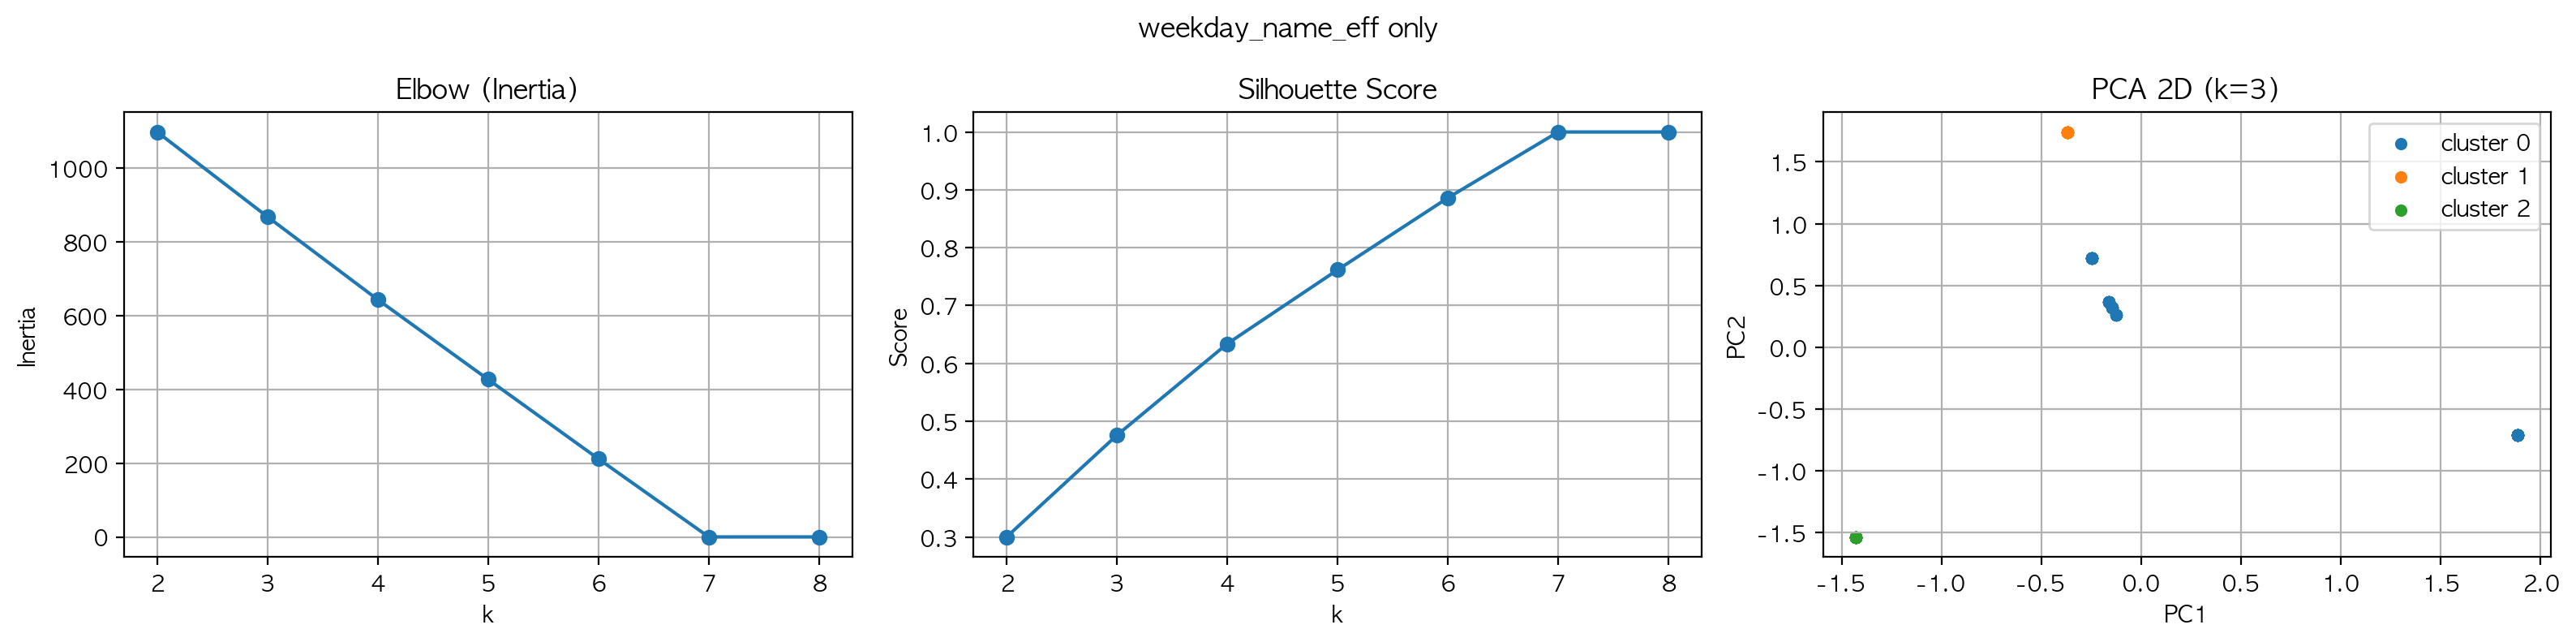

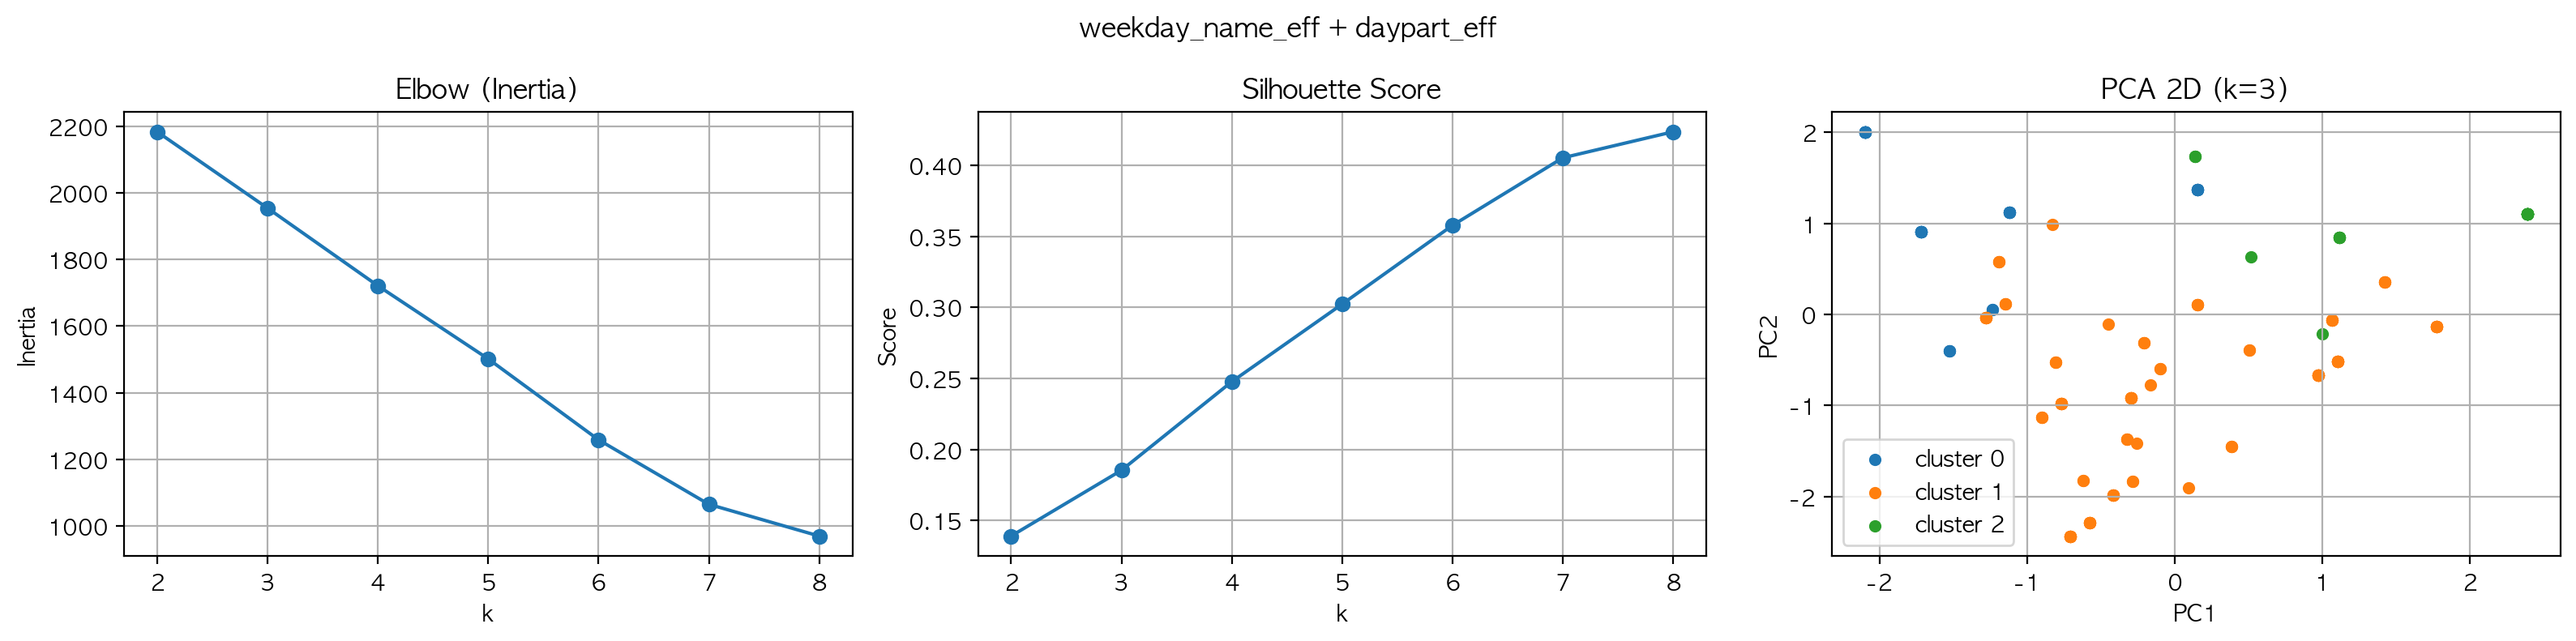

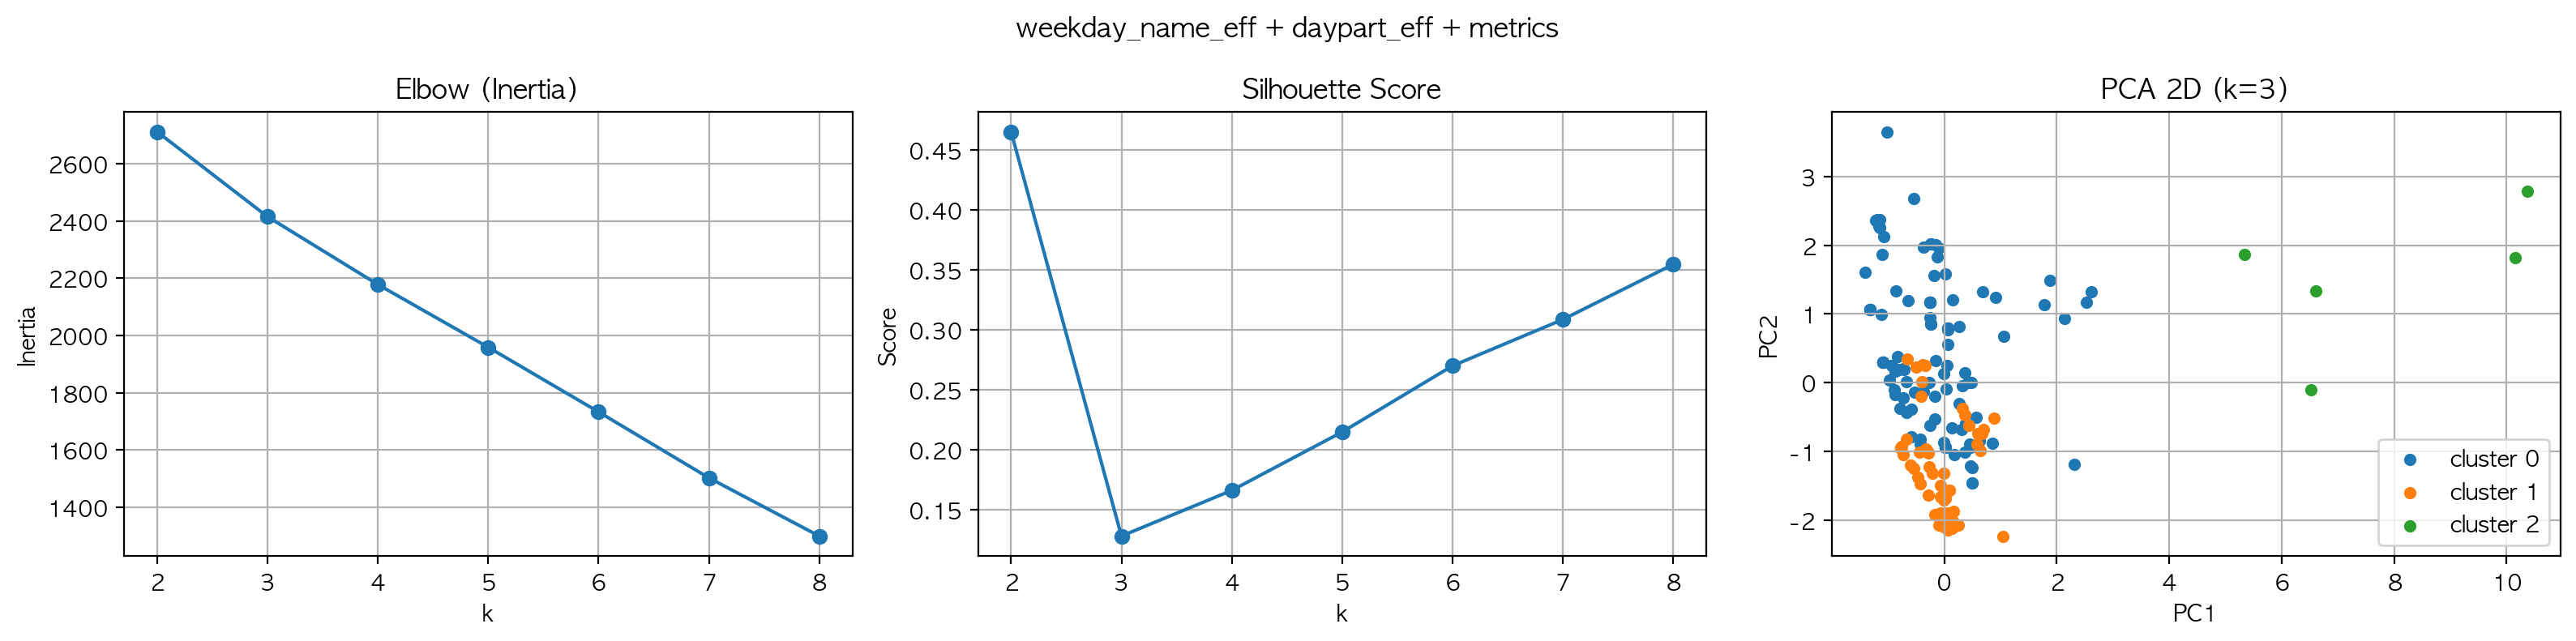


[Profile] X1:
              0      1      2      3      4      5      6
cluster                                                 
0        0.338  0.256  0.187 -0.515  0.153 -0.457  0.206
1       -0.547 -0.414 -0.302 -0.515 -0.247  2.188 -0.332
2       -0.547 -0.414 -0.302  1.943 -0.247 -0.457 -0.332

[Profile] X2:
              0      1      2      3      4      5      6      7      8      9  \
cluster                                                                         
0        1.828 -0.414 -0.302 -0.515 -0.247 -0.457 -0.332 -0.134 -0.382 -0.043   
1       -0.547  0.280  0.204  0.348  0.167 -0.457  0.224  0.153 -0.052 -0.008   
2       -0.547 -0.414 -0.302 -0.515 -0.247  2.188 -0.332 -0.351  0.689  0.084   

            10     11     12  
cluster                       
0       -0.138  0.200  0.545  
1        0.109  0.012 -0.144  
2       -0.193 -0.309 -0.228  

[Profile] X3:
              0      1      2      3      4      5      6      7      8      9  \
cluster                  

In [ ]:
# --------------------------------------------------
# 유틸: 엘보/실루엣 계산 + PCA 2D 산점도
# --------------------------------------------------
def elbow_sil_pca_plot(X, k_set: int, title: str, k_range=range(2, 9), point_size=20):
    """
    X: numpy array or DataFrame (피처 행렬; 스케일링 전 상태여도 됨)
    k_set: 사용자가 지정한 k로 KMeans 클러스터 후 PCA 산점도 표시
    k_range: 엘보/실루엣 계산 범위
    """
    # NaN/Inf 방지
    X = pd.DataFrame(X).replace([np.inf, -np.inf], np.nan).fillna(0.0).values

    # 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 엘보/실루엣
    inertias, sils = [], []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=50)
        labels = km.fit_predict(X_scaled)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(X_scaled, labels))

    # 최종 KMeans (사용자 지정 k)
    kmeans = KMeans(n_clusters=k_set, random_state=42, n_init=50)
    labels = kmeans.fit_predict(X_scaled)

    # PCA 2D
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    # 그림
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    # Elbow
    axes[0].plot(list(k_range), inertias, marker='o')
    axes[0].set_title('Elbow (Inertia)')
    axes[0].set_xlabel('k'); axes[0].set_ylabel('Inertia'); axes[0].grid(True)

    # Silhouette
    axes[1].plot(list(k_range), sils, marker='o')
    axes[1].set_title('Silhouette Score')
    axes[1].set_xlabel('k'); axes[1].set_ylabel('Score'); axes[1].grid(True)

    # PCA scatter
    for c in range(k_set):
        idx = (labels == c)
        axes[2].scatter(coords[idx, 0], coords[idx, 1], s=point_size, label=f'cluster {c}')
    axes[2].set_title(f'PCA 2D (k={k_set})')
    axes[2].set_xlabel('PC1'); axes[2].set_ylabel('PC2'); axes[2].legend(); axes[2].grid(True)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # 클러스터 결과 요약(평균값)도 반환
    return labels, pd.DataFrame(X_scaled).assign(cluster=labels).groupby('cluster').mean()

# --------------------------------------------------
# 피처 구성 함수들 (time_report 이용)
# --------------------------------------------------
def build_X1(df: pd.DataFrame):
    """1) weekday_name_eff 만 사용"""
    X = pd.get_dummies(df[['weekday_name_eff']], drop_first=False)
    return X

def build_X2(df: pd.DataFrame):
    """2) weekday_name_eff + daypart_eff 사용"""
    # daypart의 (18-22) 같은 시간대 괄호 제거(있다면)
    X_cat = df[['weekday_name_eff', 'daypart_eff']].copy()
    X_cat['daypart_eff'] = X_cat['daypart_eff'].astype(str).str.replace(r"\(.*\)", "", regex=True).str.strip()
    X = pd.get_dummies(X_cat, drop_first=False)
    return X

def build_X3(df: pd.DataFrame):
    """3) weekday_name_eff + daypart_eff + 성과지표(clicks/turns/cvr)"""
    X_cat = df[['weekday_name_eff', 'daypart_eff']].copy()
    X_cat['daypart_eff'] = X_cat['daypart_eff'].astype(str).str.replace(r"\(.*\)", "", regex=True).str.strip()
    X_cat = pd.get_dummies(X_cat, drop_first=False)

    # 성과지표 안전 계산(cvr 재계산; inf/NaN은 0)
    met = df[['clicks_eff', 'turns_eff']].copy()
    met = met.fillna(0)
    met['cvr_eff'] = np.where(met['clicks_eff'] > 0, met['turns_eff'] / met['clicks_eff'], 0.0)
    met = met.replace([np.inf, -np.inf], 0.0).fillna(0.0)

    X = pd.concat([X_cat, met], axis=1)
    return X

# --------------------------------------------------
# 실행: k를 직접 지정해서 3가지 클러스터링을 수행
# --------------------------------------------------
# 원하는 k 설정
k1, k2, k3 = 3, 3, 3   # <- 여기서 자유롭게 조정

# 1) weekday_name_eff only
X1 = build_X1(time_report)
labels1, prof1 = elbow_sil_pca_plot(X1, k_set=k1, title='weekday_name_eff only')

# 2) weekday_name_eff + daypart_eff
X2 = build_X2(time_report)
labels2, prof2 = elbow_sil_pca_plot(X2, k_set=k2, title='weekday_name_eff + daypart_eff')

# 3) weekday_name_eff + daypart_eff + metrics
X3 = build_X3(time_report)
labels3, prof3 = elbow_sil_pca_plot(X3, k_set=k3, title='weekday_name_eff + daypart_eff + metrics')

# (선택) 각 클러스터 라벨을 time_report에 붙이고 싶다면:
time_report_k = time_report.copy()
time_report_k['clust_X1_k'+str(k1)] = labels1
time_report_k['clust_X2_k'+str(k2)] = labels2
time_report_k['clust_X3_k'+str(k3)] = labels3

# (선택) 클러스터별 평균 프로필 확인
print("\n[Profile] X1:\n", prof1.round(3))
print("\n[Profile] X2:\n", prof2.round(3))
print("\n[Profile] X3:\n", prof3.round(3))


/Users/sparta/Documents/GitHub/final_project/venv/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


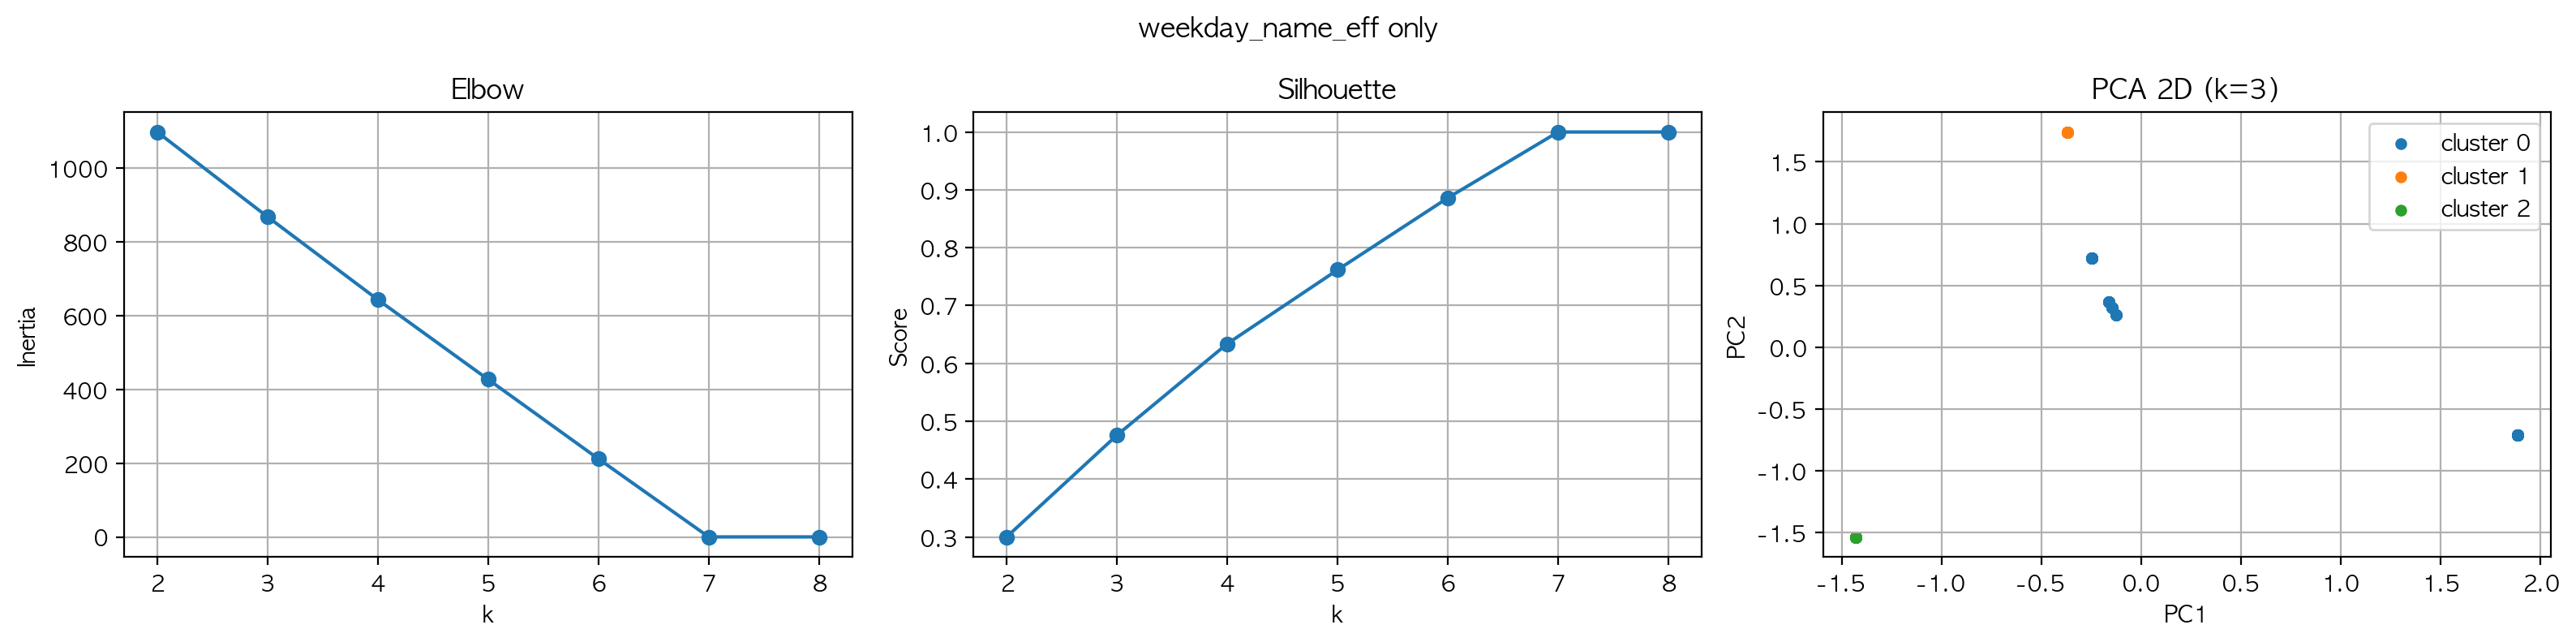

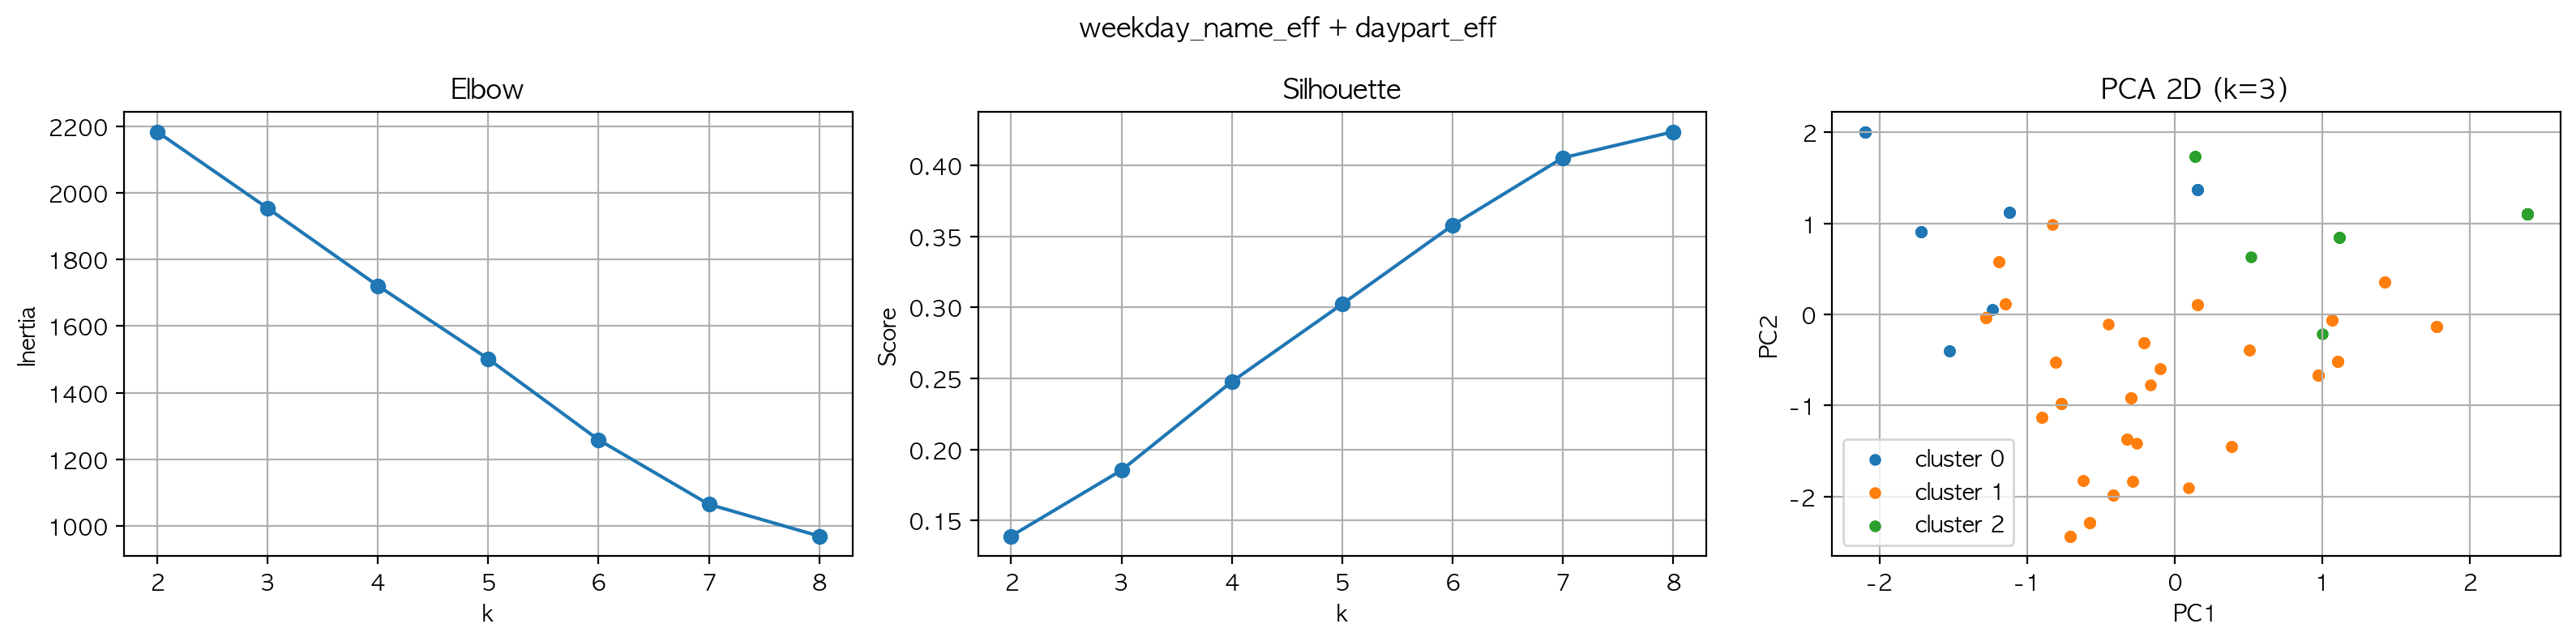

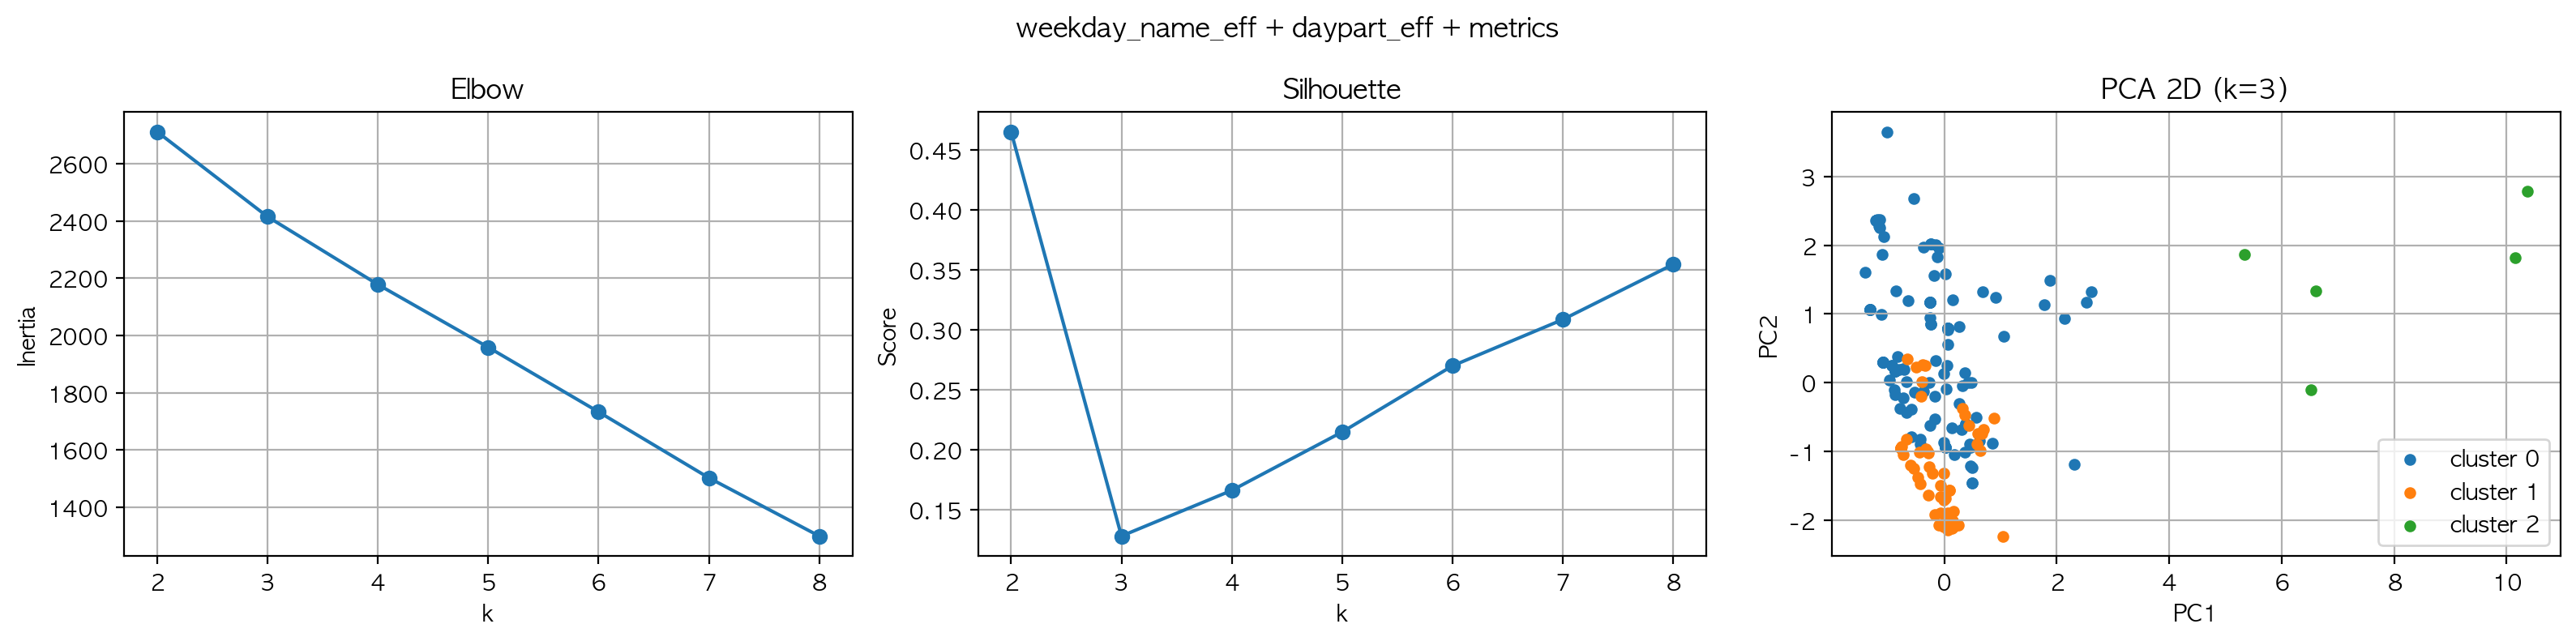

In [ ]:
# 데이터 전처리
df = time_report[["weekday_name_eff","daypart_eff","clicks_eff","turns_eff","cvr_eff"]].copy()
df["daypart_eff"] = df["daypart_eff"].astype(str).str.replace(r"\(.*\)", "", regex=True).str.strip()
df["cvr_eff"] = np.where(df["clicks_eff"] > 0, df["turns_eff"] / df["clicks_eff"], 0)
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# 함수 정의
def clustering_eval_plot(X, title, set_k=3):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 엘보 / 실루엣 계산
    ks = range(2, 9)
    inertias, sil_scores = [], []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=50)
        labels = km.fit_predict(X_scaled)
        inertias.append(km.inertia_)
        sil_scores.append(silhouette_score(X_scaled, labels))

    # 최종 모델 (내가 지정한 k)
    kmeans = KMeans(n_clusters=set_k, random_state=42, n_init=50)
    labels = kmeans.fit_predict(X_scaled)

    # PCA 시각화
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    # 그래프
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    axes[0].plot(list(ks), inertias, marker='o')
    axes[0].set_title("Elbow"); axes[0].set_xlabel("k"); axes[0].set_ylabel("Inertia"); axes[0].grid(True)

    axes[1].plot(list(ks), sil_scores, marker='o')
    axes[1].set_title("Silhouette"); axes[1].set_xlabel("k"); axes[1].set_ylabel("Score"); axes[1].grid(True)

    for c in range(set_k):
        idx = labels == c
        axes[2].scatter(coords[idx,0], coords[idx,1], s=18, label=f"cluster {c}")
    axes[2].set_title(f"PCA 2D (k={set_k})"); axes[2].set_xlabel("PC1"); axes[2].set_ylabel("PC2"); axes[2].legend(); axes[2].grid(True)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return labels

# 1. weekday_name_eff만
X1 = pd.get_dummies(df[["weekday_name_eff"]], drop_first=False)
labels1 = clustering_eval_plot(X1, "weekday_name_eff only", set_k=3)

# 2. weekday_name_eff + daypart_eff
X2 = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)
labels2 = clustering_eval_plot(X2, "weekday_name_eff + daypart_eff", set_k=3)

# 3. weekday_name_eff + daypart_eff + 성과지표
X3_cat = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)
X3_num = df[["clicks_eff","turns_eff","cvr_eff"]]
X3 = pd.concat([X3_cat, X3_num], axis=1)
labels3 = clustering_eval_plot(X3, "weekday_name_eff + daypart_eff + metrics", set_k=3)


In [ ]:
time_report_with_cluster = time_report.copy()
time_report_with_cluster["cluster_wk"] = labels1   # weekday_name_eff만 사용한 결과
time_report_with_cluster["cluster_wk_dp"] = labels2 # weekday_name_eff + daypart_eff
time_report_with_cluster["cluster_all"] = labels3  # 모든 feature 사용

# 클러스터별 평균 프로필 확인
def cluster_summary(X, labels, title):
    profile = (
        pd.DataFrame(X, columns=X.columns)
        .assign(cluster=labels)
        .groupby("cluster")
        .mean()
    )
    print(f"\n==== {title} ====")
    display(profile)

cluster_summary(X1, labels1, "weekday_name_eff only")
cluster_summary(X2, labels2, "weekday_name_eff + daypart_eff")
cluster_summary(X3, labels3, "weekday_name_eff + daypart_eff + metrics")

# mda_idx별 클러스터 배정 결과
display(time_report_with_cluster[["mda_idx","cluster_wk","cluster_wk_dp","cluster_all"]].head(20))



==== weekday_name_eff only ====


weekday_name_eff_금  weekday_name_eff_목  weekday_name_eff_수  \
cluster                                                               
0                  0.372881            0.237288            0.135593   
1                  0.000000            0.000000            0.000000   
2                  0.000000            0.000000            0.000000   

         weekday_name_eff_월  weekday_name_eff_일  weekday_name_eff_토  \
cluster                                                               
0                       0.0             0.09322                 0.0   
1                       0.0             0.00000                 1.0   
2                       1.0             0.00000                 0.0   

         weekday_name_eff_화  
cluster                      
0                  0.161017  
1                  0.000000  
2                  0.000000


==== weekday_name_eff + daypart_eff ====


weekday_name_eff_금  weekday_name_eff_목  weekday_name_eff_수  \
cluster                                                               
0                       1.0            0.000000            0.000000   
1                       0.0            0.245614            0.140351   
2                       0.0            0.000000            0.000000   

         weekday_name_eff_월  weekday_name_eff_일  weekday_name_eff_토  \
cluster                                                               
0                  0.000000            0.000000                 0.0   
1                  0.350877            0.096491                 0.0   
2                  0.000000            0.000000                 1.0   

         weekday_name_eff_화  daypart_eff_낮  daypart_eff_새벽  daypart_eff_심야  \
cluster                                                                      
0                  0.000000       0.068182        0.159091        0.136364   
1                  0.166667       0.157895        0.315789        0.149123   
2                  0.000000       0.000000        0.666667        0.181818   

         daypart_eff_아침  daypart_eff_오후  daypart_eff_저녁  
cluster                                                  
0              0.045455        0.204545        0.386364  
1              0.114035        0.140351        0.122807  
2              0.030303        0.030303        0.090909


==== weekday_name_eff + daypart_eff + metrics ====


weekday_name_eff_금  weekday_name_eff_목  weekday_name_eff_수  \
cluster                                                               
0                  0.303279            0.131148            0.065574   
1                  0.093750            0.140625            0.125000   
2                  0.200000            0.600000            0.000000   

         weekday_name_eff_월  weekday_name_eff_일  weekday_name_eff_토  \
cluster                                                               
0                  0.245902            0.057377            0.081967   
1                  0.156250            0.062500            0.343750   
2                  0.000000            0.000000            0.200000   

         weekday_name_eff_화  daypart_eff_낮  daypart_eff_새벽  daypart_eff_심야  \
cluster                                                                      
0                  0.114754       0.172131             0.0        0.221311   
1                  0.078125       0.000000             1.0        0.000000   
2                  0.000000       0.000000             0.2        0.400000   

         daypart_eff_아침  daypart_eff_오후  daypart_eff_저녁    clicks_eff  \
cluster                                                                 
0              0.131148        0.196721        0.278689    290.008197   
1              0.000000        0.000000        0.000000    282.890625   
2              0.000000        0.400000        0.000000  12068.600000   

           turns_eff   cvr_eff  
cluster                         
0         142.868852  0.732489  
1         180.437500  0.722196  
2        7925.400000  0.663277

mda_idx  cluster_wk  cluster_wk_dp  cluster_all
0        12           0              1            0
1        14           0              0            0
2        18           2              1            0
3        22           0              0            0
4        26           0              1            1
5        30           1              2            0
6        32           0              1            0
7        54           0              0            0
8        56           0              1            0
9        58           0              0            2
10       73           0              1            0
11       87           2              1            0
12      108           0              1            0
13      246           2              1            1
14      270           2              1            0
15      281           2              1            0
16      290           2              1            1
17      291           2              1            0
18      294           0              1            1
19      303           2              1            1

클러스터별 패턴 평균값:
         slot_match  weekday_name_eff_금  weekday_name_eff_목  \
cluster                                                       
0          0.107692            0.092308            0.123077   
1          0.133333            0.383333            0.050000   
2          0.060606            0.212121            0.287879   

         weekday_name_eff_수  weekday_name_eff_월  weekday_name_eff_일  \
cluster                                                               
0                  0.107692            0.153846            0.061538   
1                  0.016667            0.250000            0.100000   
2                  0.106061            0.212121            0.030303   

         weekday_name_eff_토  weekday_name_eff_화  daypart_eff_낮(10-14)  \
cluster                                                                 
0                  0.369231            0.092308              0.000000   
1                  0.133333            0.066667              0.000000   
2                  0.0

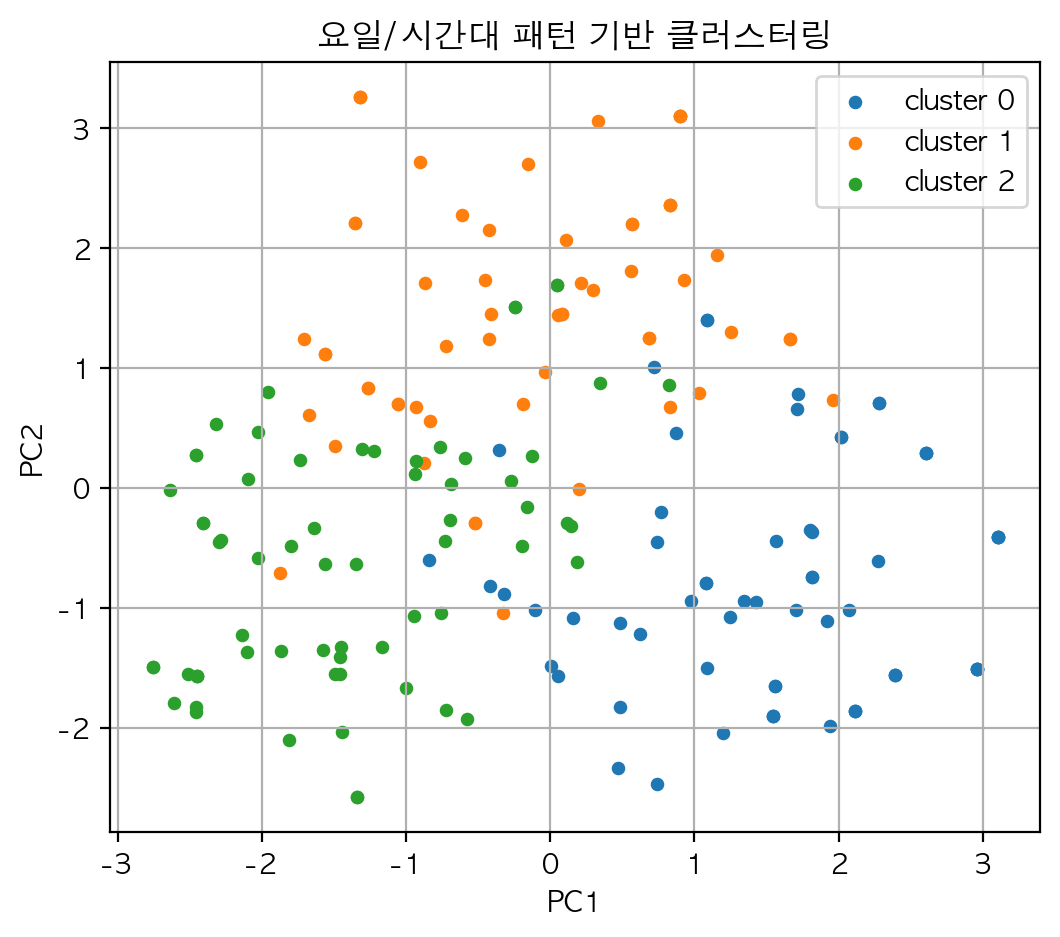

In [ ]:
time_report_km = time_report.copy()

# slot_match를 int 변환
time_report_km['slot_match'] = time_report_km['slot_match'].astype(int)

# 카테고리형 변수만 선택
pattern_features = time_report_km[['weekday_name_eff','daypart_eff','weekday_name_vol','daypart_vol','slot_match']].copy()

# 원핫 인코딩 (요일, 시간대 → 더미변수)
X = pd.get_dummies(pattern_features, drop_first=False)

# ------------------------------------
# 1) 스케일링 
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) 클러스터링 (예: k=3)
# ------------------------------------
k = 3
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

time_report_km['cluster'] = labels

# ------------------------------------
# 3) 클러스터별 프로필 확인
# ------------------------------------
cluster_profile = (
    pd.concat([pd.DataFrame(X, index=time_report_km.index), time_report_km['cluster']], axis=1)
    .groupby('cluster')
    .mean()
)

print("클러스터별 패턴 평균값:")
print(cluster_profile)

# ------------------------------------
# 4) 시각화 (PCA로 2D 축소)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("요일/시간대 패턴 기반 클러스터링")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


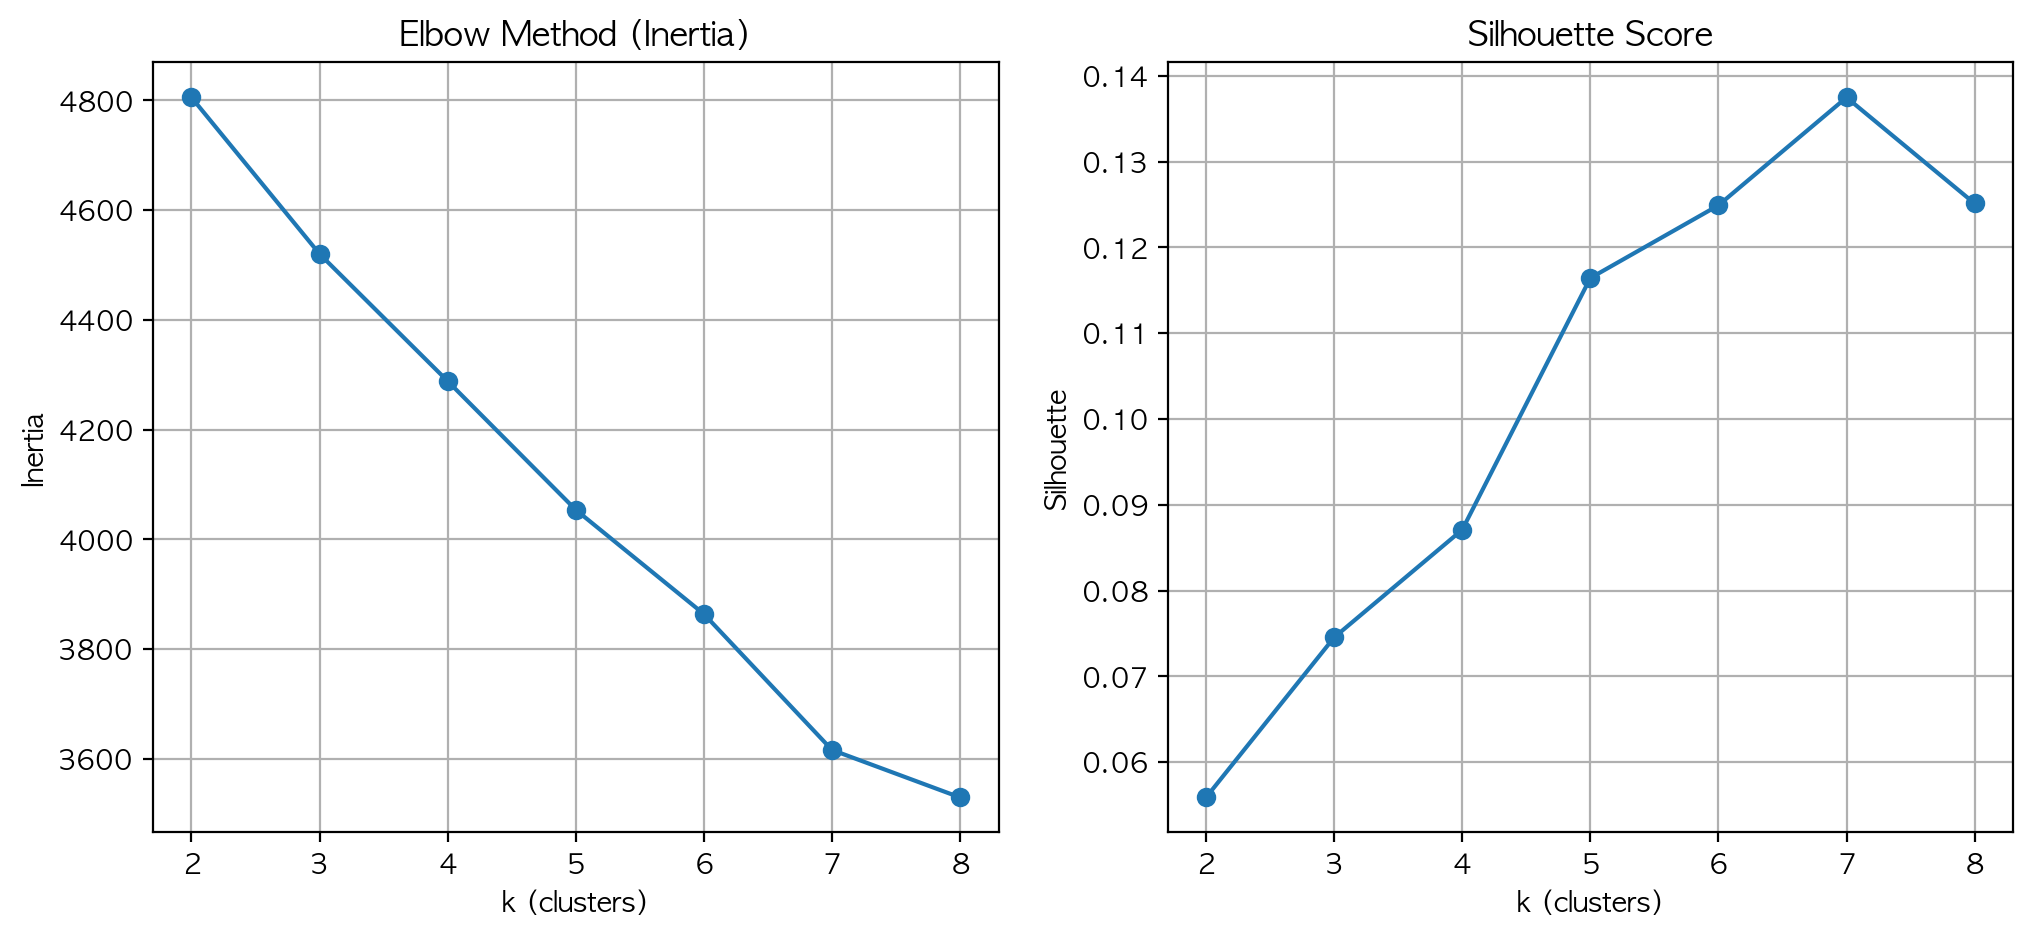

In [ ]:
# ------------------------------------
# 0) 데이터 준비 (요일/시간대 패턴만)
# ------------------------------------
time_report_km = time_report.copy()
time_report_km['slot_match'] = time_report_km['slot_match'].astype(int)

pattern_features = time_report_km[['weekday_name_eff','daypart_eff','weekday_name_vol','daypart_vol','slot_match']].copy()

# 원핫 인코딩
X = pd.get_dummies(pattern_features, drop_first=False)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 1) 엘보 & 실루엣 계산
# ------------------------------------
ks = range(2, 9)   # k=2~8까지 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)                        # 관성 (엘보)
    sil_scores.append(silhouette_score(X_scaled, labels))  # 실루엣 스코어

# ------------------------------------
# 2) 시각화
# ------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 엘보법
axes[0].plot(ks, inertias, marker='o')
axes[0].set_title("Elbow Method (Inertia)")
axes[0].set_xlabel("k (clusters)")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

# 실루엣 스코어
axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k (clusters)")
axes[1].set_ylabel("Silhouette")
axes[1].grid(True)

plt.show()


/var/folders/h_/w4rld_6j5l13g0td8v__qc7r0000gn/T/ipykernel_18352/3943086699.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eff_df['cvr_eff'].replace([np.inf, -np.inf], np.nan, inplace=True)


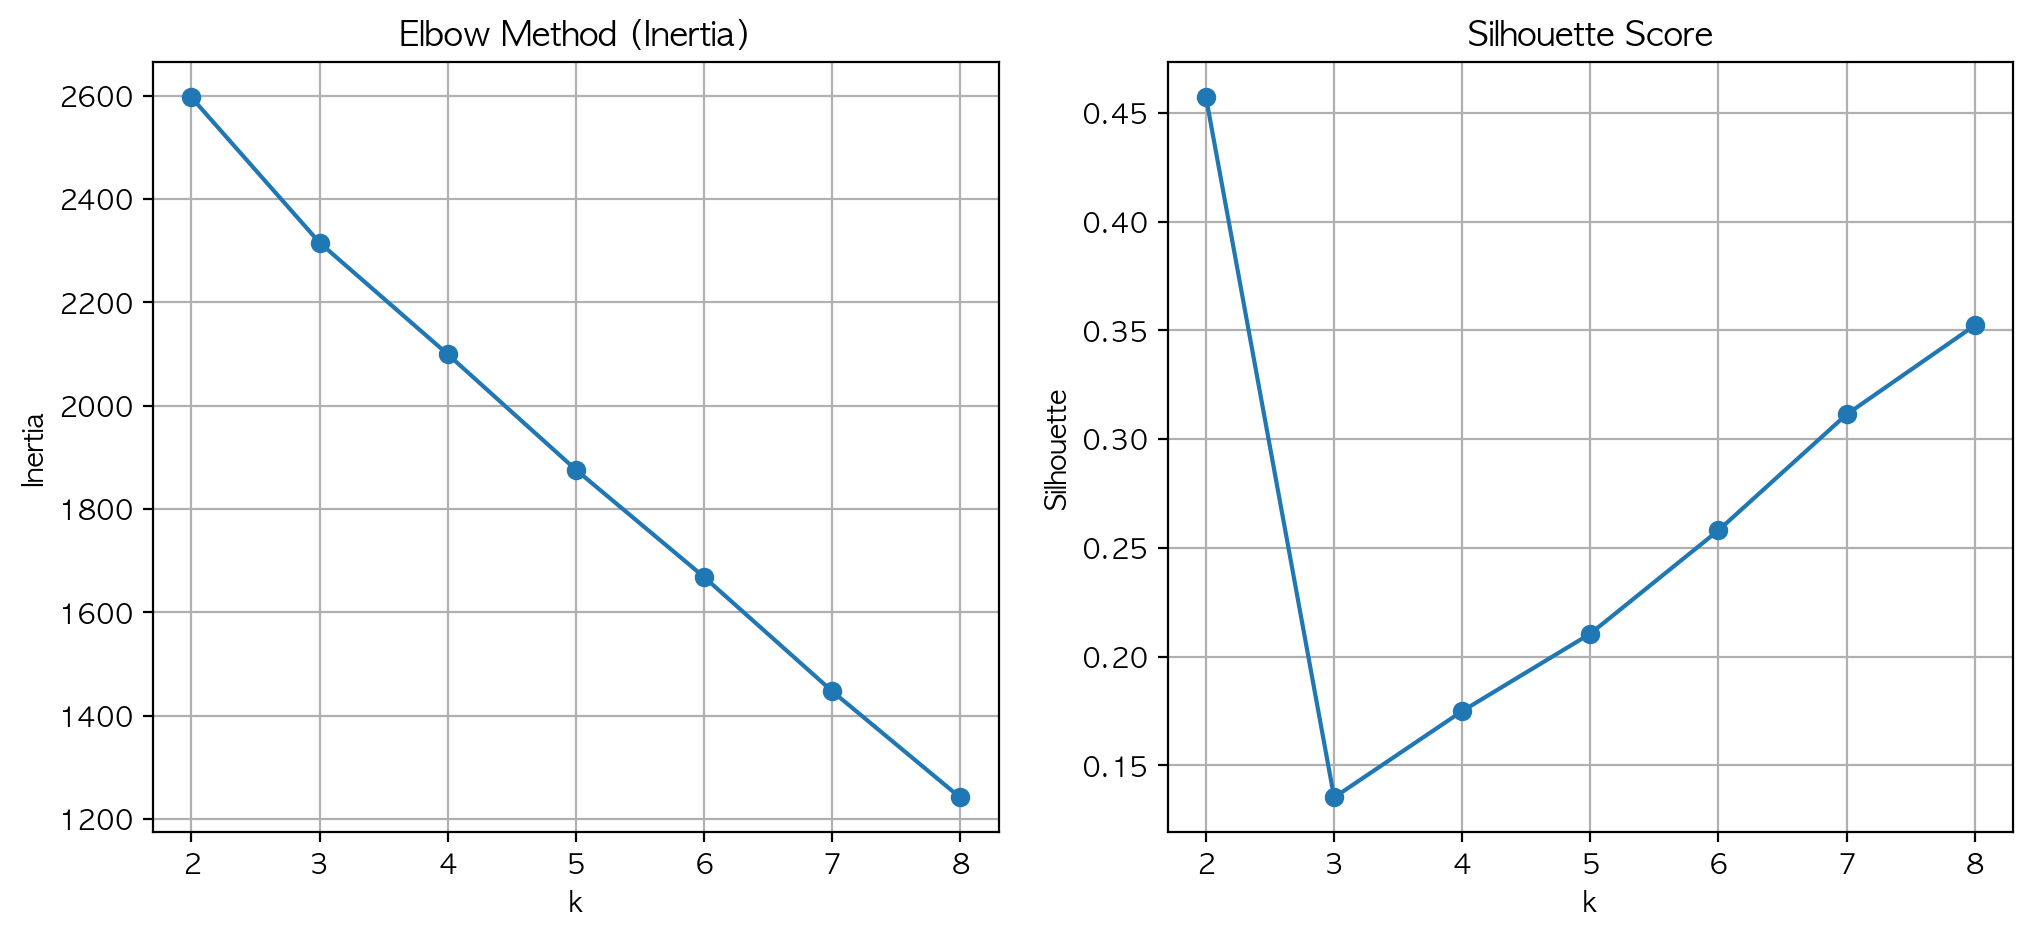

클러스터별 평균값
         weekday_name_eff_금  weekday_name_eff_목  weekday_name_eff_수  \
cluster                                                               
0                       0.0            0.277778                 0.0   
1                       1.0            0.000000                 0.0   
2                       0.2            0.600000                 0.0   
3                       0.0            0.000000                 1.0   
4                       0.0            0.000000                 0.0   

         weekday_name_eff_월  weekday_name_eff_일  weekday_name_eff_토  \
cluster                                                               
0                  0.411111            0.122222                 0.0   
1                  0.000000            0.000000                 0.0   
2                  0.000000            0.000000                 0.2   
3                  0.000000            0.000000                 0.0   
4                  0.000000            0.000000                 1.

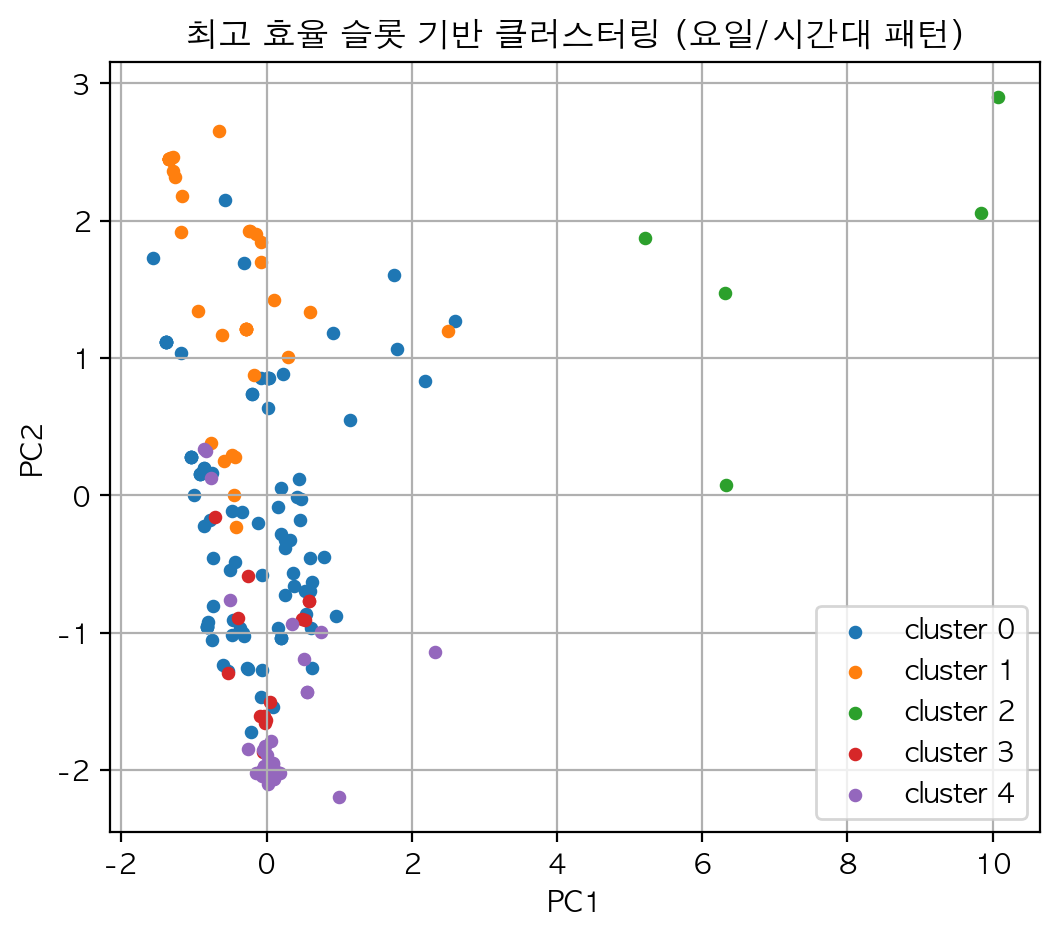

In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
df_df = time_report.copy()

# 최고 효율 슬롯 관련 컬럼만 선택
eff_df = df_df[['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']].copy()

# inf/NaN 처리
eff_df['cvr_eff'] = pd.to_numeric(eff_df['cvr_eff'], errors='coerce')
eff_df['cvr_eff'].replace([np.inf, -np.inf], np.nan, inplace=True)
eff_df = eff_df.dropna(subset=['cvr_eff'])

# ------------------------------------
# 1) 카테고리 → 원핫 인코딩
# ------------------------------------
X = pd.get_dummies(eff_df[['weekday_name_eff']], drop_first=False)

# 수치형 컬럼 합치기
X = pd.concat([X, eff_df[['clicks_eff','turns_eff','cvr_eff']]], axis=1)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) k 값 탐색 (엘보 & 실루엣)
# ------------------------------------
ks = range(2, 9)
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(ks, inertias, marker='o')
axes[0].set_title("Elbow Method (Inertia)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")
axes[1].grid(True)
plt.show()

# ------------------------------------
# 3) 최종 클러스터링 (예: k=3)
# ------------------------------------
best_k = 5
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

eff_df['cluster'] = labels

# ------------------------------------
# 4) 클러스터별 프로필
# ------------------------------------
cluster_profile = (
    pd.concat([pd.DataFrame(X, index=eff_df.index), eff_df['cluster']], axis=1)
    .groupby('cluster')
    .mean()
)

print("클러스터별 평균값")
print(cluster_profile)

# ------------------------------------
# 5) 시각화 (PCA)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("최고 효율 슬롯 기반 클러스터링 (요일/시간대 패턴)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


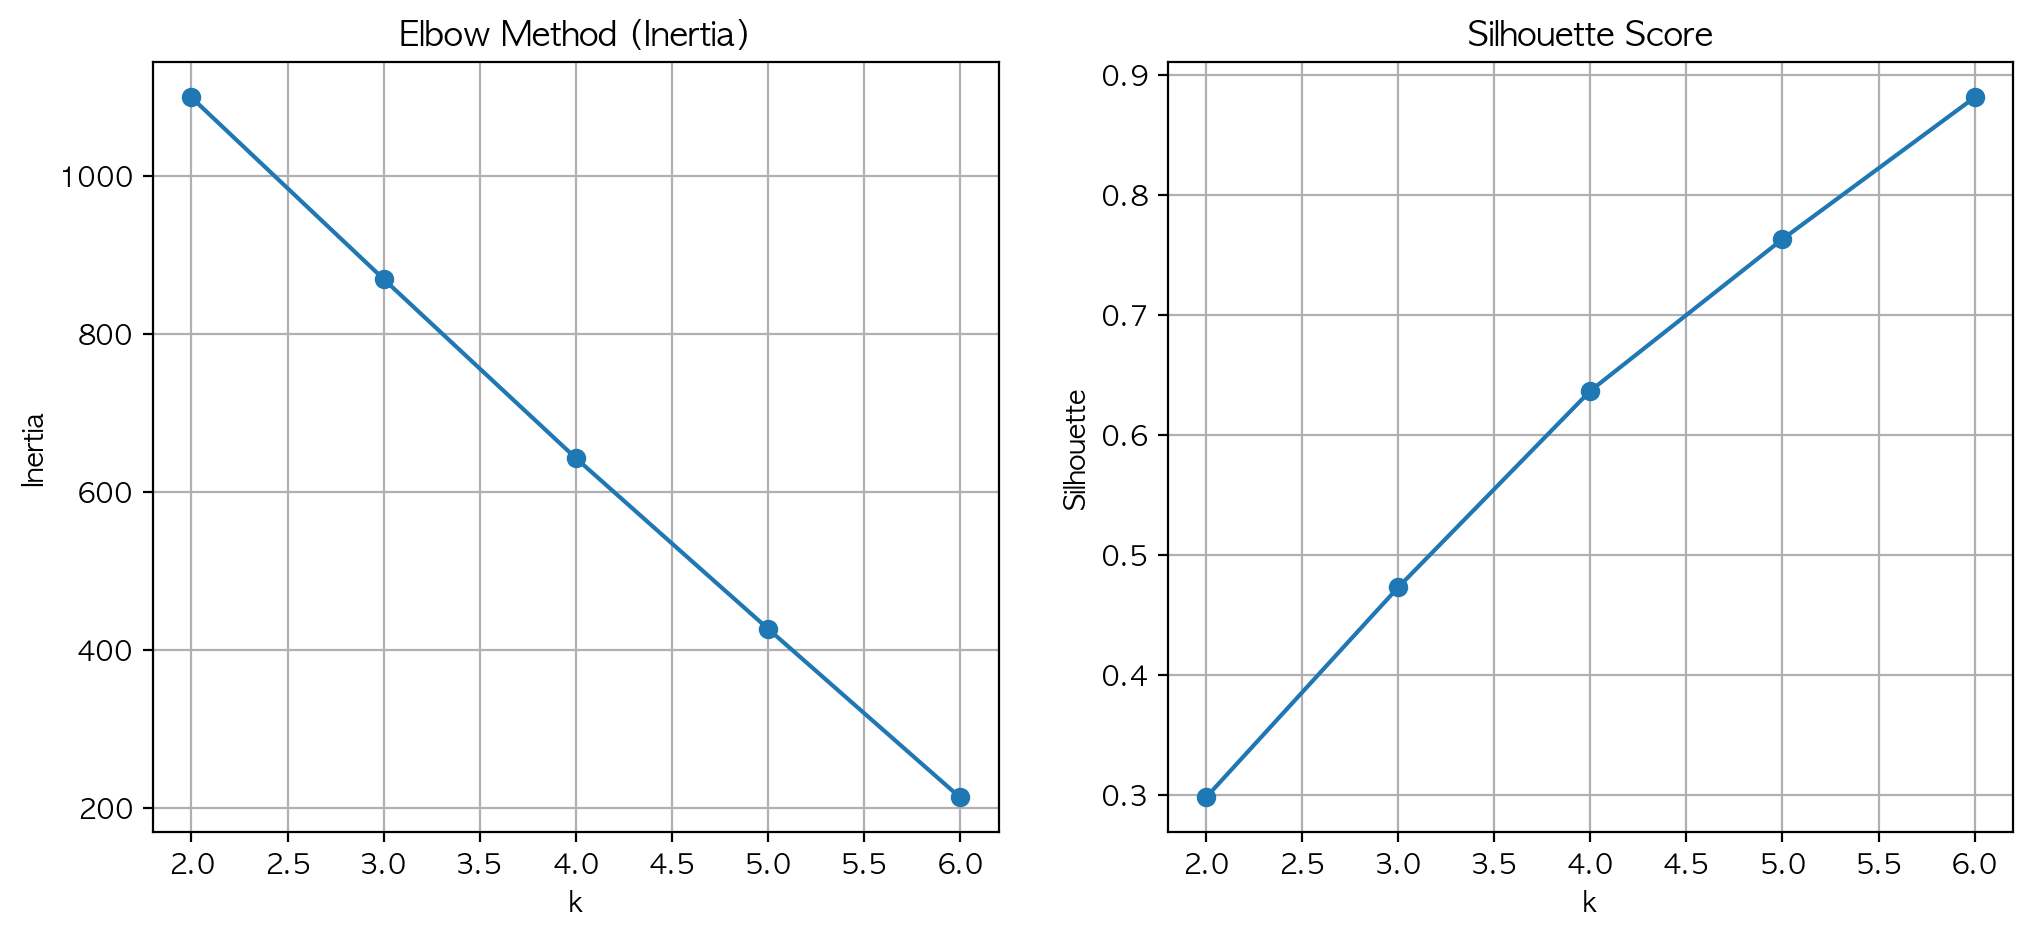

클러스터별 요일 분포:
weekday_name_eff         금         목        수    월        일    토         화
cluster                                                                   
0                 0.361345  0.252101  0.12605  0.0  0.10084  0.0  0.159664
1                 0.000000  0.000000  0.00000  1.0  0.00000  0.0  0.000000
2                 0.000000  0.000000  0.00000  0.0  0.00000  1.0  0.000000


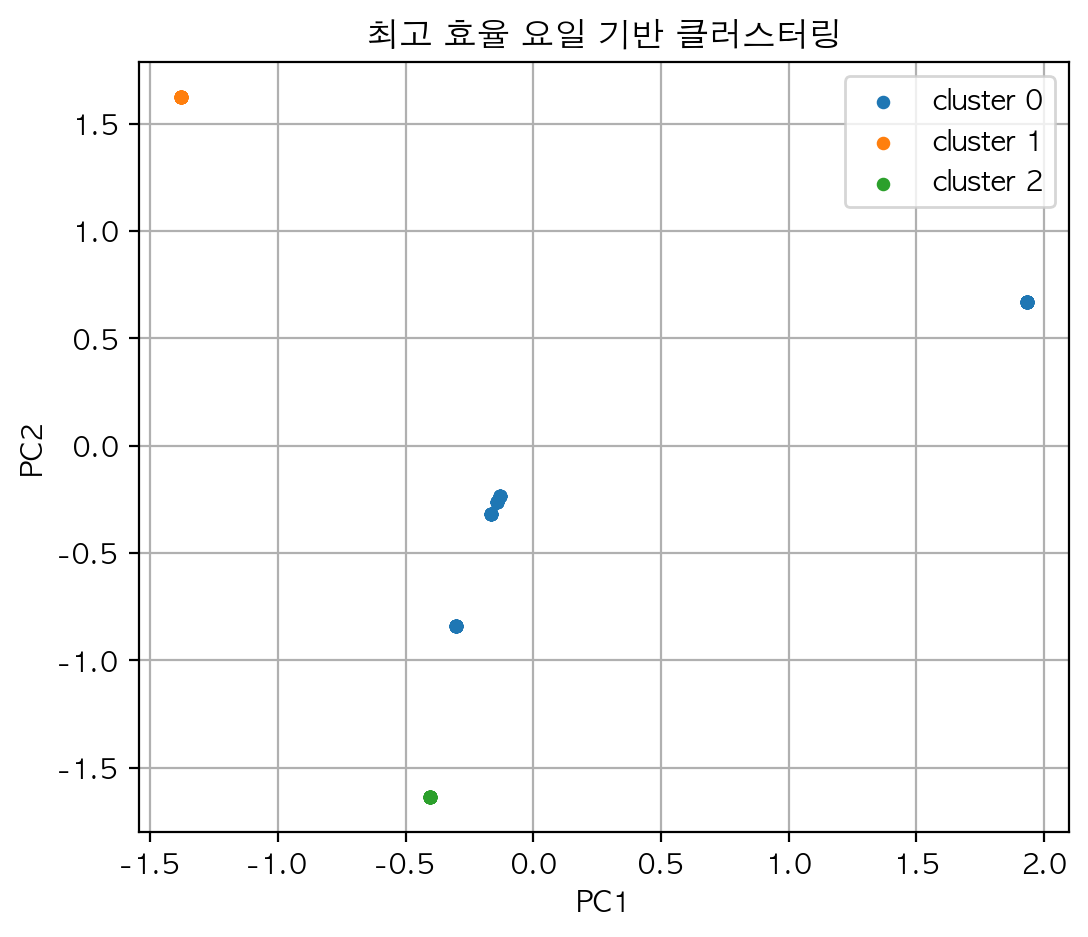

In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
df = time_report.copy()

# 최고 효율 요일만 추출
X = pd.get_dummies(df[['weekday_name_eff']], drop_first=False)

# ------------------------------------
# 1) 스케일링
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) k 값 탐색 (엘보 & 실루엣)
# ------------------------------------
ks = range(2, 7)   # k=2~6 정도 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(ks, inertias, marker='o')
axes[0].set_title("Elbow Method (Inertia)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")
axes[1].grid(True)
plt.show()

# ------------------------------------
# 3) 최종 클러스터링 (예: k=3)
# ------------------------------------
best_k = 3
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['cluster'] = labels

# ------------------------------------
# 4) 클러스터별 분포
# ------------------------------------
cluster_profile = df.groupby('cluster')['weekday_name_eff'].value_counts(normalize=True).unstack().fillna(0)
print("클러스터별 요일 분포:")
print(cluster_profile)

# ------------------------------------
# 5) 시각화 (PCA)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("최고 효율 요일 기반 클러스터링")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


클러스터별 패턴 평균값:
         slot_match  weekday_name_eff_금  weekday_name_eff_목  \
cluster                                                       
0          0.046512                 1.0             0.00000   
1          0.147826                 0.0             0.26087   
2          0.000000                 0.0             0.00000   

         weekday_name_eff_수  weekday_name_eff_월  weekday_name_eff_일  \
cluster                                                               
0                  0.000000             0.00000            0.000000   
1                  0.130435             0.33913            0.104348   
2                  0.000000             0.00000            0.000000   

         weekday_name_eff_토  weekday_name_eff_화  daypart_eff_낮  \
cluster                                                          
0                       0.0            0.000000       0.069767   
1                       0.0            0.165217       0.139130   
2                       1.0            0.000000   

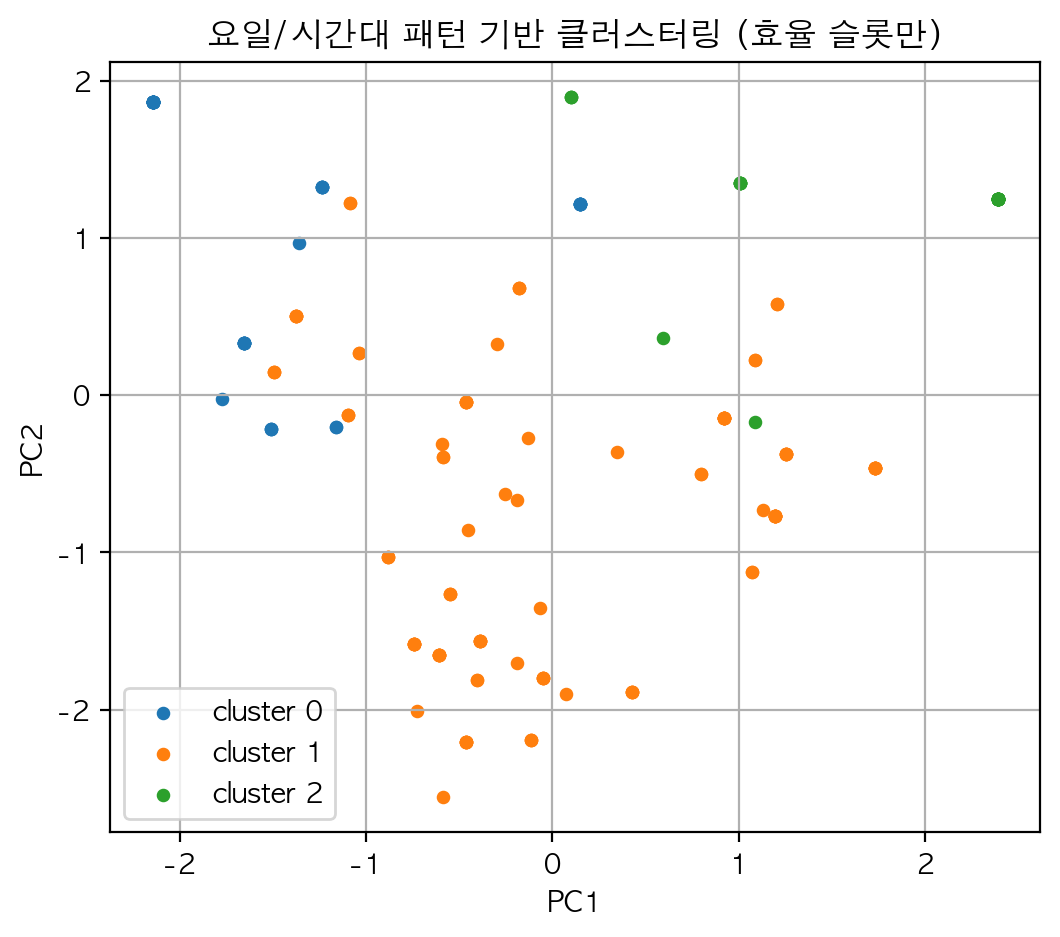

In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
time_report_km = time_report.copy()

# slot_match int 변환
time_report_km['slot_match'] = time_report_km['slot_match'].astype(int)

# ✅ 효율 슬롯만 선택 (볼륨 제외)
pattern_features = time_report_km[['weekday_name_eff', 'daypart_eff', 'slot_match']].copy()

# 원핫 인코딩
X = pd.get_dummies(pattern_features, drop_first=False)

# ------------------------------------
# 1) 스케일링 
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) 클러스터링 (예: k=3)
# ------------------------------------
k = 3
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

time_report_km['cluster'] = labels

# ------------------------------------
# 3) 클러스터별 프로필 확인
# ------------------------------------
cluster_profile = (
    pd.concat([pd.DataFrame(X, index=time_report_km.index), time_report_km['cluster']], axis=1)
    .groupby('cluster')
    .mean()
)

print("클러스터별 패턴 평균값:")
print(cluster_profile)

# ------------------------------------
# 4) 시각화 (PCA로 2D 축소)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("요일/시간대 패턴 기반 클러스터링 (효율 슬롯만)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


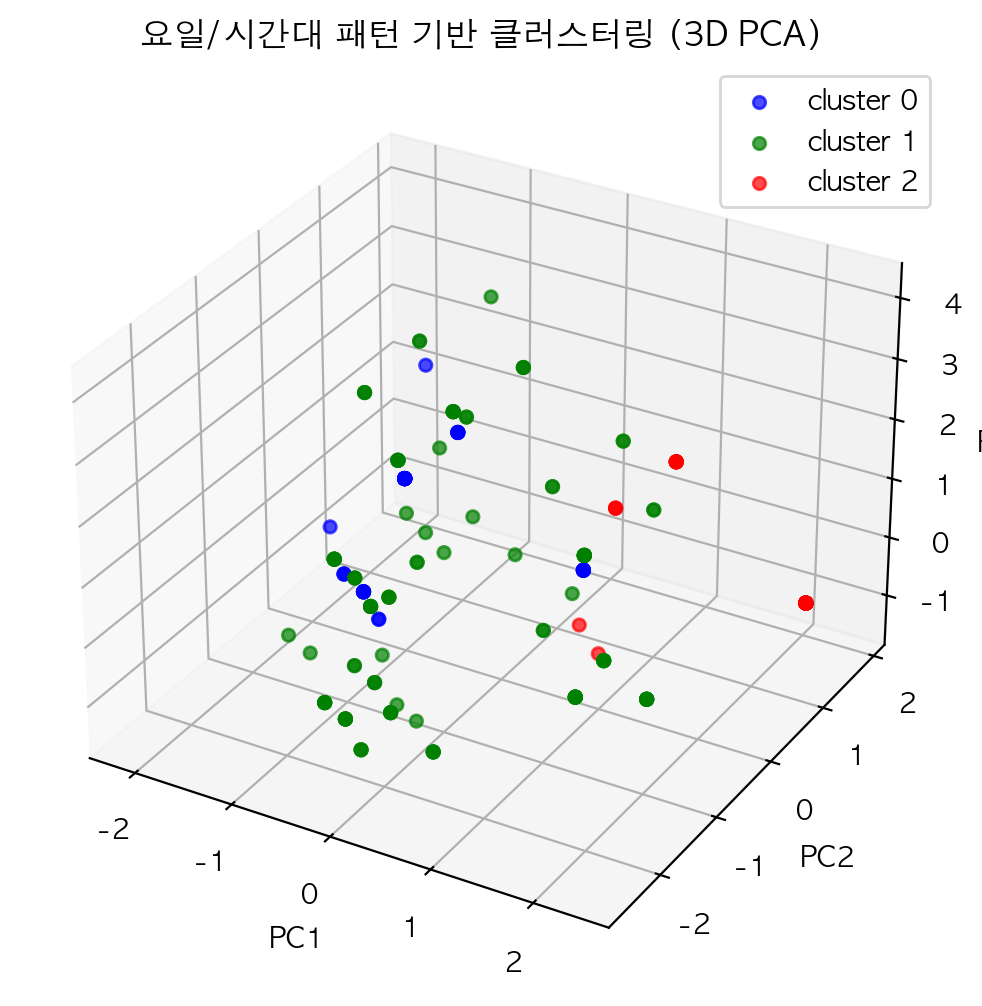

In [ ]:
# ------------------------------------
# 3D PCA 변환
# ------------------------------------
pca_3d = PCA(n_components=3, random_state=42)
coords_3d = pca_3d.fit_transform(X_scaled)

# ------------------------------------
# 3D 시각화
# ------------------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 최대 7개 색상
for c in range(k):
    idx = (labels == c)
    ax.scatter(coords_3d[idx,0], coords_3d[idx,1], coords_3d[idx,2], 
               s=20, c=colors[c % len(colors)], label=f"cluster {c}", alpha=0.7)

ax.set_title("요일/시간대 패턴 기반 클러스터링 (3D PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()


In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
features = ["weekday_name_eff","daypart_eff","clicks_eff","turns_eff","cvr_eff"]
df = time_report[features].copy()

# 범주형 → 원핫 인코딩
df_enc = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)

# 수치형 그대로 추가
df_num = df[["clicks_eff","turns_eff","cvr_eff"]]

X = pd.concat([df_enc, df_num], axis=1)

# ------------------------------------
# 1) 스케일링
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) KMeans 클러스터링
# ------------------------------------
k = 3  # 군집 개수 원하는대로 조정
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_scaled)

time_report["cluster"] = labels

# ------------------------------------
# 3) 클러스터별 평균 프로필
# ------------------------------------
cluster_profile = pd.DataFrame(X, columns=X.columns).assign(cluster=labels).groupby("cluster").mean()
print("클러스터별 평균값:")
print(cluster_profile)

# ------------------------------------
# 4) 2D 시각화 (PCA)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("효율 슬롯 기반 클러스터링")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


ValueError: Input X contains infinity or a value too large for dtype('float64').

=== 클러스터 요약 ===
   cluster    n top_weekday top_daypart    avg_clicks    avg_turns   avg_cvr
0        0    5           목          심야  12068.600000  7925.400000  0.663277
1        1  130           월          새벽    290.500000   161.969231  0.595319
2        2   56           금          저녁    280.482143   141.464286  0.896299


/var/folders/h_/w4rld_6j5l13g0td8v__qc7r0000gn/T/ipykernel_18352/641793038.py:45: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df_out.groupby("cluster").apply(cluster_summary).reset_index()


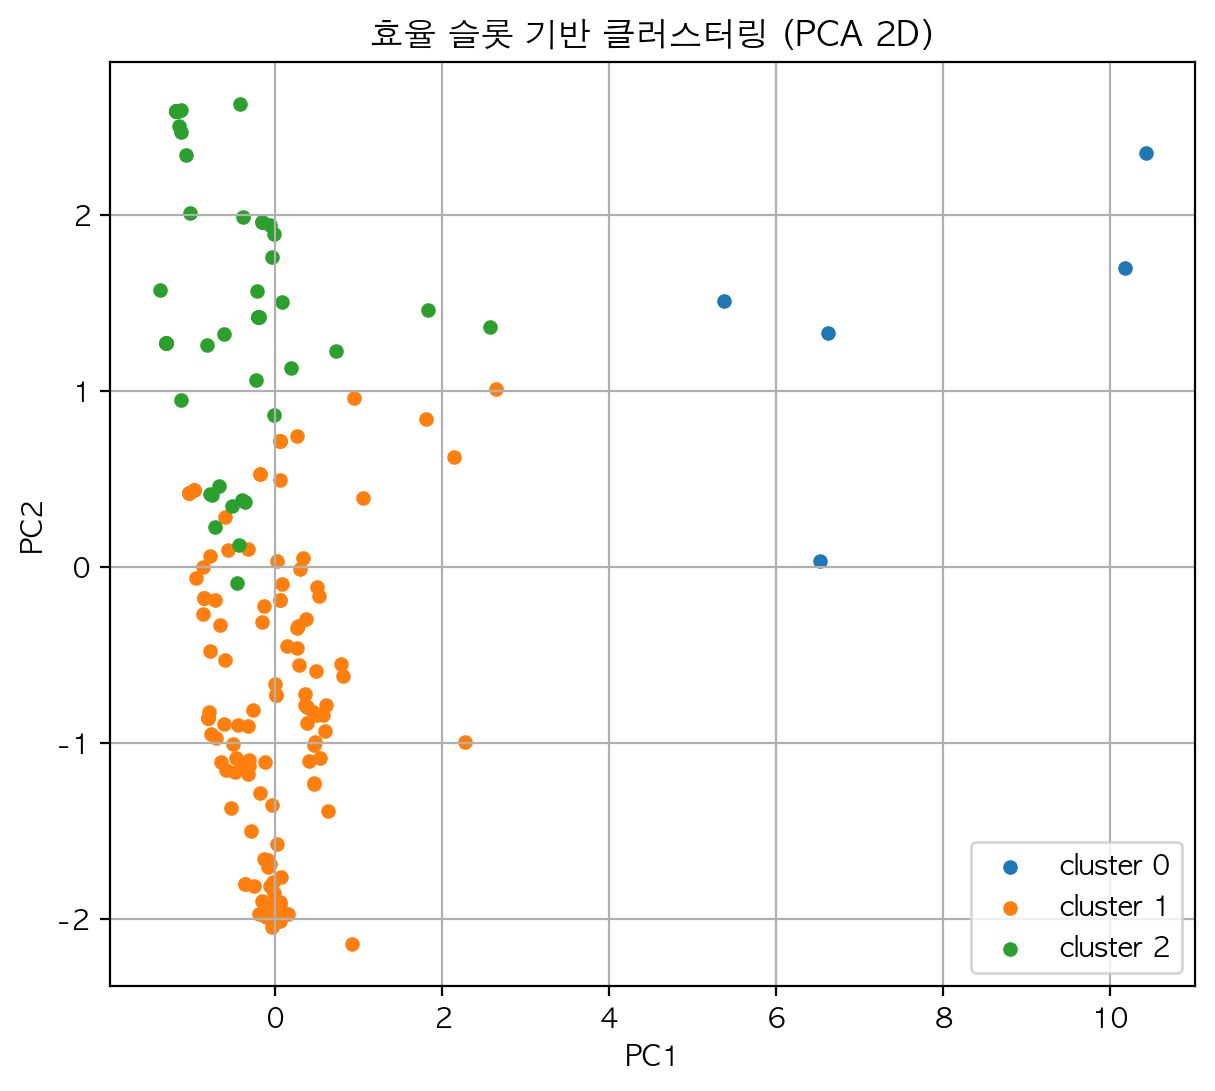

In [ ]:
# 0) 사용 컬럼만 추출
use_cols = ["weekday_name_eff","daypart_eff","clicks_eff","turns_eff","cvr_eff"]
df = time_report[use_cols].copy()


# - CVR 안전 계산(클릭 0이면 0)
df["cvr_eff"] = np.where(df["clicks_eff"] > 0,
                         df["turns_eff"] / df["clicks_eff"],
                         0)

# 결측/무한대 방지
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# 2) 인코딩 + 스케일링
X_cat = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)
X_num = df[["clicks_eff","turns_eff","cvr_eff"]]
X = pd.concat([X_cat, X_num], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) KMeans (k 설정만 바꿔서 사용)
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=50)
labels = km.fit_predict(X_scaled)

df_out = df.copy()
df_out["cluster"] = labels

# 4) 클러스터 요약(가장 간단한 버전)
def cluster_summary(g: pd.DataFrame) -> pd.Series:
    # 모드(최빈) 요일/시간대
    w_mode = g["weekday_name_eff"].mode()
    d_mode = g["daypart_eff"].mode()
    return pd.Series({
        "n": len(g),
        "top_weekday": (w_mode.iat[0] if not w_mode.empty else None),
        "top_daypart": (d_mode.iat[0] if not d_mode.empty else None),
        "avg_clicks": g["clicks_eff"].mean(),
        "avg_turns": g["turns_eff"].mean(),
        "avg_cvr": np.where(g["clicks_eff"]>0,
                            g["turns_eff"]/g["clicks_eff"], 0).mean()
    })

summary = df_out.groupby("cluster").apply(cluster_summary).reset_index()
print("=== 클러스터 요약 ===")
print(summary)

# (원하시면 원-핫 평균 프로필도 확인 가능)
# profile = pd.DataFrame(X, columns=X.columns).assign(cluster=labels).groupby("cluster").mean()

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
for c in range(k):
    idx = labels == c
    plt.scatter(coords[idx,0], coords[idx,1], s=18, label=f"cluster {c}")
plt.title("효율 슬롯 기반 클러스터링 (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# 결과 데이터프레임: 각 매체사의 클러스터 라벨 포함
# df_out  # 필요시 확인


[INFO] 실루엣 최대 k = 2, score = 0.4644


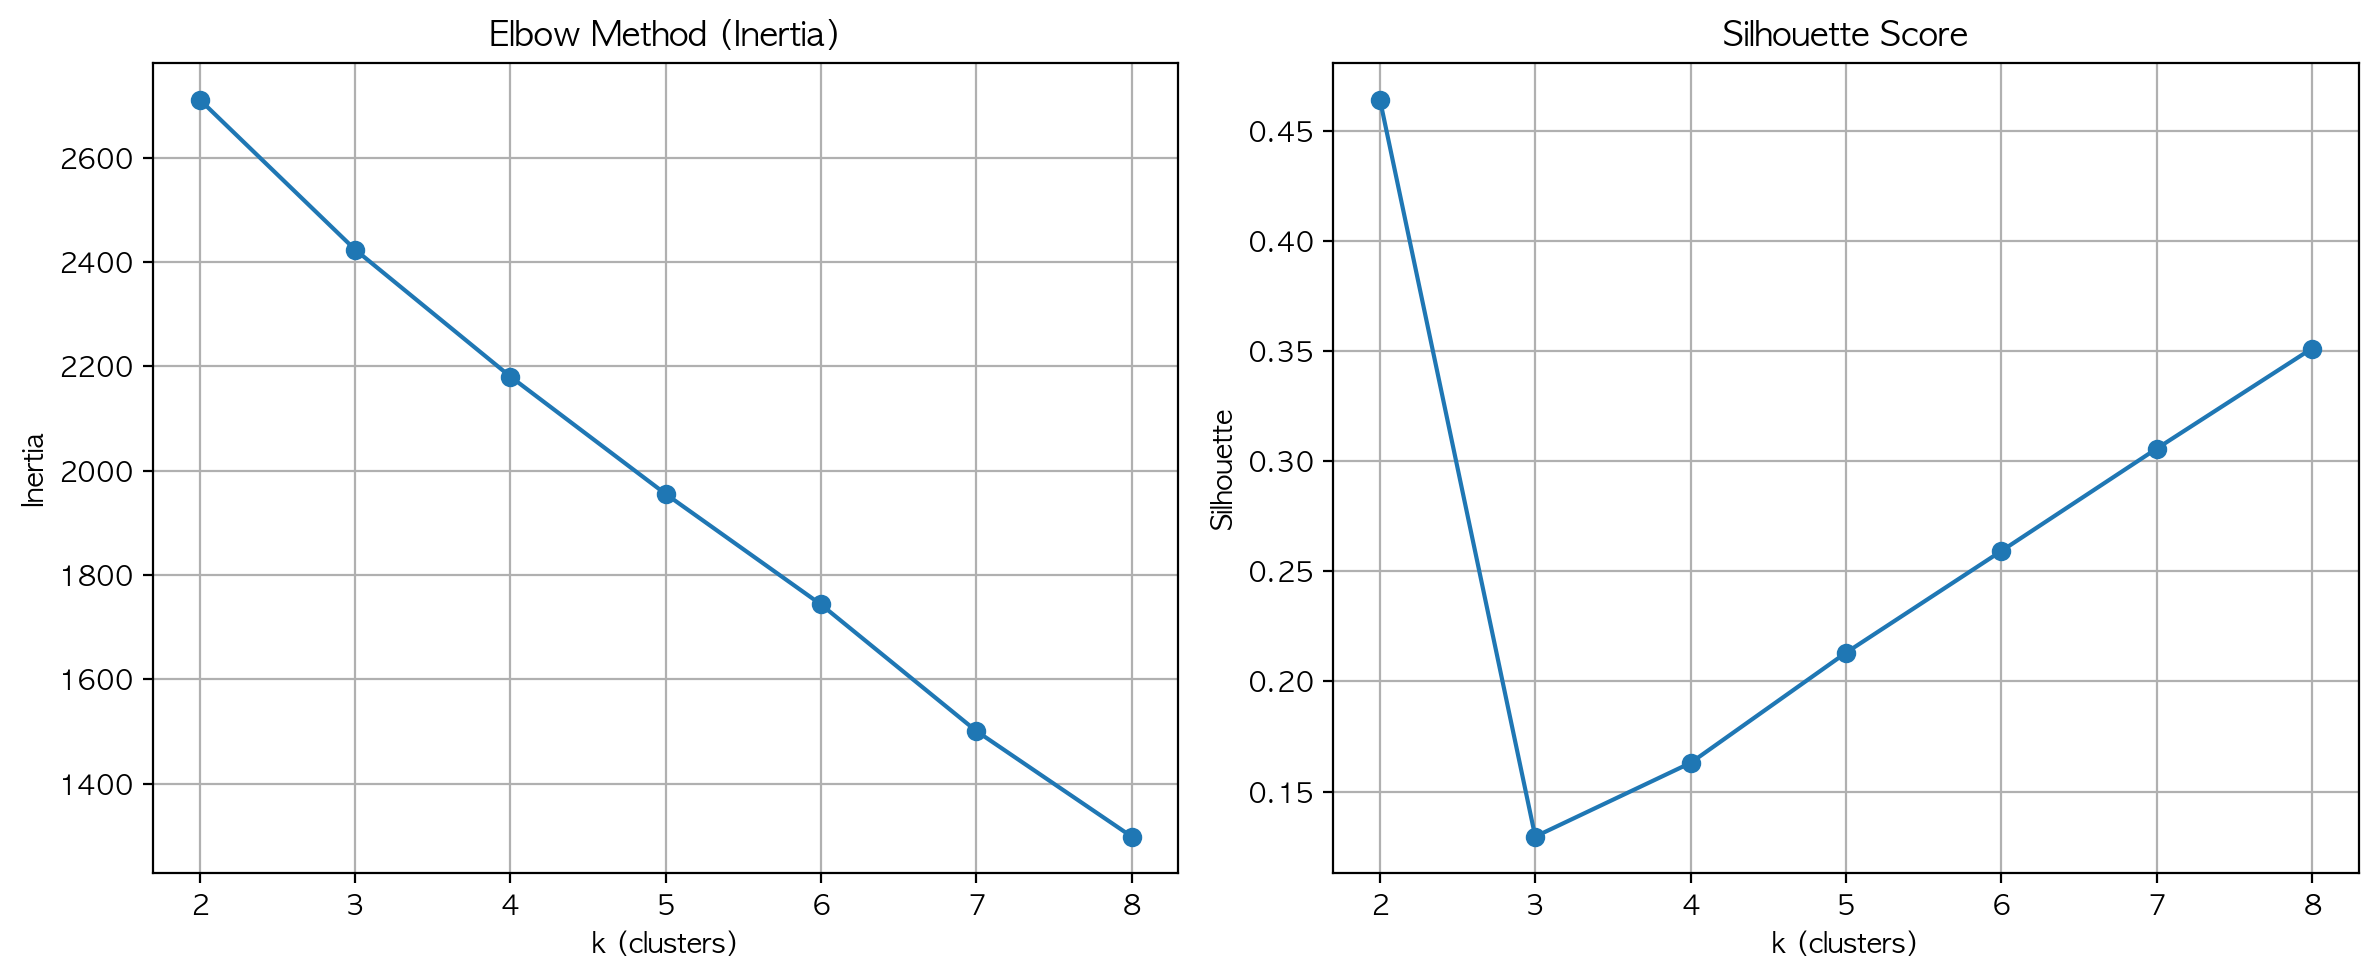

In [ ]:
ks = range(2, 9)   # k=2~8 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

best_k = ks[int(np.argmax(sil_scores))]
print(f"[INFO] 실루엣 최대 k = {best_k}, score = {max(sil_scores):.4f}")

# -----------------------------
# 2) 시각화
# -----------------------------
plt.figure(figsize=(12,5))

# 엘보
plt.subplot(1,2,1)
plt.plot(list(ks), inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("k (clusters)")
plt.ylabel("Inertia")
plt.grid(True)

# 실루엣
plt.subplot(1,2,2)
plt.plot(list(ks), sil_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k (clusters)")
plt.ylabel("Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()

# 매체사별 광고 규모

In [ ]:
ad_counts = ads_info.groupby('mda_idx')['ads_idx'].nunique().reset_index()
ad_counts.rename(columns={'ads_idx': 'ad_count'}, inplace=True)

ad_counts = ad_counts.sort_values(by='ad_count', ascending=False)

ad_counts.head()

mda_idx  ad_count
50      563      6563
49      562      2686
59      634      2451
14      270      1801
28      371       973

In [ ]:
mda_563 = ads_info[ads_info['mda_idx'] == 563]

ads_counts = mda_563['ads_idx'].value_counts().reset_index()
ads_counts.columns = ['ads_idx', 'count']

ads_counts.head()


ads_idx  count
0   445048  23457
1   435826  20536
2   438831  19426
3   444350  18652
4   430776  16296

In [71]:
def categorize_mda(x):
    if x < 11:
        return '테스트형 매체사'
    elif x <= 50:
        return '소규모 운영'
    elif x <= 200:
        return '중간 규모'
    elif x <= 2000:
        return '대규모 운영'
    else:
        return '초대형 운영'  # 혹시 2000 넘는 경우 대비

# ad_counts : 매체사별 광고 집행 수 집계 DataFrame
ad_counts['mda_size'] = ad_counts['ad_count'].apply(categorize_mda)

ad_counts.head()


mda_idx  ad_count mda_size
50      563      6563   초대형 운영
49      562      2686   초대형 운영
59      634      2451   초대형 운영
14      270      1801   대규모 운영
28      371       973   대규모 운영

In [ ]:
# 1. ads_time 테이블에서 기간 필터링
mask = (ads_time['rpt_time_date'] >= '2025-07-27') & (ads_time['rpt_time_date'] <= '2025-08-25')
ads_time_filtered = ads_time.loc[mask]

# 2. mda_idx별 총 클릭수 집계
clicks_by_mda = ads_time_filtered.groupby('mda_idx')['rpt_time_clk'].sum().reset_index()
clicks_by_mda.rename(columns={'rpt_time_clk': 'total_clicks'}, inplace=True)

# 3. ad_counts에 병합 (mda_idx 기준)
ad_counts = ad_counts.merge(clicks_by_mda, on='mda_idx', how='left')

mda_idx  ad_count  mda_size  total_clicks_x  total_clicks_y
0        563      6563    초대형 운영          520684          520684
1        562      2686    초대형 운영           21018           21018
2        634      2451    초대형 운영            5065            5065
3        270      1801    대규모 운영           61629           61629
4        371       973    대규모 운영           29225           29225
5        492       646    대규모 운영             805             805
6        761       408    대규모 운영           70530           70530
7        337       382    대규모 운영            1902            1902
8        714       338    대규모 운영            1288            1288
9         54       331    대규모 운영           12744           12744
10       854       323    대규모 운영             701             701
11       817       209    대규모 운영            1184            1184
12       281       194     중간 규모            1416            1416
13       645       178     중간 규모            1056            1056
14        22       166     중간 규모           80977           80977
15       790       158     중간 규모            1405            1405
16       246       121     중간 규모            1615            1615
17      1012       105     중간 규모            2928            2928
18       375       103     중간 규모             422             422
19       643        94     중간 규모             963             963
20       667        89     중간 규모           50214           50214
21       539        74     중간 규모        13467994        13467994
22       564        73     중간 규모            3627            3627
23       568        67     중간 규모              98              98
24        30        60     중간 규모            5197            5197
25        14        59     중간 규모           84790           84790
26       442        59     중간 규모             172             172
27       772        56     중간 규모             257             257
28       978        56     중간 규모              69              69
29       401        56     중간 규모             336             336
30       711        54     중간 규모             121             121
31       482        54     중간 규모            3615            3615
32       496        54     중간 규모          127878          127878
33       291        52     중간 규모              73              73
34       480        50    소규모 운영             103             103
35       294        49    소규모 운영            3673            3673
36       389        48    소규모 운영             871             871
37      1013        48    소규모 운영            4159            4159
38       540        46    소규모 운영           11776           11776
39       108        45    소규모 운영             813             813
40       583        41    소규모 운영            9078            9078
41       655        32    소규모 운영             207             207
42       651        31    소규모 운영             765             765
43      1020        30    소규모 운영           16363           16363
44       808        29    소규모 운영            9590            9590
45       824        29    소규모 운영           13290           13290
46       798        29    소규모 운영            8891            8891
47      1022        28    소규모 운영           12770           12770
48      1021        28    소규모 운영           11891           11891
49       799        28    소규모 운영            9203            9203
50       805        28    소규모 운영           12637           12637
51       845        28    소규모 운영           15594           15594
52       740        28    소규모 운영            5010            5010
53       850        28    소규모 운영            9573            9573
54       398        27    소규모 운영            6777            6777
55       801        27    소규모 운영           11728           11728
56       621        27    소규모 운영           11940           11940
57       674        27    소규모 운영           10703           10703
58       785        27    소규모 운영              38              38
59       687        26    소규모 운영            4635            4635
60       702        26    소규모 운영        

In [80]:
ad_counts['mda_size'].value_counts()

mda_size
소규모 운영      100
테스트형 매체사     55
중간 규모        22
대규모 운영        9
초대형 운영        3
Name: count, dtype: int64

In [75]:
# total_clicks_y 삭제
ad_counts.drop(columns=['total_clicks_y'], inplace=True)

# total_clicks_x → total_clicks 로 이름 변경
ad_counts.rename(columns={'total_clicks_x': 'total_clicks'}, inplace=True)

print(ad_counts.head())


   mda_idx  ad_count mda_size  total_clicks
0      563      6563   초대형 운영        520684
1      562      2686   초대형 운영         21018
2      634      2451   초대형 운영          5065
3      270      1801   대규모 운영         61629
4      371       973   대규모 운영         29225


In [83]:
ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size
0      563      6563   초대형 운영        520684      고활성
1      562      2686   초대형 운영         21018       보통
2      634      2451   초대형 운영          5065      저활성
3      270      1801   대규모 운영         61629       보통
4      371       973   대규모 운영         29225       보통

In [81]:
def categorize_clicks(x):
    if x < 1000:
        return '초저활성'
    elif x < 10000:
        return '저활성'
    elif x < 100000:
        return '보통'
    elif x < 1000000:
        return '고활성'
    else:
        return '초고활성'

ad_counts['clk_size'] = ad_counts['total_clicks'].apply(categorize_clicks)

ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size
0      563      6563   초대형 운영        520684      고활성
1      562      2686   초대형 운영         21018       보통
2      634      2451   초대형 운영          5065      저활성
3      270      1801   대규모 운영         61629       보통
4      371       973   대규모 운영         29225       보통

In [82]:
ad_counts['clk_size'].value_counts()

clk_size
저활성     73
초저활성    68
보통      40
고활성      7
초고활성     1
Name: count, dtype: int64

In [86]:
# 대응 관계 사전 정의
mapping = {
    '테스트형 매체사': '초저활성',
    '소규모 운영': '저활성',
    '중간 규모': '보통',
    '대규모 운영': '고활성',
    '초대형 운영': '초고활성'
}

# 새로운 컬럼 생성
ad_counts['matched'] = ad_counts.apply(
    lambda row: row['clk_size'] == mapping.get(row['mda_size']), axis=1
)

ad_counts.head(20)


mda_idx  ad_count mda_size  total_clicks clk_size  is_matched  matched
0       563      6563   초대형 운영        520684      고활성       False    False
1       562      2686   초대형 운영         21018       보통       False    False
2       634      2451   초대형 운영          5065      저활성       False    False
3       270      1801   대규모 운영         61629       보통       False    False
4       371       973   대규모 운영         29225       보통       False    False
5       492       646   대규모 운영           805     초저활성       False    False
6       761       408   대규모 운영         70530       보통       False    False
7       337       382   대규모 운영          1902      저활성       False    False
8       714       338   대규모 운영          1288      저활성       False    False
9        54       331   대규모 운영         12744       보통       False    False
10      854       323   대규모 운영           701     초저활성       False    False
11      817       209   대규모 운영          1184      저활성       False    False
12      281       194    중간 규모          1416      저활성       False    False
13      645       178    중간 규모          1056      저활성       False    False
14       22       166    중간 규모         80977       보통        True     True
15      790       158    중간 규모          1405      저활성       False    False
16      246       121    중간 규모          1615      저활성       False    False
17     1012       105    중간 규모          2928      저활성       False    False
18      375       103    중간 규모           422     초저활성       False    False
19      643        94    중간 규모           963     초저활성       False    False

In [94]:
ad_counts.drop(columns=['is_matched', 'CVR_x', 'CVR_y'], inplace=True)

KeyError: "['is_matched'] not found in axis"

In [89]:
ad_counts['matched'].value_counts()

matched
False    99
True     90
Name: count, dtype: int64

In [ ]:
ad_counts

mda_idx  ad_count  mda_size  total_clicks clk_size  matched
0        563      6563    초대형 운영        520684      고활성    False
1        562      2686    초대형 운영         21018       보통    False
2        634      2451    초대형 운영          5065      저활성    False
3        270      1801    대규모 운영         61629       보통    False
4        371       973    대규모 운영         29225       보통    False
5        492       646    대규모 운영           805     초저활성    False
6        761       408    대규모 운영         70530       보통    False
7        337       382    대규모 운영          1902      저활성    False
8        714       338    대규모 운영          1288      저활성    False
9         54       331    대규모 운영         12744       보통    False
10       854       323    대규모 운영           701     초저활성    False
11       817       209    대규모 운영          1184      저활성    False
12       281       194     중간 규모          1416      저활성    False
13       645       178     중간 규모          1056      저활성    False
14        22       166     중간 규모         80977       보통     True
15       790       158     중간 규모          1405      저활성    False
16       246       121     중간 규모          1615      저활성    False
17      1012       105     중간 규모          2928      저활성    False
18       375       103     중간 규모           422     초저활성    False
19       643        94     중간 규모           963     초저활성    False
20       667        89     중간 규모         50214       보통     True
21       539        74     중간 규모      13467994     초고활성    False
22       564        73     중간 규모          3627      저활성    False
23       568        67     중간 규모            98     초저활성    False
24        30        60     중간 규모          5197      저활성    False
25        14        59     중간 규모         84790       보통     True
26       442        59     중간 규모           172     초저활성    False
27       772        56     중간 규모           257     초저활성    False
28       978        56     중간 규모            69     초저활성    False
29       401        56     중간 규모           336     초저활성    False
30       711        54     중간 규모           121     초저활성    False
31       482        54     중간 규모          3615      저활성    False
32       496        54     중간 규모        127878      고활성    False
33       291        52     중간 규모            73     초저활성    False
34       480        50    소규모 운영           103     초저활성    False
35       294        49    소규모 운영          3673      저활성     True
36       389        48    소규모 운영           871     초저활성    False
37      1013        48    소규모 운영          4159      저활성     True
38       540        46    소규모 운영         11776       보통    False
39       108        45    소규모 운영           813     초저활성    False
40       583        41    소규모 운영          9078      저활성     True
41       655        32    소규모 운영           207     초저활성    False
42       651        31    소규모 운영           765     초저활성    False
43      1020        30    소규모 운영         16363       보통    False
44       808        29    소규모 운영          9590      저활성     True
45       824        29    소규모 운영         13290       보통    False
46       798        29    소규모 운영          8891      저활성     True
47      1022        28    소규모 운영         12770       보통    False
48      1021        28    소규모 운영         11891       보통    False
49       799        28    소규모 운영          9203      저활성     True
50       805        28    소규모 운영         12637       보통    False
51       845        28    소규모 운영         15594       보통    False
52       740        28    소규모 운영          5010      저활성     True
53       850        28    소규모 운영          9573      저활성     True
54       398        27    소규모 운영          6777      저활성     True
55       801        27    소규모 운영         11728       보통    False
56       621        27    소규모 운영         11940       보통    False
57       674        27    소규모 운영         10703       보통    False
58       785        27    소규모 운영            38     초저활성    False
59       687        26    소규모 운영          4635      저활성     True
60       702        26    소규모 운영        

In [96]:
# 기간 필터링
mask = (ads_time['rpt_time_date'] >= '2025-07-27') & (ads_time['rpt_time_date'] <= '2025-08-25')
ads_time_filtered = ads_time.loc[mask]

# mda_idx별 클릭수, 전환수 집계
cvr_by_mda = ads_time_filtered.groupby('mda_idx').agg(
    total_clicks=('rpt_time_clk', 'sum'),
    total_turns=('rpt_time_turn', 'sum')
).reset_index()

# CVR 계산 (0으로 나누기 방지)
cvr_by_mda['CTR'] = cvr_by_mda.apply(
    lambda row: row['total_turns'] / row['total_clicks'] if row['total_clicks'] > 0 else 0,
    axis=1
)

# ad_counts에 병합
ad_counts = ad_counts.merge(cvr_by_mda[['mda_idx', 'CTR']], on='mda_idx', how='left')

ad_counts.head()


mda_idx  ad_count mda_size  total_clicks clk_size  matched     CVR_x  \
0      563      6563   초대형 운영        520684      고활성    False  0.570375   
1      562      2686   초대형 운영         21018       보통    False  0.570178   
2      634      2451   초대형 운영          5065      저활성    False  0.629615   
3      270      1801   대규모 운영         61629       보통    False  0.488780   
4      371       973   대규모 운영         29225       보통    False  0.430043   

      CVR_y       CTR  
0  0.570375  0.570375  
1  0.570178  0.570178  
2  0.629615  0.629615  
3  0.488780  0.488780  
4  0.430043  0.430043

In [97]:
ad_counts.drop(columns=['CVR_x', 'CVR_y'], inplace=True)

In [98]:
ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size  matched       CTR
0      563      6563   초대형 운영        520684      고활성    False  0.570375
1      562      2686   초대형 운영         21018       보통    False  0.570178
2      634      2451   초대형 운영          5065      저활성    False  0.629615
3      270      1801   대규모 운영         61629       보통    False  0.488780
4      371       973   대규모 운영         29225       보통    False  0.430043

In [103]:
ads_list['ads_os_type'].value_counts()

ads_os_type
7    429140
2     11543
1      3443
3       897
8        16
Name: count, dtype: int64

In [132]:
ad_counts.drop(columns=['OS_APPSTORE', 'OS_GOOGLEPLAY', 'OS_ONESTORE', 'OS_WEB', 'OS_GOOGLEPLAY_share', 'OS_APPSTORE_share', 'OS_ONESTORE_share', 'OS_GALAXY_STORE_share', 'OS_WEB_share', 'OS_UNKNOWN_share', 'primary_os', 'primary_os_share'], inplace=True)

In [135]:
# OS 코드 → 라벨 매핑
os_map = {
    1: 'APPSTORE',      # AppStore
    2: 'GOOGLEPLAY',    # GooglePlay
    3: 'ONESTORE',      # 원스토어
    7: 'WEB',           # Web
    8: 'GALAXY_STORE'   # Galaxy Store
}

In [136]:
os_map

{1: 'APPSTORE', 2: 'GOOGLEPLAY', 3: 'ONESTORE', 7: 'WEB', 8: 'GALAXY_STORE'}

In [106]:
# ads_info(ads_idx, mda_idx) + ads_list(ads_idx, ads_os_type) 머지
info = ads_info[['ads_idx', 'mda_idx']].drop_duplicates()
alist = ads_list[['ads_idx', 'ads_os_type']].drop_duplicates().copy()


In [107]:
# ads_os_type 숫자형으로 정규화
alist['ads_os_type'] = pd.to_numeric(alist['ads_os_type'], errors='coerce')

df_os = info.merge(alist, on='ads_idx', how='left')
df_os['OS'] = df_os['ads_os_type'].map(os_map).fillna('UNKNOWN')


In [138]:
df_os.head()

ads_idx  mda_idx  ads_os_type          OS
0   313780      539            2  GOOGLEPLAY
1   412426       58            2  GOOGLEPLAY
2   443660      808            2  GOOGLEPLAY
3   360192      539            2  GOOGLEPLAY
4   372307      539            2  GOOGLEPLAY

In [139]:
# 만들어두고 싶은 OS 컬럼 목록(없어도 0으로 강제 생성)
os_all = ['APPSTORE', 'GOOGLEPLAY', 'ONESTORE', 'WEB', 'GALAXY_STORE', 'UNKNOWN']

# 매체사 × OS 교차표 → 존재여부를 0/1로
mda_os_dummy = pd.crosstab(df_os['mda_idx'], df_os['OS'])

# 모든 OS 열 강제 포함(없으면 0)
mda_os_dummy = mda_os_dummy.reindex(columns=os_all, fill_value=0)

# 한 번이라도 있으면 1
mda_os_dummy = (mda_os_dummy > 0).astype(int).reset_index()

# 컬럼명 접두사 붙이기
mda_os_dummy.columns = ['mda_idx'] + [f'OS_{c}' for c in os_all]

mda_os_dummy.head()

mda_idx  OS_APPSTORE  OS_GOOGLEPLAY  OS_ONESTORE  OS_WEB  OS_GALAXY_STORE  \
0       12            0              1            0       1                0   
1       14            1              1            0       1                0   
2       18            0              1            0       1                0   
3       22            0              1            1       1                0   
4       26            1              0            0       1                0   

   OS_UNKNOWN  
0           0  
1           0  
2           0  
3           0  
4           0

In [144]:
mda_os_dummy['OS_WEB'].value_counts()

OS_WEB
1    176
0     13
Name: count, dtype: int64

In [145]:
mda_os_dummy.drop(columns=['OS_GALAXY_STORE', 'OS_UNKNOWN'], inplace=True)

In [147]:
mda_os_dummy.head()

mda_idx  OS_APPSTORE  OS_GOOGLEPLAY  OS_ONESTORE  OS_WEB
0       12            0              1            0       1
1       14            1              1            0       1
2       18            0              1            0       1
3       22            0              1            1       1
4       26            1              0            0       1

In [148]:
# 4개 OS 더미 컬럼 목록
os_cols = ['OS_APPSTORE', 'OS_GOOGLEPLAY', 'OS_ONESTORE', 'OS_WEB']

# 없으면 0으로 만들어 두기(안전장치)
for c in os_cols:
    if c not in ad_counts.columns:
        ad_counts[c] = 0

# 매체사별 지원 OS 개수(0~4) 컬럼 생성
mda_os_dummy['OS_cnt'] = mda_os_dummy[os_cols].fillna(0).sum(axis=1).astype(int)

# 확인
mda_os_dummy[['mda_idx', 'OS_cnt']].head()


mda_idx  OS_cnt
0       12       2
1       14       3
2       18       2
3       22       3
4       26       2

In [149]:
mda_os_dummy.head()

mda_idx  OS_APPSTORE  OS_GOOGLEPLAY  OS_ONESTORE  OS_WEB  OS_cnt
0       12            0              1            0       1       2
1       14            1              1            0       1       3
2       18            0              1            0       1       2
3       22            0              1            1       1       3
4       26            1              0            0       1       2

In [150]:
mda_os_dummy.columns = [c.lower() for c in mda_os_dummy.columns]


In [156]:
mda_os_dummy.head()

mda_idx  os_appstore  os_googleplay  os_onestore  os_web  os_cnt
0       12            0              1            0       1       2
1       14            1              1            0       1       3
2       18            0              1            0       1       2
3       22            0              1            1       1       3
4       26            1              0            0       1       2

In [154]:
ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size  matched       CTR  \
0      563      6563   초대형 운영        520684      고활성    False  0.570375   
1      562      2686   초대형 운영         21018       보통    False  0.570178   
2      634      2451   초대형 운영          5065      저활성    False  0.629615   
3      270      1801   대규모 운영         61629       보통    False  0.488780   
4      371       973   대규모 운영         29225       보통    False  0.430043   

   OS_APPSTORE  OS_GOOGLEPLAY  OS_ONESTORE  OS_WEB  
0            0              0            0       0  
1            0              0            0       0  
2            0              0            0       0  
3            0              0            0       0  
4            0              0            0       0

In [157]:
ad_counts.drop(columns=['OS_APPSTORE', 'OS_GOOGLEPLAY', 'OS_ONESTORE', 'OS_WEB'], inplace=True)

In [158]:
ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size  matched       CTR
0      563      6563   초대형 운영        520684      고활성    False  0.570375
1      562      2686   초대형 운영         21018       보통    False  0.570178
2      634      2451   초대형 운영          5065      저활성    False  0.629615
3      270      1801   대규모 운영         61629       보통    False  0.488780
4      371       973   대규모 운영         29225       보통    False  0.430043

In [159]:
os_cols = ['os_appstore', 'os_googleplay', 'os_onestore', 'os_web', 'os_cnt']

In [160]:
ad_counts = ad_counts.merge(
    mda_os_dummy[['mda_idx'] + os_cols],
    on='mda_idx',
    how='left'
    # validate='1:1'  # mda_idx가 유일하다는 가정. 아니면 삭제하세요.
)

In [161]:
ad_counts[os_cols] = ad_counts[os_cols].fillna(0).astype(int)

In [162]:
base_cols = [c for c in ad_counts.columns if c not in os_cols]
ad_counts = ad_counts[base_cols + os_cols]

In [163]:
ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size  matched       CTR  \
0      563      6563   초대형 운영        520684      고활성    False  0.570375   
1      562      2686   초대형 운영         21018       보통    False  0.570178   
2      634      2451   초대형 운영          5065      저활성    False  0.629615   
3      270      1801   대규모 운영         61629       보통    False  0.488780   
4      371       973   대규모 운영         29225       보통    False  0.430043   

   os_appstore  os_googleplay  os_onestore  os_web  os_cnt  
0            0              1            1       1       3  
1            1              0            0       1       2  
2            0              1            1       1       3  
3            0              1            1       1       3  
4            0              1            1       1       3

In [164]:
ads_time.head(20)

rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  \
6636202    2025-07-27              0    11059      398             5   
6636203    2025-07-27              0    13209      583             3   
6636204    2025-07-27              0    13928      303             3   
6636205    2025-07-27              0    13928      324             3   
6636206    2025-07-27              0    13928      340             6   
6636207    2025-07-27              0    13928      341             4   
6636208    2025-07-27              0    13928      578             3   
6636209    2025-07-27              0    13928      579             2   
6636210    2025-07-27              0    13928      621             2   
6636211    2025-07-27              0    13928      637             3   
6636212    2025-07-27              0    13928      646             5   
6636213    2025-07-27              0    13928      674             4   
6636214    2025-07-27              0    13928      675             3   
6636215    2025-07-27              0    13928      682             1   
6636216    2025-07-27              0    13928      683             1   
6636217    2025-07-27              0    13928      687             1   
6636218    2025-07-27              0    13928      700             3   
6636219    2025-07-27              0    13928      701             1   
6636220    2025-07-27              0    13928      702             2   
6636221    2025-07-27              0    13928      703             1   

         rpt_time_turn  rpt_time_scost  rpt_time_acost  rpt_time_cost  \
6636202              0               0               0              0   
6636203              0               0               0              0   
6636204              3             510             510            360   
6636205              3             510             510            180   
6636206              6            1020            1020            360   
6636207              4             680             680            240   
6636208              3             510             510            252   
6636209              2             340             340            168   
6636210              2             340             340            168   
6636211              2             340             340            120   
6636212              4             680             680            240   
6636213              1             170             170             60   
6636214              3             510             510            180   
6636215              1             170             170             60   
6636216              1             170             170             60   
6636217              1             170             170             60   
6636218              3             510             510            180   
6636219              1             170             170             60   
6636220              2             340             340            120   
6636221              1             170             170             60   

         rpt_time_earn  weekday week_type    daypart  
6636202              0        6        주말  심야(22-02)  
6636203              0        6        주말  심야(22-02)  
6636204            360        6        주말  심야(22-02)  
6636205            360        6        주말  심야(22-02)  
6636206            720        6        주말  심야(22-02)  
6636207            480        6        주말  심야(22-02)  
6636208            360        6        주말  심야(22-02)  
6636209            240        6        주말  심야(22-02)  
6636210            240        6        주말  심야(22-02)  
6636211            240        6        주말  심야(22-02)  
6636212            480        6        주말  심야(22-02)  
6636213            120        6        주말  심야(22-02)  
6636214            360        6        주말  심야(22-02)  
6636215            120        6        주말  심야(22-02)  
6636216            120        6        주말  심야(22-02)  
6636217            120        6        주말  심야(22-02)  
6636218            360    

In [ ]:
# 날짜 컬럼이 문자열이면 datetime으로 변환
ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')

# 기간 필터 (양끝 포함)
mask = ads_time['rpt_time_date'].between('2025-07-27', '2025-08-25')
sub = ads_time.loc[mask].copy()

# 수입 컬럼 숫자화(혹시 모를 문자열/결측 대비)
sub['rpt_time_acost'] = pd.to_numeric(sub['rpt_time_acost'], errors='coerce').fillna(0)

# 매체사별 총 수입
rev_by_mda = (sub.groupby('mda_idx', as_index=False)['rpt_time_acost']
                .sum()
                .rename(columns={'rpt_time_acost': 'total_revenue'}))

# (옵션) ad_counts에 붙이기
ad_counts = ad_counts.merge(rev_by_mda, on='mda_idx', how='left')
ad_counts['total_revenue'] = ad_counts['total_revenue'].fillna(0.0)


KeyError: 'total_revenue'

In [167]:
ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size  matched       CTR  \
0      563      6563   초대형 운영        520684      고활성    False  0.570375   
1      562      2686   초대형 운영         21018       보통    False  0.570178   
2      634      2451   초대형 운영          5065      저활성    False  0.629615   
3      270      1801   대규모 운영         61629       보통    False  0.488780   
4      371       973   대규모 운영         29225       보통    False  0.430043   

   os_appstore  os_googleplay  os_onestore  os_web  os_cnt  total_revenue_x  \
0            0              1            1       1       3         17771580   
1            1              0            0       1       2          1475084   
2            0              1            1       1       3           127134   
3            0              1            1       1       3          2528133   
4            0              1            1       1       3           514413   

   total_revenue_y  
0         17771580  
1          1475084  
2           127134  
3          2528133  
4           514413

In [168]:
ad_counts.drop(columns=['total_revenue_y'], inplace=True)

In [170]:
ad_counts.rename(columns={'total_revenue_x': 'total_revenue'}, inplace=True)

In [195]:
ad_counts

mda_idx  ad_count  mda_size  total_clicks clk_size  matched       CTR  \
0        563      6563    초대형 운영        520684      고활성    False  0.570375   
1        562      2686    초대형 운영         21018       보통    False  0.570178   
2        634      2451    초대형 운영          5065      저활성    False  0.629615   
3        270      1801    대규모 운영         61629       보통    False  0.488780   
4        371       973    대규모 운영         29225       보통    False  0.430043   
5        492       646    대규모 운영           805     초저활성    False  0.513043   
6        761       408    대규모 운영         70530       보통    False  0.184730   
7        337       382    대규모 운영          1902      저활성    False  0.149842   
8        714       338    대규모 운영          1288      저활성    False  0.017857   
9         54       331    대규모 운영         12744       보통    False  0.336786   
10       854       323    대규모 운영           701     초저활성    False  0.322397   
11       817       209    대규모 운영          1184      저활성    False  0.641047   
12       281       194     중간 규모          1416      저활성    False  0.091808   
13       645       178     중간 규모          1056      저활성    False  0.587121   
14        22       166     중간 규모         80977       보통     True  0.409536   
15       790       158     중간 규모          1405      저활성    False  0.518861   
16       246       121     중간 규모          1615      저활성    False  0.613622   
17      1012       105     중간 규모          2928      저활성    False  0.239071   
18       375       103     중간 규모           422     초저활성    False  0.436019   
19       643        94     중간 규모           963     초저활성    False  0.268951   
20       667        89     중간 규모         50214       보통     True  0.318696   
21       539        74     중간 규모      13467994     초고활성    False  0.000676   
22       564        73     중간 규모          3627      저활성    False  0.351254   
23       568        67     중간 규모            98     초저활성    False  0.306122   
24        30        60     중간 규모          5197      저활성    False  0.075428   
25        14        59     중간 규모         84790       보통     True  0.271034   
26       442        59     중간 규모           172     초저활성    False  0.401163   
27       772        56     중간 규모           257     초저활성    False  0.463035   
28       978        56     중간 규모            69     초저활성    False  0.318841   
29       401        56     중간 규모           336     초저활성    False  0.086310   
30       711        54     중간 규모           121     초저활성    False  0.355372   
31       482        54     중간 규모          3615      저활성    False  0.454772   
32       496        54     중간 규모        127878      고활성    False  0.202967   
33       291        52     중간 규모            73     초저활성    False  0.602740   
34       480        50    소규모 운영           103     초저활성    False  0.155340   
35       294        49    소규모 운영          3673      저활성     True  0.207460   
36       389        48    소규모 운영           871     초저활성    False  0.648680   
37      1013        48    소규모 운영          4159      저활성     True  0.273623   
38       540        46    소규모 운영         11776       보통    False  0.349864   
39       108        45    소규모 운영           813     초저활성    False  0.819188   
40       583        41    소규모 운영          9078      저활성     True  0.042410   
41       655        32    소규모 운영           207     초저활성    False  0.584541   
42       651        31    소규모 운영           765     초저활성    False  0.079739   
43      1020        30    소규모 운영         16363       보통    False  0.619019   
44       808        29    소규모 운영          9590      저활성     True  0.462774   
45       824        29    소규모 운영         13290       보통    False  0.492927   
46       798        29    소규모 운영          8891      저활성     True  0.443707   
47      1022        28    소규모 운영         12770       보통    False  0.429287   
48      1021        28    소규모 운영         11891       보통    False  0.440585   
49       799        28    소규모 운영          9203      저활성     True  0.445398   
50       805        28    소

In [176]:
time_report.head()

mda_idx weekday_name_eff daypart_eff  clicks_eff  turns_eff   cvr_eff  \
0       12                목          저녁        3550       1716  0.483380   
1       14                금          심야        5261       2125  0.403916   
2       18                월           낮         174         15  0.086207   
3       22                금          아침        2346       1561  0.665388   
4       26                목          새벽          17          8  0.470588   

  weekday_name_vol daypart_vol  clicks_vol  turns_vol   cvr_vol  slot_match  
0                토          새벽       21824       9273  0.424899       False  
1                금          심야        5261       2125  0.403916        True  
2                수          저녁         268          9  0.033582       False  
3                일          새벽        3689       1888  0.511792       False  
4                일          아침          49          4  0.081633       False

In [177]:
# time_report에서 필요한 컬럼만 뽑아 LEFT JOIN
ad_counts = ad_counts.merge(
    time_report[['mda_idx', 'weekday_name_eff', 'daypart_eff']],
    on='mda_idx',
    how='left'
)


In [181]:
ad_counts.head()

mda_idx  ad_count mda_size  total_clicks clk_size  matched       CTR  \
0      563      6563   초대형 운영        520684      고활성    False  0.570375   
1      562      2686   초대형 운영         21018       보통    False  0.570178   
2      634      2451   초대형 운영          5065      저활성    False  0.629615   
3      270      1801   대규모 운영         61629       보통    False  0.488780   
4      371       973   대규모 운영         29225       보통    False  0.430043   

   os_appstore  os_googleplay  os_onestore  os_web  os_cnt  total_revenue  \
0            0              1            1       1       3       17771580   
1            1              0            0       1       2        1475084   
2            0              1            1       1       3         127134   
3            0              1            1       1       3        2528133   
4            0              1            1       1       3         514413   

  weekday_name_eff daypart_eff  
0                토          심야  
1                일          심야  
2                수          아침  
3                월          아침  
4                화          심야

In [ ]:
info = ads_info[['ads_idx', 'mda_idx']].drop_duplicates()
alist = ads_list[['ads_idx', 'ads_type']].drop_duplicates()

# ads_idx로 조인해서 광고별 ads_type을 매체사에 연결
info_type = info.merge(alist, on='ads_idx', how='left')


In [184]:
info_type.head()

ads_idx  mda_idx  ads_type
0   313780      539         3
1   412426       58         1
2   443660      808         1
3   360192      539         3
4   372307      539         3

In [185]:
# 같은 광고가 중복 들어오지 않도록 유일화한 뒤 카운트
type_cnt = (info_type
            .drop_duplicates(['mda_idx','ads_idx','ads_type'])
            .groupby(['mda_idx','ads_type'])['ads_idx']
            .nunique()
            .reset_index(name='n_ads'))


In [187]:
type_pivot = type_cnt.pivot(index='mda_idx', columns='ads_type', values='n_ads') \
                     .fillna(0).astype(int).reset_index()

In [192]:
type_pivot.head()

ads_type  mda_idx   1   2    3  4  5  7  9  10  11  12
0              12   7   4   12  0  1  0  0   0   0   0
1              14  18   5   32  0  1  2  0   1   0   0
2              18   0   0   23  0  0  0  0   0   0   0
3              22  23  19  122  0  1  1  0   0   0   0
4              26   2   1   16  0  0  0  0   0   0   0

In [189]:
type_share = type_pivot.copy()
type_cols = [c for c in type_share.columns if c != 'mda_idx']

row_sum = type_share[type_cols].sum(axis=1).replace(0, np.nan)
type_share[type_cols] = (type_share[type_cols].T / row_sum).T.fillna(0.0)

In [190]:
type_share.head()

ads_type  mda_idx         1         2         3    4         5         7    9  \
0              12  0.291667  0.166667  0.500000  0.0  0.041667  0.000000  0.0   
1              14  0.305085  0.084746  0.542373  0.0  0.016949  0.033898  0.0   
2              18  0.000000  0.000000  1.000000  0.0  0.000000  0.000000  0.0   
3              22  0.138554  0.114458  0.734940  0.0  0.006024  0.006024  0.0   
4              26  0.105263  0.052632  0.842105  0.0  0.000000  0.000000  0.0   

ads_type        10   11   12  
0         0.000000  0.0  0.0  
1         0.016949  0.0  0.0  
2         0.000000  0.0  0.0  
3         0.000000  0.0  0.0  
4         0.000000  0.0  0.0

In [193]:
# 공통 키: mda_idx
type_pivot = type_pivot.merge(
    type_share, 
    on='mda_idx', 
    how='left', 
    suffixes=('', '_share')  # 오른쪽(비율) 컬럼에 _share 붙음
)

# 비율 결측 0.0 정리
share_cols = [c for c in type_pivot.columns if c.endswith('_share')]
type_pivot[share_cols] = type_pivot[share_cols].fillna(0.0)


In [194]:
type_pivot

ads_type  mda_idx   1   2     3  4  5  7    9  10  11   12   1_share  \
0              12   7   4    12  0  1  0    0   0   0    0  0.291667   
1              14  18   5    32  0  1  2    0   1   0    0  0.305085   
2              18   0   0    23  0  0  0    0   0   0    0  0.000000   
3              22  23  19   122  0  1  1    0   0   0    0  0.138554   
4              26   2   1    16  0  0  0    0   0   0    0  0.105263   
5              30   0   4    53  0  0  1    0   1   1    0  0.000000   
6              32   0   0     7  0  0  0    0   0   0    0  0.000000   
7              54  13  19   148  0  1  1    0   0   0  149  0.039275   
8              56   2   2    14  0  0  0    0   0   0    0  0.111111   
9              58   5   5    16  0  0  0    0   0   0    0  0.192308   
10             73   1   1     2  0  0  0    0   0   0   19  0.043478   
11             87   2   0     3  0  1  0    0   0   0    0  0.333333   
12            108   6   1    21  0  0  0    0   0   0   17  0.133333   
13            246  32  19    63  3  1  2    0   1   0    0  0.264463   
14            270  39  29  1566  3  1  4  108   2   2   47  0.021655   
15            281   0  12   161  0  0  3    0   0   2   16  0.000000   
16            290  15   5     2  3  0  0    0   0   0    0  0.600000   
17            291   1   0    48  1  0  2    0   0   0    0  0.019231   
18            294   0   9    38  0  1  1    0   0   0    0  0.000000   
19            303  16   6     0  0  0  0    0   0   1    0  0.695652   
20            324  15   6     0  0  0  0    0   0   1    0  0.681818   
21            337  14   1   175  0  0  1    0   1   1  189  0.036649   
22            340  15   6     0  0  0  0    0   0   1    0  0.681818   
23            341  15   6     0  0  0  0    0   0   1    0  0.681818   
24            342   6   8     3  0  0  0    0   0   0    0  0.352941   
25            343   0   8     3  0  0  0    0   0   0    6  0.000000   
26            344   0   7     3  0  0  0    0   0   0    6  0.000000   
27            356   2   1     7  0  0  0    0   0   0    0  0.200000   
28            371  11   8   945  3  1  3    0   0   2    0  0.011305   
29            374   0   0     2  0  0  0    0   0   0    0  0.000000   
30            375   0   6    94  0  1  2    0   0   0    0  0.000000   
31            384   2   0     2  0  0  0    0   0   0    0  0.500000   
32            385   2   1     2  0  0  0    0   0   0    0  0.400000   
33            389   4   1    39  3  0  1    0   0   0    0  0.083333   
34            396   0   5     1  0  0  0    0   0   0    0  0.000000   
35            397   0   2     2  0  0  0    0   0   0    0  0.000000   
36            398   6   2    19  0  0  0    0   0   0    0  0.222222   
37            401   0   4    51  0  1  0    0   0   0    0  0.000000   
38            409   0   2     3  1  0  0    0   0   0    0  0.000000   
39            437   0   0     1  0  0  0    0   0   0    0  0.000000   
40            442   7   0    49  0  0  2    0   0   0    1  0.118644   
41            458   0   2     7  0  0  0    0   0   0    0  0.000000   
42            480   0   0    49  0  0  0    0   0   0    1  0.000000   
43            481   0   0    20  0  0  0    0   0   0    2  0.000000   
44            482   3   6    40  1  0  2    0   1   1    0  0.055556   
45            492   0   0   644  1  0  1    0   0   0    0  0.000000   
46            496  14  12    26  0  1  0    0   0   1    0  0.259259   
47            539   5   1    68  0  0  0    0   0   0    0  0.067568   
48            540   8   2    36  0  0  0    0   0   0    0  0.173913   
49            562   8   2  2676  0  0  0    0   0   0    0  0.002978   
50            563  10   0  6553  0  0  0    0   0   0    0  0.001524   
51            564   1   2    67  0  0  2    0   0   0    1  0.013699   
52            568   0   0    66  0  0  1    0   0   0    0  0.000000   
53            578  16   6     3  0  0  0    0   0   1    0  0.615385   
54            579  16   6     3  0  0  0

In [198]:
df = ad_counts.copy()

# 1) 피처 분류 (있을 때만 사용)
num_cnt   = [c for c in ['ad_count','total_clicks','total_revenue'] if c in df.columns]
num_ratio = [c for c in ['CTR','CVR'] if c in df.columns]
bin_cols  = [c for c in ['matched','os_appstore','os_googleplay','os_onestore','os_web','os_cnt'] if c in df.columns]
cat_cols  = [c for c in ['mda_size','clk_size','weekday_name_eff','daypart_eff'] if c in df.columns]

# 2) 전처리 구성
log1p = FunctionTransformer(np.log1p, feature_names_out='one-to-one')

pre = ColumnTransformer([
    ('cnt',   Pipeline([('fill0', FunctionTransformer(lambda X: np.nan_to_num(X, nan=0.0))),
                        ('log1p', log1p),
                        ('scale', StandardScaler())]), num_cnt),
    ('ratio', Pipeline([('fill0', FunctionTransformer(lambda X: np.nan_to_num(X, nan=0.0))),
                        ('scale', StandardScaler())]), num_ratio),
    ('bin',   'passthrough', bin_cols),                               # 0/1은 그대로
    ('cat',   OneHotEncoder(handle_unknown='ignore'), cat_cols)        # 범주형 원-핫
], remainder='drop', verbose_feature_names_out=False)

# 3) 파이프라인: 전처리 → (선택) PCA → KMeans
pipe = Pipeline([
    ('pre', pre),
    ('pca', PCA(n_components=0.90, random_state=0)),     # 누적 설명분산 90%까지 압축 (원치 않으면 이 줄 삭제)
    ('kmeans', KMeans(n_clusters=4, random_state=0, n_init='auto'))
])

# 4) k 자동 탐색(3~8) 및 학습
best_k, best_score, best_labels, best_pipe = None, -1, None, None
for k in range(3, 8):
    pipe.set_params(kmeans__n_clusters=k)
    pipe.fit(df)
    Z = pipe[:-1].transform(df)                  # kmeans 이전 단계 출력(=실루엣 계산용)
    score = silhouette_score(Z, pipe.named_steps['kmeans'].labels_) if Z.shape[0] > k else -1
    if score > best_score:
        best_k, best_score, best_labels, best_pipe = k, score, pipe.named_steps['kmeans'].labels_.copy(), pipe

# 결과 붙이기
df['cluster'] = best_labels
print(f'best_k={best_k}, silhouette={best_score:.3f}')

# 5) 군집 프로파일(해석용 요약)
profile_cols = [c for c in ['ad_count','total_clicks','total_revenue','CTR','CVR'] if c in df.columns]
print(df.groupby('cluster')[profile_cols].mean().round(3))

# 원본에 군집 라벨 붙이기
ad_counts = ad_counts.join(df['cluster'])


best_k=7, silhouette=0.249
         ad_count  total_clicks  total_revenue    CTR
cluster                                              
0          24.722    426268.444   1.275689e+07  0.458
1          35.455      5379.545   4.242910e+05  0.201
2           4.208        26.417   1.154917e+03  0.073
3          24.087      5653.783   4.936732e+05  0.487
4          38.560       242.120   3.142032e+04  0.375
5         894.300     53790.050   2.872695e+06  0.406
6           4.312        47.000   6.157125e+03  0.721


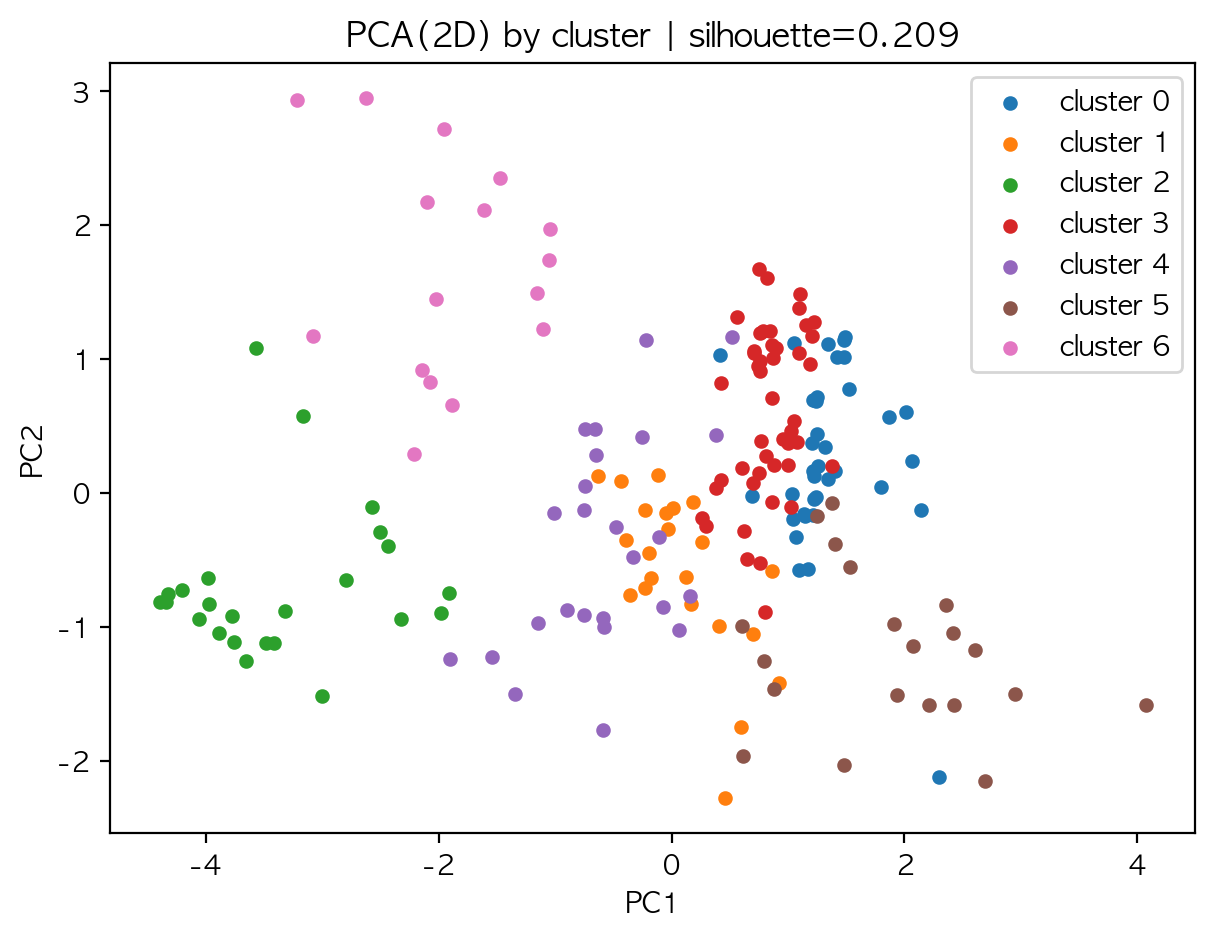

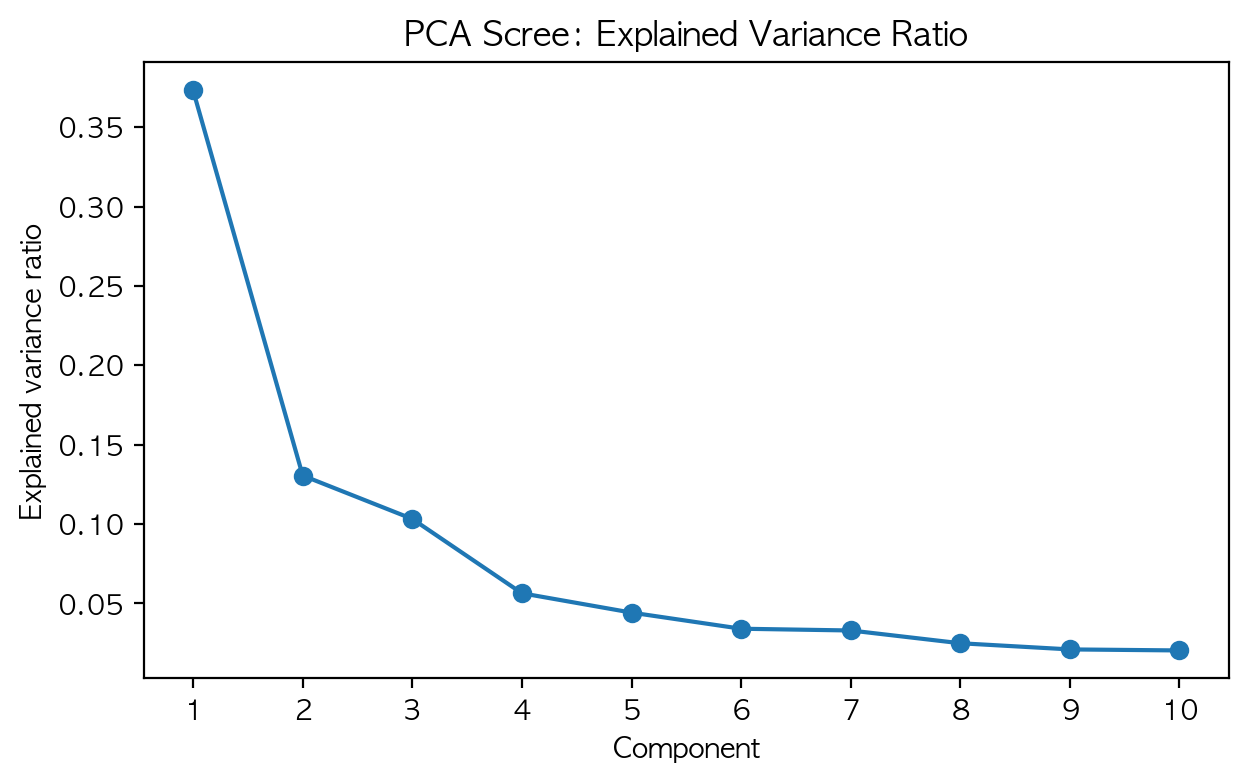

In [199]:
df = ad_counts.copy()

# 1) 피처 분류 (있는 컬럼만 사용)
num_cnt   = [c for c in ['ad_count','total_clicks','total_revenue'] if c in df.columns]
num_ratio = [c for c in ['CTR','CVR'] if c in df.columns]
bin_cols  = [c for c in ['matched','os_appstore','os_googleplay','os_onestore','os_web','os_cnt'] if c in df.columns]
cat_cols  = [c for c in ['mda_size','clk_size','weekday_name_eff','daypart_eff'] if c in df.columns]

log1p = FunctionTransformer(np.log1p, feature_names_out='one-to-one')
pre = ColumnTransformer([
    ('cnt',   Pipeline([('fill0', FunctionTransformer(lambda X: np.nan_to_num(X, nan=0.0))),
                        ('log1p', log1p),
                        ('scale', StandardScaler())]), num_cnt),
    ('ratio', Pipeline([('fill0', FunctionTransformer(lambda X: np.nan_to_num(X, nan=0.0))),
                        ('scale', StandardScaler())]), num_ratio),
    ('bin',   'passthrough', bin_cols),
    ('cat',   OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='drop', verbose_feature_names_out=False)

X = pre.fit_transform(df)

# 2) 클러스터 라벨 준비(이미 있으면 사용, 없으면 k=5로 간단히 생성)
if 'cluster' in df.columns:
    labels = df['cluster'].values
    sil = silhouette_score(X, labels) if len(np.unique(labels)) > 1 else np.nan
else:
    km = KMeans(n_clusters=5, random_state=0, n_init='auto')
    labels = km.fit_predict(X)
    df['cluster'] = labels
    sil = silhouette_score(X, labels)

# 3) PCA 2D로 투영 → 산점도
pca2 = PCA(n_components=2, random_state=0)
X2 = pca2.fit_transform(X)

plt.figure(figsize=(7,5))
for lb in np.unique(labels):
    m = labels == lb
    plt.scatter(X2[m,0], X2[m,1], label=f'cluster {lb}', s=18)
plt.title(f'PCA(2D) by cluster | silhouette={sil:.3f}' if sil==sil else 'PCA(2D) by cluster')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend(); plt.show()

# 4) Scree plot (설명분산비)
n_comp = int(min(10, X.shape[1]))
pca_full = PCA(n_components=n_comp, random_state=0).fit(X)
evr = pca_full.explained_variance_ratio_

plt.figure(figsize=(7,4))
plt.plot(range(1, n_comp+1), evr, marker='o')
plt.title('PCA Scree: Explained Variance Ratio')
plt.xlabel('Component'); plt.ylabel('Explained variance ratio'); plt.xticks(range(1, n_comp+1))
plt.show()


best_k=6, silhouette=0.923
cluster_os4
1    115
4     24
2     19
0     18
3      9
5      4
Name: count, dtype: Int64
             os_appstore  os_googleplay  os_onestore  os_web  \
cluster_os4                                                    
0                  0.000          0.000          0.0     1.0   
1                  0.000          1.000          0.0     1.0   
2                  1.000          0.263          0.0     1.0   
3                  0.111          1.000          0.0     0.0   
4                  0.125          1.000          1.0     1.0   
5                  1.000          0.000          0.0     0.0   

             os_supported_cnt_mean  
cluster_os4                         
0                            1.000  
1                            2.000  
2                            2.263  
3                            1.111  
4                            3.125  
5                            1.000  


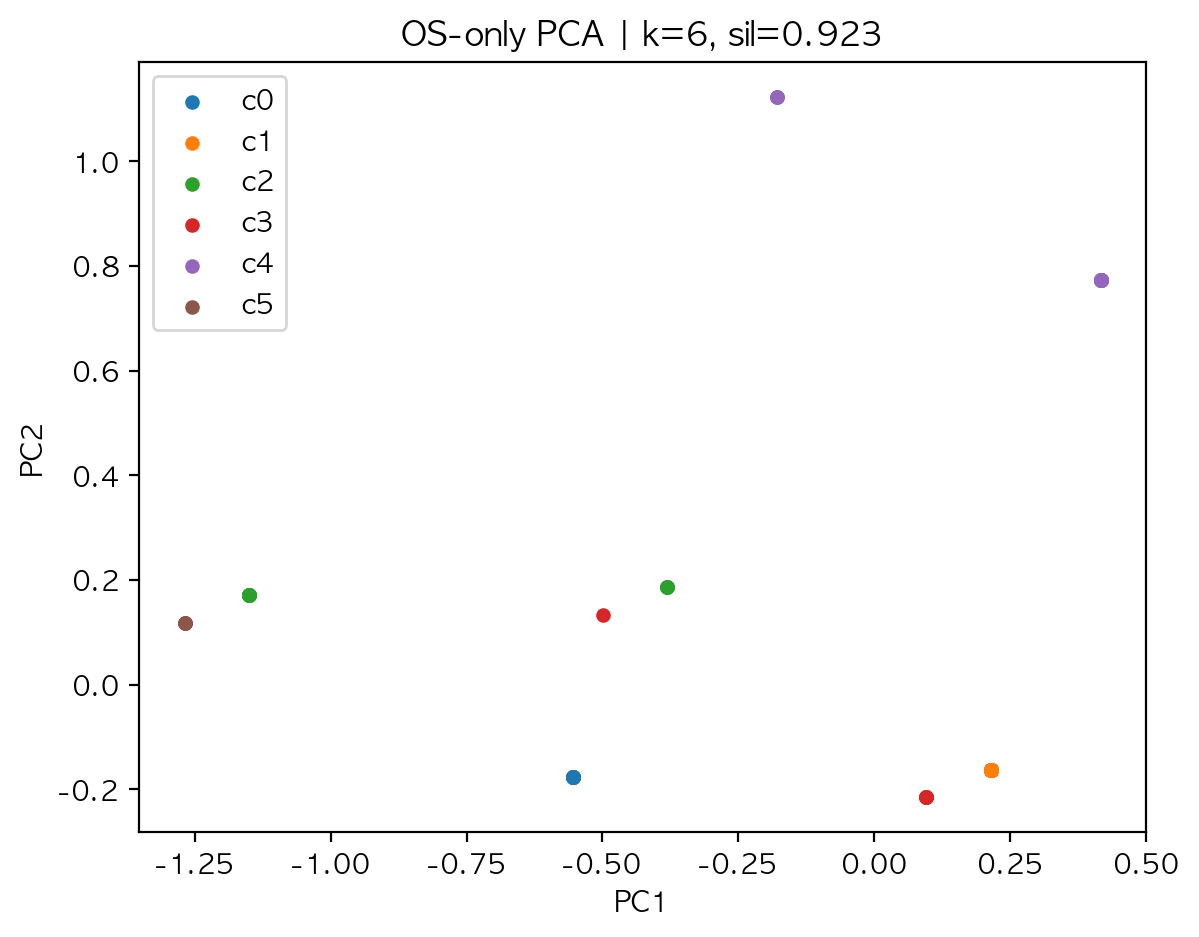

In [201]:
# 1) 피처 선택 (없는 컬럼은 자동 제외)
os_cols = ['os_appstore','os_googleplay','os_onestore','os_web']
use_cols = [c for c in os_cols if c in ad_counts.columns]

X = ad_counts[use_cols].fillna(0).astype(float).values

# (권장) 전혀 OS가 없는 행(all-zero)은 잠시 제외해 품질 개선
nonzero_mask = (ad_counts[use_cols].sum(axis=1) > 0)
X_nz = X[nonzero_mask]
idx_nz = ad_counts.index[nonzero_mask]

# 2) k 자동 탐색(2~6) → KMeans
best_k, best_score, best_labels, best_model = None, -1, None, None
for k in range(2, 7):
    if len(idx_nz) <= k: break
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = km.fit_predict(X_nz)
    score = silhouette_score(X_nz, labels)
    if score > best_score:
        best_k, best_score, best_labels, best_model = k, score, labels, km

# 라벨 부여(없는 행은 NaN 유지)
ad_counts.loc[idx_nz, 'cluster_os4'] = best_labels
ad_counts['cluster_os4'] = ad_counts['cluster_os4'].astype('Int64')

print(f'best_k={best_k}, silhouette={best_score:.3f}')
print(ad_counts['cluster_os4'].value_counts(dropna=False))

# 3) 군집 프로파일(평균=해당 OS 보유 비율)
# use_cols = ['os_appstore','os_googleplay','os_onestore','os_web'] 라고 가정
profile = ad_counts.loc[idx_nz].groupby('cluster_os4')[use_cols].mean()

# 군집별 평균 지원 OS 개수(0~4)
profile['os_supported_cnt_mean'] = profile.sum(axis=1)

profile = profile.round(3)
print(profile)

# 4) 시각화: PCA 2D(4차원→2차원) 산점도
pca = PCA(n_components=2, random_state=0)
X2 = pca.fit_transform(X_nz)

plt.figure(figsize=(6.5,5))
for lb in np.unique(best_labels):
    m = (best_labels == lb)
    plt.scatter(X2[m,0], X2[m,1], s=18, label=f'c{lb}')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(f'OS-only PCA | k={best_k}, sil={best_score:.3f}')
plt.legend(); plt.show()


In [202]:
# time_report에서 mda_idx당 대표 1행(첫 행)만 남기기
tr_one = (time_report[['mda_idx', 'weekday_name_eff', 'daypart_eff']]
          .dropna(subset=['mda_idx'])
          .drop_duplicates(subset='mda_idx', keep='first'))

# 머지하여 새 변수 생성
features_with_time = domain_features.merge(tr_one, on='mda_idx', how='left')


In [203]:
features_with_time

mda_idx  domain_게임  domain_교육  domain_금융  domain_기타  domain_미디어/컨텐츠  \
0         12     187866          0       3971          0              53   
1         14      38866          0       3560         57           15755   
2         18       3315          0        914          0            1070   
3         22      37240         16      11756          0           15966   
4         26        423          0         41          0              20   
5         30        191          1        703          0             246   
6         32          0          0        455          0             309   
7         54       1598         38       1830          0             386   
8         56      22655          0       5932          0             418   
9         58     306806          0      78468      17542             779   
10        73          1          0          0          1               0   
11        87      64288          0          0          0              19   
12       108        652          0          9          0               4   
13       246        560          0        239         48             183   
14       270      32143         53       1887        272            1356   
15       281        382          0        255         23             262   
16       290         54          0          5          0               0   
17       291          1          0          2          1               0   
18       294        541         14        857         38             418   
19       303       4528          0       4247          0             217   
20       324       4681          0       4333          0             226   
21       337        755          3        207          1             130   
22       340       4955          0       5125          0             258   
23       341       4856          0       5690          0             206   
24       342     222328          0          0      80276               0   
25       343     138916          0          0      34320               0   
26       344      44325          0          0      15086               0   
27       356        755          0        116          0               9   
28       371        627        124        323        116             447   
29       374          0          0          0          0               0   
30       375         30          1         27          0              58   
31       384          0          0      11842          0               0   
32       385       1645          0          0          0               0   
33       389        112          0          6          1               6   
34       396     106184          0          0      47906               0   
35       397      23263          0          0          0               0   
36       398       1142         40       1007          0             485   
37       401         14          1         78          0              99   
38       409          0          0          2          0               0   
39       437          0          0          0          0               0   
40       442          6          0          8          2               5   
41       458         83         23         42          0               0   
42       480          1          5         22          0              25   
43       481          1          1          3          0               5   
44       482        108          0        146          3              48   
45       492          1          5          9         87              10   
46       496      16756          8      59846        170             725   
47       539   12970505          0     483468          0            3452   
48       540       6561          0        407        750             729   
49       562       4271         42        398       1283            1140   
50       563     137426       1431       2117      14046           11814   
51       564         25          0         16        

[결과] best_k=5, silhouette=0.38463141911563065  |  size=[ 4 76  8 25 76]


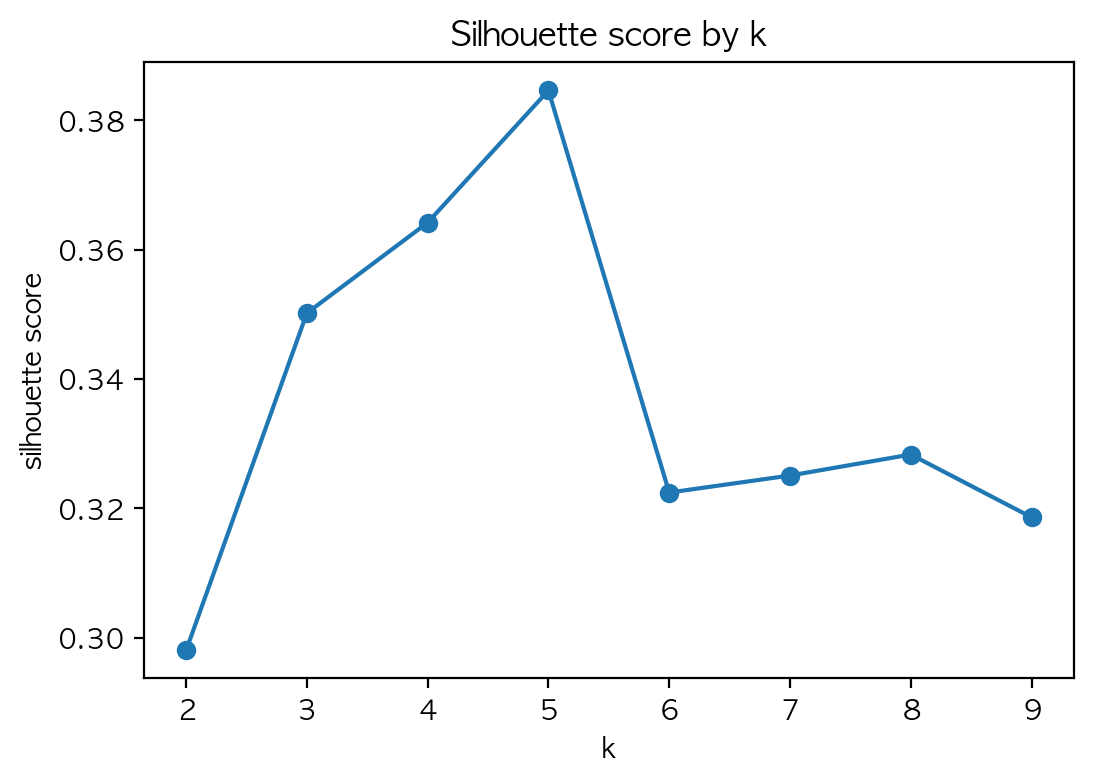

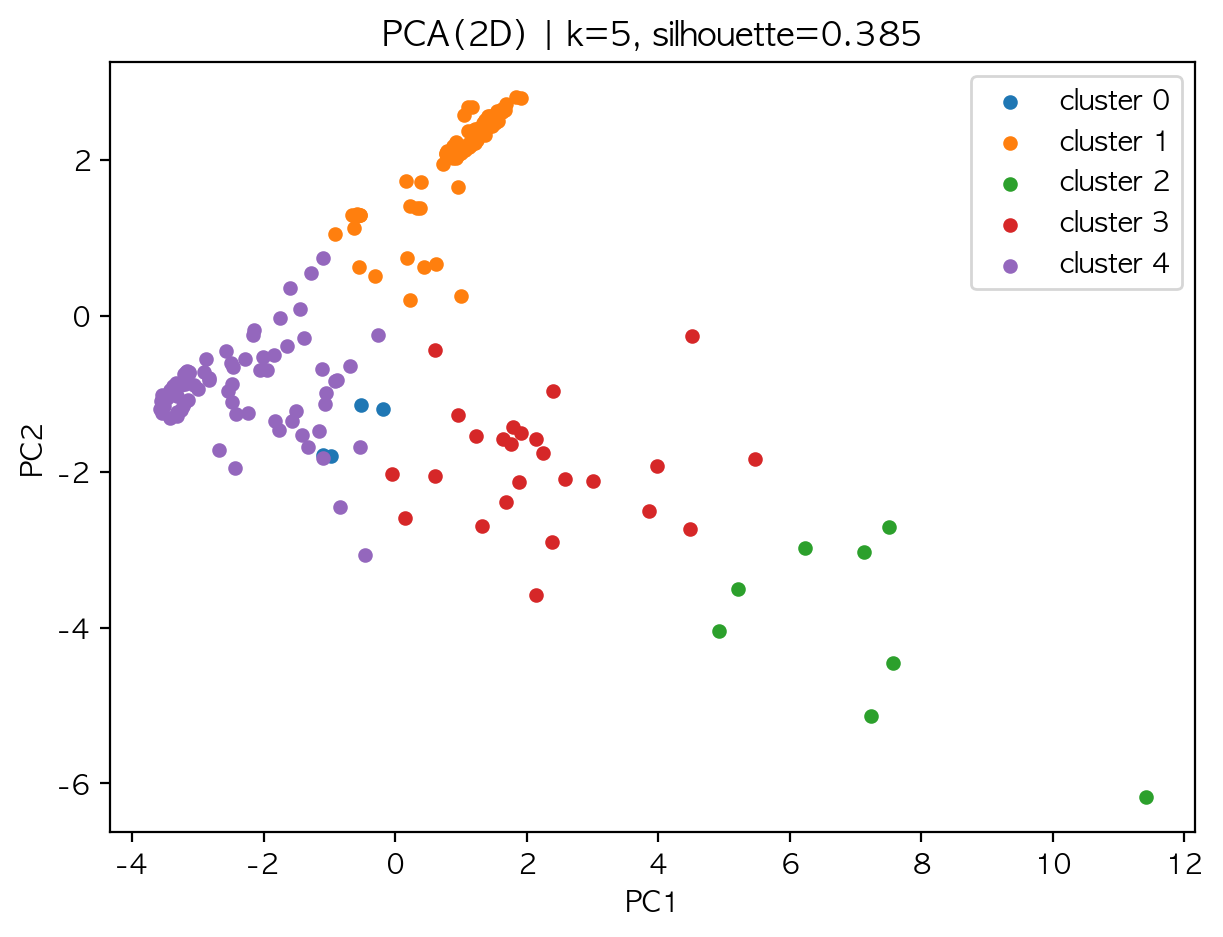

In [210]:
# === 1) 데이터 준비 ===
df = features_with_time.copy()

# 식별자/컬럼 분류
id_cols = [c for c in ['mda_idx'] if c in df.columns]

# domain_* (카운트/금액류로 가정 → log1p + 표준화)
domain_cols = [c for c in df.columns if c.startswith('domain_')]

# 그 외 수치(있다면) — mda_idx/도메인 제외
other_num = df.select_dtypes(include=['number']).columns.difference(id_cols + domain_cols).tolist()

# 범주형(요일/시간대 포함)
cat_cols = [c for c in df.columns if df[c].dtype == 'object' or str(df[c].dtype) == 'category']
# 혹시 숫자로 들어온 요일/시간대가 있으면 강제로 범주 처리
for c in ['weekday_name_eff', 'daypart_eff']:
    if c in df.columns and c not in cat_cols:
        cat_cols.append(c)
        if c in other_num: other_num.remove(c)

# 전처리 변환기
log1p = FunctionTransformer(np.log1p, feature_names_out='one-to-one')

transformers = []
if domain_cols:
    transformers.append((
        'domain',
        Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('log', log1p),
            ('sc', StandardScaler())
        ]),
        domain_cols
    ))

if other_num:
    transformers.append((
        'num',
        Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', StandardScaler())
        ]),
        other_num
    ))

if cat_cols:
    transformers.append((
        'cat',
        Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('oh', OneHotEncoder(handle_unknown='ignore'))
        ]),
        cat_cols
    ))

pre = ColumnTransformer(transformers, remainder='drop', verbose_feature_names_out=False)

# 전처리 실행
X = pre.fit_transform(df)

# === 2) k 탐색(실루엣) & 최적 모델 ===
sil_scores = {}
best = {'k': None, 'score': -1, 'labels': None, 'model': None}

k_min, k_max = 2, min(10, X.shape[0])  # 표본 수보다 k 작아야 함
for k in range(k_min, k_max):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sizes = np.bincount(labels)
    # 모든 클러스터에 최소 2개 이상일 때만 실루엣 계산
    if len(np.unique(labels)) < 2 or sizes.min() < 2:
        continue
    score = silhouette_score(X, labels)
    sil_scores[k] = score
    if score > best['score']:
        best.update({'k': k, 'score': score, 'labels': labels, 'model': km})

# 폴백: 유효한 k가 없으면 k=2로 라벨만 부여(실루엣 NaN)
if best['k'] is None:
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    best['labels'] = km.fit_predict(X)
    best['k'] = 2
    best['score'] = np.nan
    best['model'] = km

df['cluster'] = best['labels']
print(f"[결과] best_k={best['k']}, silhouette={best['score']}  |  size={np.bincount(best['labels'])}")

# === 3) 군집 프로파일(원하는 수치만) ===
profile_cols = [c for c in ['ad_count','total_clicks','total_revenue','CTR','CVR'] if c in df.columns]
if profile_cols:
    print("\n[군집별 평균]")
    print(df.groupby('cluster')[profile_cols].mean().round(3))

# === 4) 시각화 ===
# 4-1) 실루엣 점수 라인 플롯
if sil_scores:
    plt.figure(figsize=(6,4))
    ks = sorted(sil_scores.keys())
    vals = [sil_scores[k] for k in ks]
    plt.plot(ks, vals, marker='o')
    plt.title('Silhouette score by k')
    plt.xlabel('k'); plt.ylabel('silhouette score'); plt.xticks(ks)
    plt.show()

# 4-2) PCA 2D 산점도 (전처리 특성 → 2D 투영)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(7,5))
for lb in sorted(np.unique(best['labels'])):
    m = (best['labels'] == lb)
    plt.scatter(X2[m,0], X2[m,1], s=18, label=f'cluster {lb}')
ttl = f"PCA(2D) | k={best['k']}" + (f", silhouette={best['score']:.3f}" if best['score']==best['score'] else ", silhouette=NaN")
plt.title(ttl)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend()
plt.show()

# === 5) 원본에 붙이고 싶다면 ===
features_with_time = df


[결과] best_k=3, silhouette=0.33031858669593867
클러스터 크기: [21 98 70]

[군집별 도메인 평균]
             domain_게임  domain_커머스  domain_운세  domain_금융  domain_생활
cluster_dom                                                        
0              30237.5      8134.0     2040.0     8381.4     5683.2
1             141971.1       863.4        0.4     7497.1      632.8
2                956.7       116.3        1.4       45.2        7.1


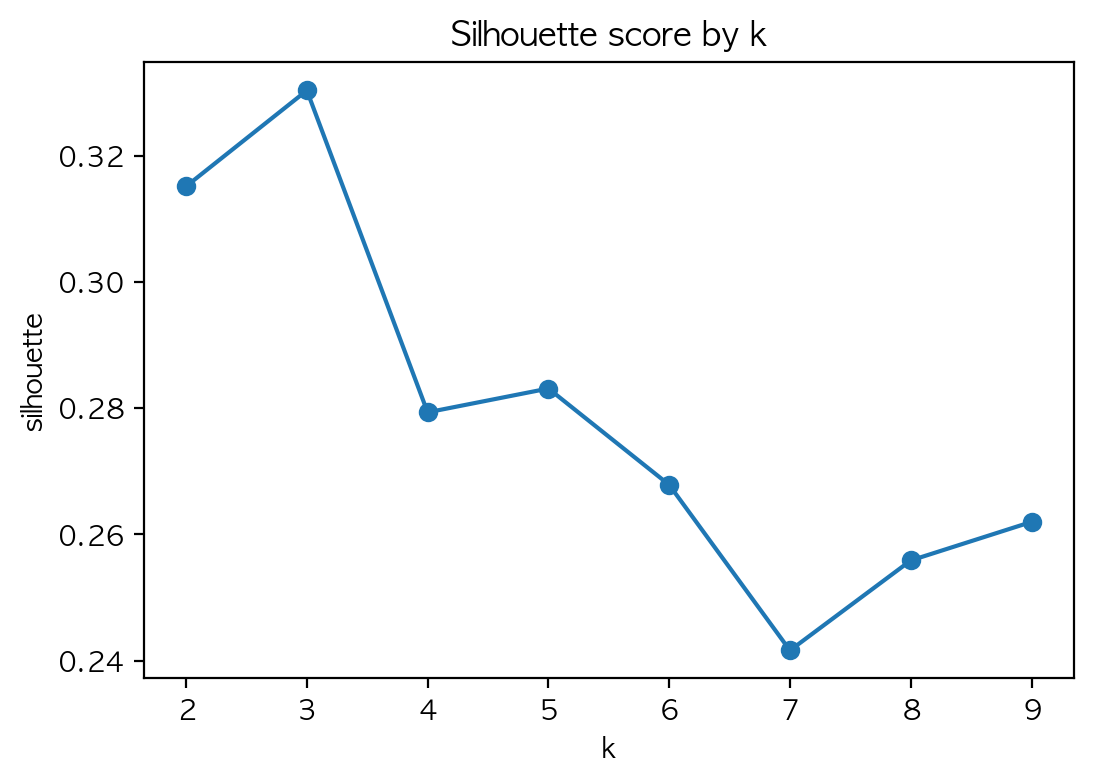

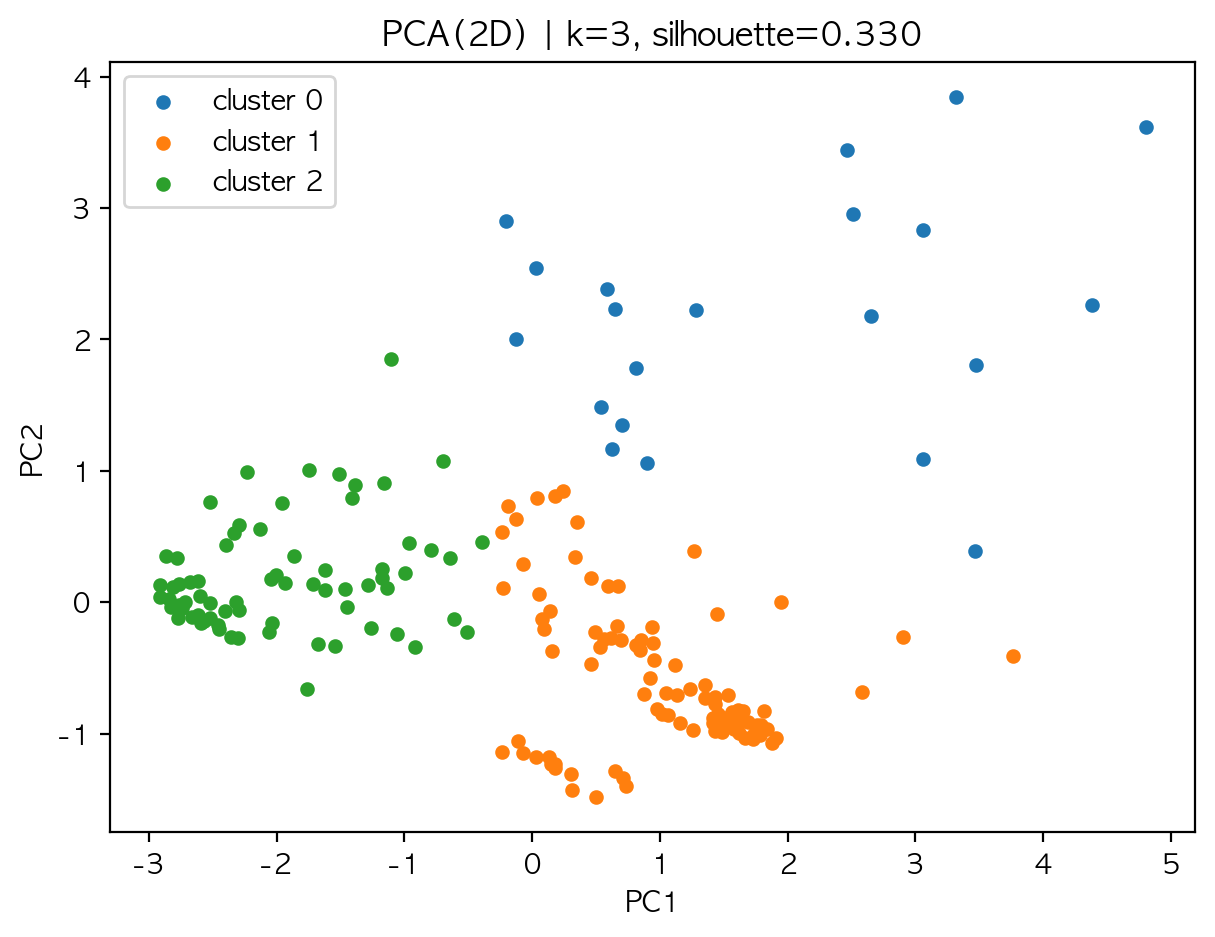

In [212]:
# === 1) 데이터 & 컬럼 선택 ===
df = features_with_time.copy()

num_cols = [c for c in ['domain_게임','domain_커머스','domain_운세','domain_금융','domain_생활'] if c in df.columns]
cat_cols = [c for c in ['weekday_name_eff','daypart_eff'] if c in df.columns]
assert num_cols or cat_cols, "선택한 컬럼이 없습니다."

# === 2) 전처리 ===
log1p = FunctionTransformer(np.log1p, feature_names_out='one-to-one')  # 카운트 왜도 완화

pre = ColumnTransformer([
    ('num', Pipeline([
        ('imp', SimpleImputer(strategy='median')),
        ('log', log1p),
        ('sc', StandardScaler())
    ]), num_cols) if num_cols else ('num','drop',[]),

    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('oh', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols) if cat_cols else ('cat','drop',[])
], remainder='drop', verbose_feature_names_out=False)

X = pre.fit_transform(df)

# === 3) k 탐색(실루엣) ===
sil_scores, best = {}, {'k':None,'score':-1,'labels':None,'model':None}
k_min, k_max = 2, min(10, X.shape[0])

for k in range(k_min, k_max):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sizes = np.bincount(labels)
    if len(np.unique(labels)) < 2 or sizes.min() < 2:
        continue
    score = silhouette_score(X, labels)
    sil_scores[k] = score
    if score > best['score']:
        best.update({'k':k,'score':score,'labels':labels,'model':km})

# 폴백: 유효 k 없으면 k=2로 라벨만
if best['k'] is None:
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    best['labels'] = km.fit_predict(X)
    best['k'], best['score'], best['model'] = 2, np.nan, km

df['cluster_dom'] = best['labels']
print(f"[결과] best_k={best['k']}, silhouette={best['score']}")
print("클러스터 크기:", np.bincount(best['labels']))

# === 4) 군집 프로파일(원본 스케일 평균) ===
print("\n[군집별 도메인 평균]")
print(df.groupby('cluster_dom')[num_cols].mean().round(1))

# === 5) 시각화 ===
# 5-1) 실루엣 k-그래프
if sil_scores:
    plt.figure(figsize=(6,4))
    ks = sorted(sil_scores.keys()); vals = [sil_scores[k] for k in ks]
    plt.plot(ks, vals, marker='o')
    plt.title('Silhouette score by k'); plt.xlabel('k'); plt.ylabel('silhouette'); plt.xticks(ks)
    plt.show()

# 5-2) PCA 2D 산점도
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)
plt.figure(figsize=(7,5))
for lb in sorted(np.unique(best['labels'])):
    m = (best['labels']==lb)
    plt.scatter(X2[m,0], X2[m,1], s=18, label=f'cluster {lb}')
ttl = f"PCA(2D) | k={best['k']}" + (f", silhouette={best['score']:.3f}" if best['score']==best['score'] else ", silhouette=NaN")
plt.title(ttl); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend(); plt.show()

# 필요하면 원본에 라벨 붙이기
features_with_time = df


In [213]:
# 1) 도메인 컬럼 추출
domain_cols = [c for c in features_with_time.columns if c.startswith('domain_')]

# 2) 숫자형으로 정리 후 전체 합계 계산
dom_total = (features_with_time[domain_cols]
             .apply(pd.to_numeric, errors='coerce')
             .fillna(0)
             .sum(axis=0)
             .sort_values(ascending=False))

# 3) Top 5 표 만들기 (+ 비중)
top5 = dom_total.head(5).reset_index()
top5.columns = ['domain', 'total']
top5['share'] = (top5['total'] / dom_total.sum()).round(4)  # 전체 대비 비중

print(top5)


       domain     total   share
0   domain_게임  14615123  0.8671
1   domain_금융    913894  0.0542
2  domain_커머스    263567  0.0156
3   domain_기타    212681  0.0126
4   domain_생활    181866  0.0108


[결과] best_k=3, silhouette=0.34658864511022036
클러스터 크기: [ 73 103  13]

[군집별 도메인 평균]
              domain_게임  domain_금융  domain_커머스  domain_기타  domain_생활
cluster_dom5                                                        
0                 920.8       45.8       121.1        1.8        7.0
1              130995.6     7412.3       721.2        1.7      631.4
2               81181.8    11313.8     13880.6    16336.7     8948.0


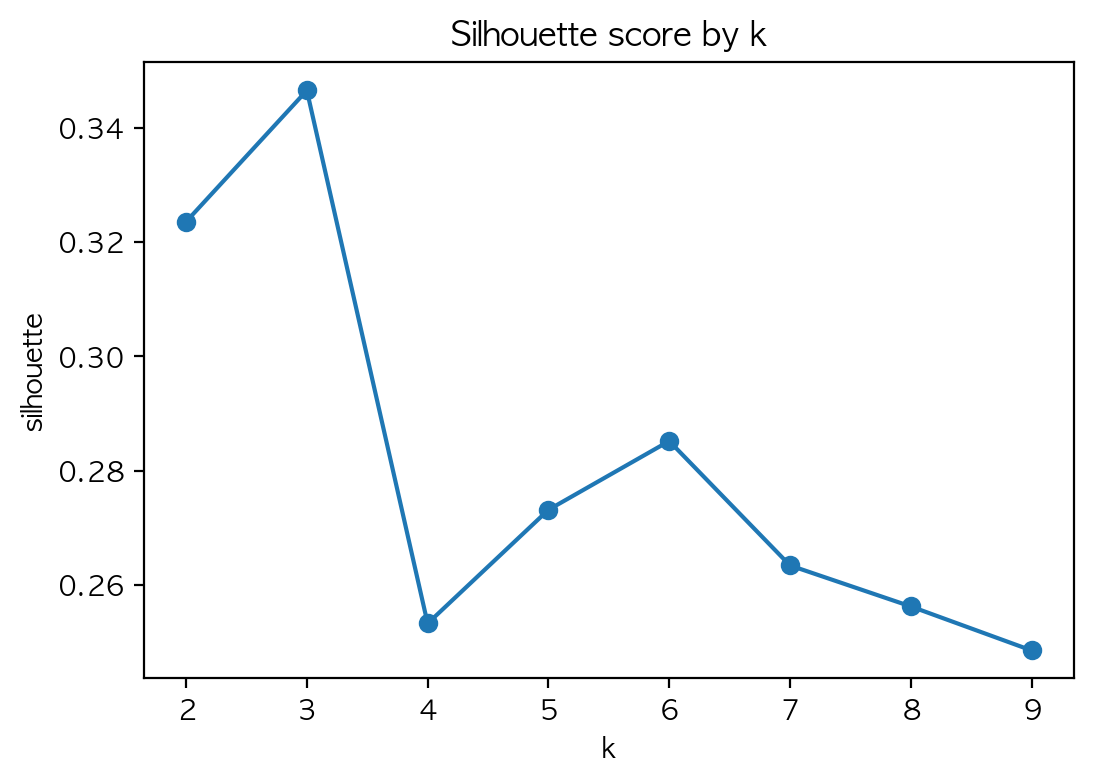

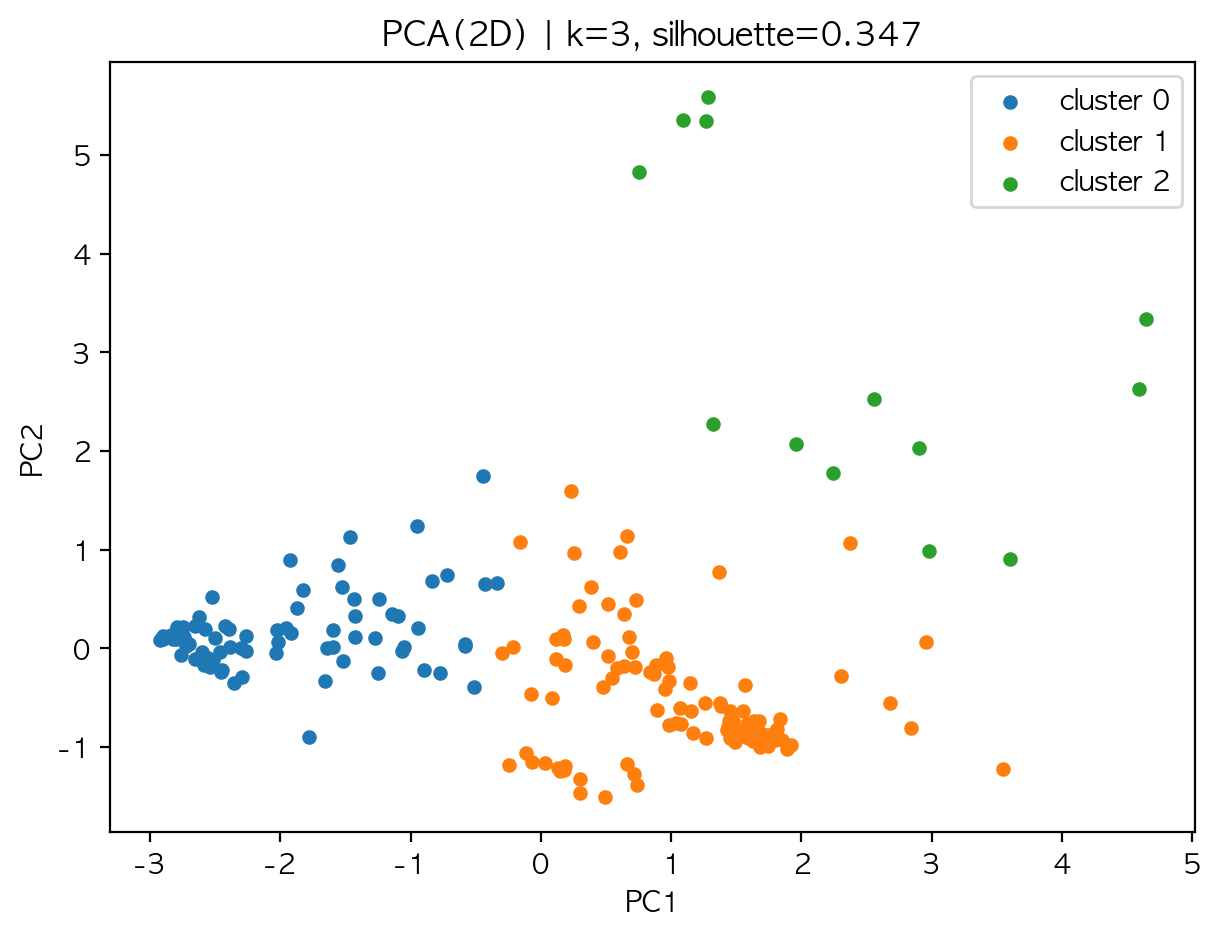

In [214]:
# === 1) 데이터 & 컬럼 선택 ===
df = features_with_time.copy()

num_cols = [c for c in ['domain_게임','domain_금융','domain_커머스','domain_기타','domain_생활'] if c in df.columns]
cat_cols = [c for c in ['weekday_name_eff','daypart_eff'] if c in df.columns]
assert num_cols or cat_cols, "선택한 컬럼이 없습니다."

# === 2) 전처리 (도메인: log1p+표준화, 범주: 원-핫) ===
log1p = FunctionTransformer(np.log1p, feature_names_out='one-to-one')
pre = ColumnTransformer([
    ('num', Pipeline([
        ('imp', SimpleImputer(strategy='median')),
        ('log', log1p),
        ('sc', StandardScaler())
    ]), num_cols) if num_cols else ('num','drop',[]),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('oh', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols) if cat_cols else ('cat','drop',[])
], remainder='drop', verbose_feature_names_out=False)

X = pre.fit_transform(df)

# === 3) k 탐색(실루엣) → 최적 모델 ===
sil_scores, best = {}, {'k':None,'score':-1,'labels':None,'model':None}
k_min, k_max = 2, min(10, X.shape[0])  # 표본 수보다 k가 작아야 함

for k in range(k_min, k_max):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sizes = np.bincount(labels)
    if len(np.unique(labels)) < 2 or sizes.min() < 2:   # 각 군집 최소 2개
        continue
    score = silhouette_score(X, labels)
    sil_scores[k] = score
    if score > best['score']:
        best.update({'k':k,'score':score,'labels':labels,'model':km})

# 폴백: 유효 k 없으면 k=2로 라벨만 부여(실루엣 NaN)
if best['k'] is None:
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    best['labels'] = km.fit_predict(X)
    best['k'], best['score'], best['model'] = 2, np.nan, km

df['cluster_dom5'] = best['labels']
print(f"[결과] best_k={best['k']}, silhouette={best['score']}")
print("클러스터 크기:", np.bincount(best['labels']))

# === 4) 군집 프로파일(원본 스케일 평균) ===
print("\n[군집별 도메인 평균]")
print(df.groupby('cluster_dom5')[num_cols].mean().round(1))

# === 5) 시각화 ===
# 5-1) 실루엣 k-그래프
if sil_scores:
    plt.figure(figsize=(6,4))
    ks = sorted(sil_scores.keys()); vals = [sil_scores[k] for k in ks]
    plt.plot(ks, vals, marker='o')
    plt.title('Silhouette score by k'); plt.xlabel('k'); plt.ylabel('silhouette'); plt.xticks(ks)
    plt.show()

# 5-2) PCA 2D 산점도 (전처리 특성 → 2D 투영)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(7,5))
for lb in sorted(np.unique(best['labels'])):
    m = (best['labels']==lb)
    plt.scatter(X2[m,0], X2[m,1], s=18, label=f'cluster {lb}')
ttl = f"PCA(2D) | k={best['k']}" + (f", silhouette={best['score']:.3f}" if best['score']==best['score'] else ", silhouette=NaN")
plt.title(ttl); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend(); plt.show()

# (원본 보관) 필요하면 덮어쓰기
features_with_time = df
